# Necessary Imports

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from multimode_expts.analysis_notebooks.expts_run_base import *

In [30]:
expts_base_inst = expts_run_base(data_path=r'H:\Shared drives\SLab\Multimode\experiment\250505_craqm', 
                            config_name='hardware_config_202505.yml',
                              exp_param_name='experiment_config.yml', qubit_i=0)

path:  H:\Shared drives\SLab\Multimode\experiment\250505_craqm
Data will be stored in H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data
Hardware configs will be read from C:\_Lib\python\multimode_expts\configs\hardware_config_202505.yml
Experiment params will be read from C:\_Lib\python\multimode_expts\configs\experiment_config.yml
<Pyro4.core.Proxy at 0x1f9f890a130; not connected; for PYRO:obj_a4a7efb4fa084920afd055834bb07f3c@192.168.137.101:44829>
Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\bosonic', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', 

# Multiphoton Calibration

In [31]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_calib = MM_dual_rail_base(expts_base_inst.config_thisrun, expts_base_inst.soc)
# multiphoton_cfg_thisrun = AttrDict(deepcopy(mm_base_calib.multiphoton_cfg))
from fit_display_classes import GeneralFitting
from fitting_folder.wigner import WignerAnalysis
import qutip as qt

## functions for $\pi$-pulses for fock n

### Ramsey for the frequency

In [32]:
def do_t2_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    step_size=0.05,
    if_ef=False,
    ef_init=True, # redundant
    start=0.01,
    expts=75,
    ramsey_freq=0.2,
    reps=250,
    rounds=1,
    qubits=[0],
    user_defined_freq=[False, 3568.2038290468167, 5304, 0.035],
    f0g1_cavity=0,
    normalize=False,
    active_reset=False,
    man_reset=True,
    storage_reset=False,
    prepulse=None,
    postpulse=None,
    pre_active_reset_pulse=False,
    gate_based=False,
    advance_phase=0,
    echoes=[False, 0],
    relax_delay=2500
):
    """Run the T2 Ramsey experiment with all config params as function arguments."""
    t2ramsey = expts_base_inst.meas.single_qubit.t2_ramsey.RamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='RamseyExperiment', config_file=config_path
    )

    t2ramsey.cfg = AttrDict(deepcopy(config_thisrun))
    checkEF = False
    qubit_ge_init = False
    qubit_ge_after = False
    if if_ef:
        checkEF = True
        qubit_ge_init = True if ef_init else False
        qubit_ge_after = True if ef_init else False

    t2ramsey.cfg.expt = {
        'start': start,
        'step': step_size,
        'expts': expts,
        'ramsey_freq': ramsey_freq,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'checkEF': checkEF,
        'user_defined_freq': user_defined_freq,
        'qubit_ge_init': qubit_ge_init,
        'qubit_ge_after': qubit_ge_after,
        'f0g1_cavity': f0g1_cavity,
        'normalize': normalize,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': False if pre_sweep_pulse is None else True if prepulse is None else prepulse,
        'postpulse': False if post_sweep_pulse is None else True if postpulse is None else postpulse,
        'pre_active_reset_pulse': pre_active_reset_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'post_sweep_pulse': post_sweep_pulse,
        'gate_based': gate_based,
        'advance_phase': advance_phase,
        'echoes': echoes
    }

    t2ramsey.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    t2ramsey.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import RamseyFitting
    t2ramsey_analysis = RamseyFitting(
        t2ramsey.data, config=t2ramsey.cfg,
    )
    return t2ramsey_analysis

### Rabi for the amplitude

In [6]:
def do_amplitude_rabi(
    config_thisrun,
    expt_path,
    config_path,
    start=50,
    step=450,
    expts=75,
    reps=100,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    postpulse=False,
    gate_based=False,
    relax_delay=2500,
    if_ef=False
):
    """Run the amplitude Rabi experiment with all config params as function arguments."""
    amprabi = expts_base_inst.meas.single_qubit.amplitude_rabi.AmplitudeRabiExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='AmplitudeRabiExperiment', config_file=config_path
    )

    amprabi.cfg = AttrDict(deepcopy(config_thisrun))
    print(f"Amplitude Rabi Program with config: {amprabi.cfg.hw.soc.dacs}")
    pulse_ge = config_thisrun.device.qubit.pulses.pi_ge

    if sigma_test is None:
        sigma_test = pulse_ge.sigma[0]

    if if_ef:
        checkEF = True
        pulse_ge_init = True
        pulse_ge_after = True

    amprabi.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        sigma_test=sigma_test,
        qubit=qubit,
        pulse_type=pulse_type,
        drag_beta=drag_beta,
        pulse_ge_init=pulse_ge_init,
        pulse_ge_after=pulse_ge_after,
        checkZZ=checkZZ,
        checkEF=checkEF,
        qubits=qubits,
        flat_length=flat_length,
        normalize=normalize,
        single_shot=single_shot,
        singleshot_reps=singleshot_reps,
        span=span,
        user_defined_freq=user_defined_freq,
        prepulse=prepulse,
        postpulse=postpulse,
        pre_sweep_pulse=pre_sweep_pulse if pre_sweep_pulse is not None else [],
        post_sweep_pulse=post_sweep_pulse if post_sweep_pulse is not None else [],
        gate_based=gate_based
    )
    amprabi.cfg.device.readout.relax_delay = [relax_delay]
    amprabi.go(analyze=False, display=False, progress=True, save=True)
    return amprabi

### Error amplification

In [14]:
def do_error_amplification(
    config_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    start = 0,
    expts = 10,
    step = 100,
    parameter_to_test = 'gain',
    pulse_type=['qubit', 'ge', 'pi', 0],
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,

    }
    error_amp_exp = expts_base_inst.meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path,
      prefix='ErrorAmplificationExperiment', config_file=expts_base_inst.config_file)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

## define the transition we want to calibrate

In [15]:
transition = 'g0-e0'
_transition = transition[0] + 'n' + '-' + transition[3] + 'n'
i = int(transition[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
postpulse = False
post_pulse = []
if transition[0] == 'e':
    pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
    postpulse = True,
    post_pulse = [['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0]]  # post pulse is the same as prepulse
    # post_pulse = mm_base_calib.get_prepulse_creator(post_pulse, multiphoton_cfg_thisrun).pulse.tolist()
    post_pulse = mm_base_calib.get_prepulse_creator(post_pulse, expts_base_inst.config_thisrun).pulse.tolist()

pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()

pre_sweep_pulse: []


### Ramsey

In [204]:
t2ramsey_any = do_t2_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file, 
    user_defined_freq=[True,
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][1],
                      # 3428.4,
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][1],
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['sigma'][1]],
    prepulse = True, 
    postpulse = postpulse,
    gate_based = False,
    pre_sweep_pulse = pre_sweep_pulse,
    post_sweep_pulse=post_pulse,
    ramsey_freq=2,
    step_size=0.01,
    expts=50,
)

fge is  3571.672429380876
fef is  3428.4217571066574


  0%|          | 0/12500 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00415_RamseyExperiment.h5


No echoes in the data
Attempted to init fitparam 1 to 46.93877551020408, which is out of bounds 0.20833333333333334 to 31.25. Instead init to 15.729166666666666
Attempted to init fitparam 1 to 36.734693877551024, which is out of bounds 0.20833333333333334 to 31.25. Instead init to 15.729166666666666
Using user defined frequency: 3570.0567055299525 MHz
Current pi pulse frequency: 3570.0567055299525
Fit frequency from I [MHz]: 16.22265519438831 +/- 0.5502681009088924
Suggested new pi pulse frequency from fit I [MHz]:
 	3555.8340503355644
 	3588.2793607243407
T2 Ramsey from fit I [us]: 0.4465068352333214
Fit frequency from Q [MHz]: 18.54757291639441 +/- 1.387891885537784
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3553.509132613558
 	3590.604278446347
T2 Ramsey from fit Q [us]: 0.14400000000000318


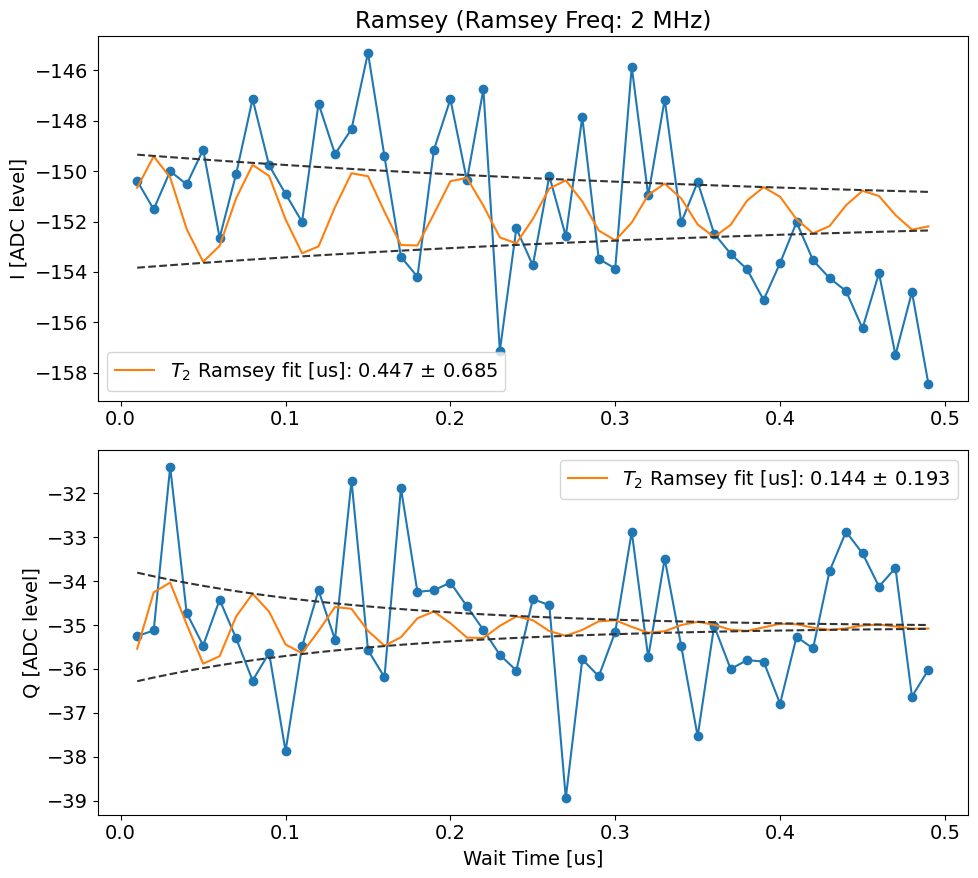

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-17_11-01-33_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-17.md


In [205]:
t2ramsey_any.analyze()
# fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
# t2ramsey_any.analyze(fitparams=[500, 0.05, None, None, None, None])
t2ramsey_any.display()

In [ ]:
# print("Qubit frequency before update:",multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency'])
# print("Qubit frequency before update:",multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency'])
# multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency']  += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency']  += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# print('Updated qubit frequency to:',multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency'])
# print('Updated qubit frequency to:',multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency'])

print("Qubit frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
print("Qubit frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] = 3428.1548845179946
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] = 3428.1548845179946
print('Updated qubit frequency to:',expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
print('Updated qubit frequency to:',expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])

Qubit frequency before update: 3420.022801387772
Qubit frequency before update: 3422.5429916864027
Updated qubit frequency to: 3428.1548845179946
Updated qubit frequency to: 3428.1548845179946


### Rabi

In [256]:
amprabi_any = do_amplitude_rabi(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    # sigma_test=multiphoton_cfg_thisrun.pulses['pi_' + transition]['sigma'],
    sigma_test= expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['sigma'][i],
    qubit=0,
    # user_defined_freq=[True, multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency']],
    user_defined_freq=[True, expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][1]],
    prepulse=True,
    postpulse=postpulse,
    gate_based=False,
    pre_sweep_pulse=pre_sweep_pulse,
    post_sweep_pulse=post_pulse,
    step=100,expts=100,reps=100
)

Amplitude Rabi Program with config: {'qubit': {'ch': [2], 'type': ['full'], 'nyquist': [1]}, 'readout': {'ch': [5], 'type': ['full'], 'nyquist': [1]}, 'manipulate_in': {'ch': [3], 'type': ['full'], 'nyquist': [2]}, 'storage_in': {'ch': [6], 'type': ['full'], 'nyquist': [2]}, 'flux_low': {'ch': [1], 'type': ['full'], 'nyquist': [1]}, 'flux_high': {'ch': [1], 'type': ['full'], 'nyquist': [1]}, 'sideband': {'ch': [0], 'type': ['full'], 'nyquist': [1]}}


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00091_AmplitudeRabiExperiment.h5


Pi gain from avgi data [dac units]: 2760
	Pi/2 gain from avgi data [dac units]: 1353
Pi gain from avgq data [dac units]: 2742
	Pi/2 gain from avgq data [dac units]: 1329


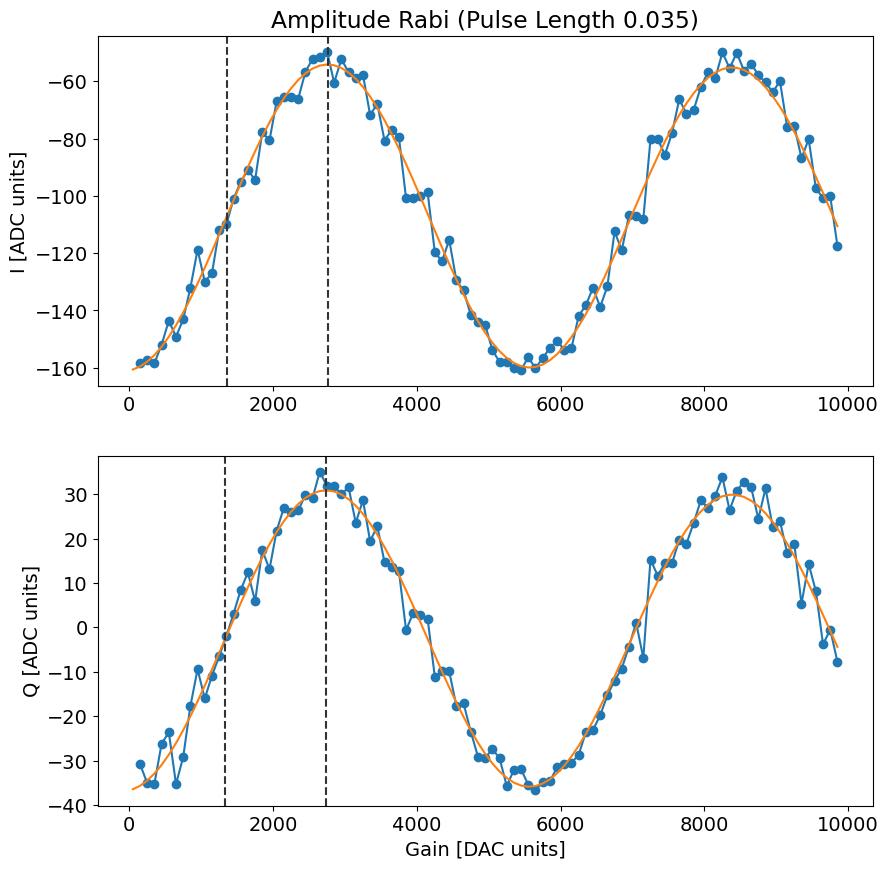

In [257]:
 # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
# amprabi_any.analyze(fitparams=[np.max(amprabi_any.data['amps']), 0.000017, 10, None, -100, None])
amprabi_any.analyze()
amprabi_any.display(title_str='Amplitude Rabi_ge', save_fig=True)

In [258]:
# print("Qubit hpi gain before update:",multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'])
# multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'] = amprabi_any.data['hpi_gain_avgi']
# print('Updated hpi gain to:',multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'])

# print("Qubit pi gain before update:",multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'])
# multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'] = amprabi_any.data['pi_gain_avgi']
# print('Updated pi gain to:',multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'])

print("Qubit hpi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] = amprabi_any.data['hpi_gain_avgi']
print('Updated hpi gain to:',expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
print("Qubit pi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] = amprabi_any.data['pi_gain_avgi']
print('Updated pi gain to:',expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])

Qubit hpi gain before update: 3860
Updated hpi gain to: 1353
Qubit pi gain before update: 6326
Updated pi gain to: 2760


### Error amplification $\pi$ pulse

### Frequency

In [968]:
expts = 25
band = 1
freq_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', transition, 'pi', 0],
    parameter_to_test='frequency',
)

Frequency start: 3426.4772366132443, Step: 0.08
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/9 [00:00<?, ?it/s]

post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00231_ErrorAmplificationExperiment.h5


fitparams [-3.6055832828694674e-06, 1.0000036055832828, 3427.517236613244, 0.19200000000000728]


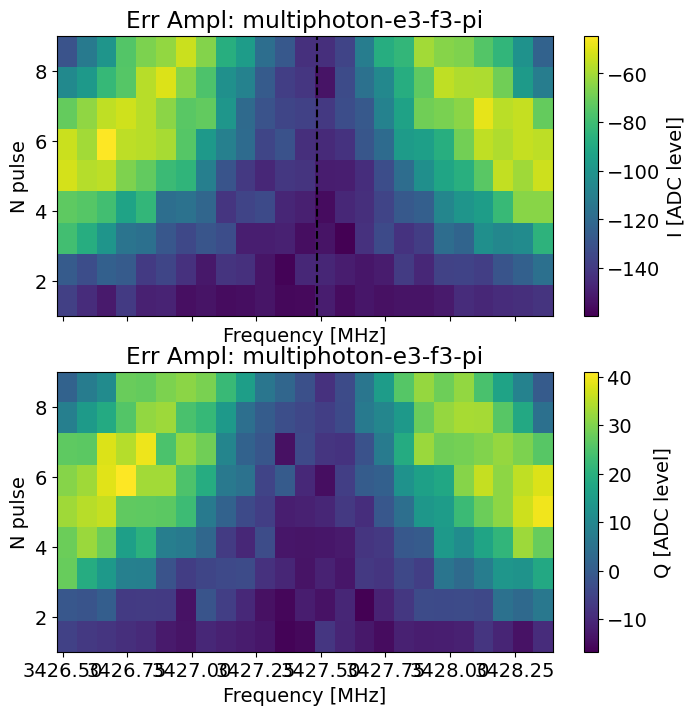

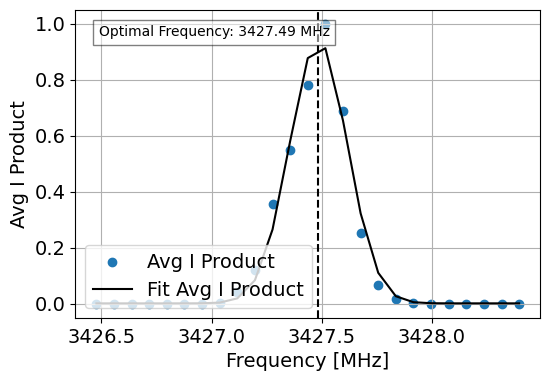

In [969]:
err_amp.analyze()
err_amp.display()

In [970]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] = err_amp.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])

Qubit pi frequency before update: 3427.4772366132443
Qubit pi frequency after update: 3427.4856992039936


In [971]:
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency']

[3428.2303438452373, 3427.977089804622, 3427.712094472353, 3427.4856992039936]

### Amplitude

In [972]:
band = 500
expts = 25
gain_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] - band
step = 2 * band / expts
print(f'Gain start: {gain_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=gain_start,
    step=step,
    pulse_type=['multiphoton', transition, 'pi', 0],
    parameter_to_test='gain',
)

Gain start: 2268, Step: 40.0
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/9 [00:00<?, ?it/s]

post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
post_pulse: [[3571.2944730174972], [3431], [0], [0], [2], ['gauss'], [0.035]]
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00232_ErrorAmplificationExperiment.h5


fitparams [-9.11222166641895e-05, 1.0000911222166642, 2748.0, 96.0]


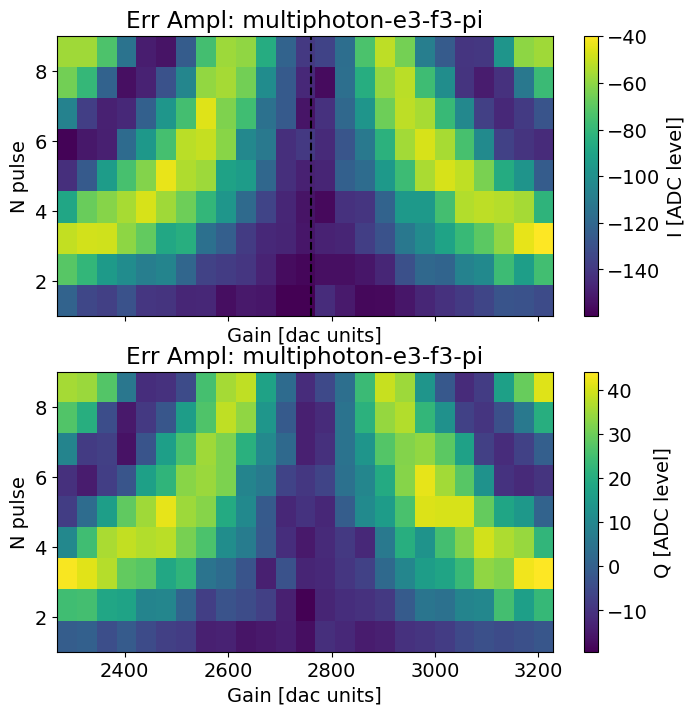

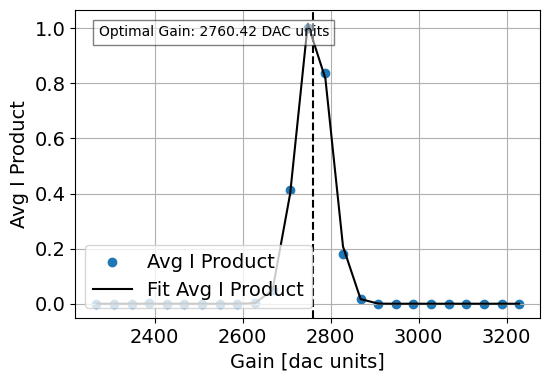

In [973]:
err_amp.analyze()
err_amp.display()

In [974]:
print("Qubit pi amplitude before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] = int(err_amp.data['fit_avgi'][2])
print("Qubit pi amplitude after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])

Qubit pi amplitude before update: 2768
Qubit pi amplitude after update: 2760


### Error amplification $\pi/2$ pulse

### Frequency

In [16]:
expts = 25
band = 2
# expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['sigma'][i] = 0.035
freq_start = expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', transition, 'hpi', 0],
    parameter_to_test='frequency',
)

Frequency start: 3571.0083971326158, Step: 0.16
cfg at start of acquire {'reps': 100, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 3571.0083971326158, 'expts': 25, 'step': 0.16, 'n_pulses': 10, 'pulse_type': ['multiphoton', 'g0-e0', 'hpi', 0], 'parameter_to_test': 'frequency', 'rounds': 1}


  0%|          | 0/9 [00:00<?, ?it/s]

pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00254_ErrorAmplificationExperiment.h5


fitparams [0.011604872521995565, 0.9883951274780044, 3573.0883971326157, 0.38400000000001455]


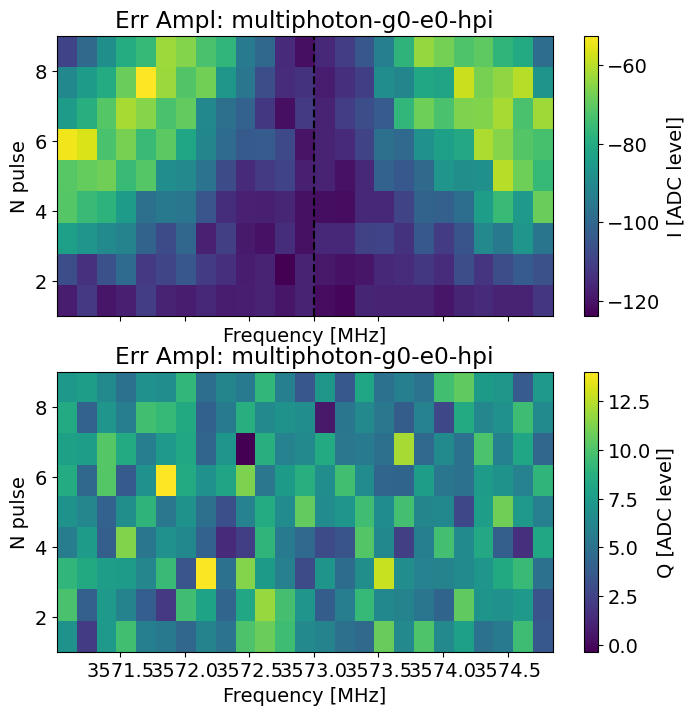

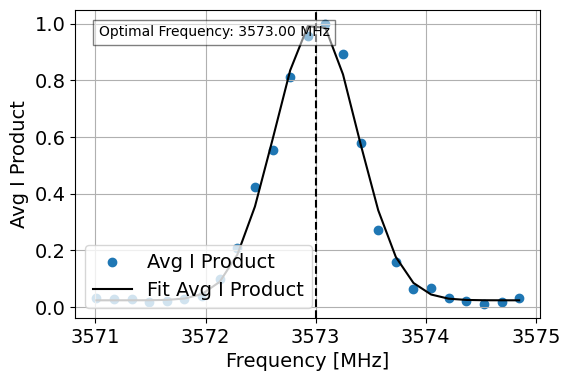

In [17]:
err_amp.analyze()
err_amp.display()

In [18]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] = err_amp.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])

Qubit pi frequency before update: 3573.0083971326158
Qubit pi frequency after update: 3573.0032581219675


### Amplitude

In [19]:
band = 1000
expts = 25
# gain_start = 18000/2 - band
gain_start = expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] - band
step = 2 * band / expts
print(f'Gain start: {gain_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=gain_start,
    step=step,
    pulse_type=['multiphoton', transition, 'hpi', 0],
    parameter_to_test='gain',
)

Gain start: 7815, Step: 80.0
cfg at start of acquire {'reps': 100, 'qubit': 0, 'qubits': [0], 'active_reset': False, 'man_reset': True, 'storage_reset': True, 'start': 7815, 'expts': 25, 'step': 80.0, 'n_pulses': 10, 'pulse_type': ['multiphoton', 'g0-e0', 'hpi', 0], 'parameter_to_test': 'gain', 'rounds': 1}


  0%|          | 0/9 [00:00<?, ?it/s]

pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
pulse_data [[], [], [], [], [], [], []]
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00255_ErrorAmplificationExperiment.h5


fitparams [-4.633262840959574e-05, 1.0000463326284097, 8855.0, 192.0]


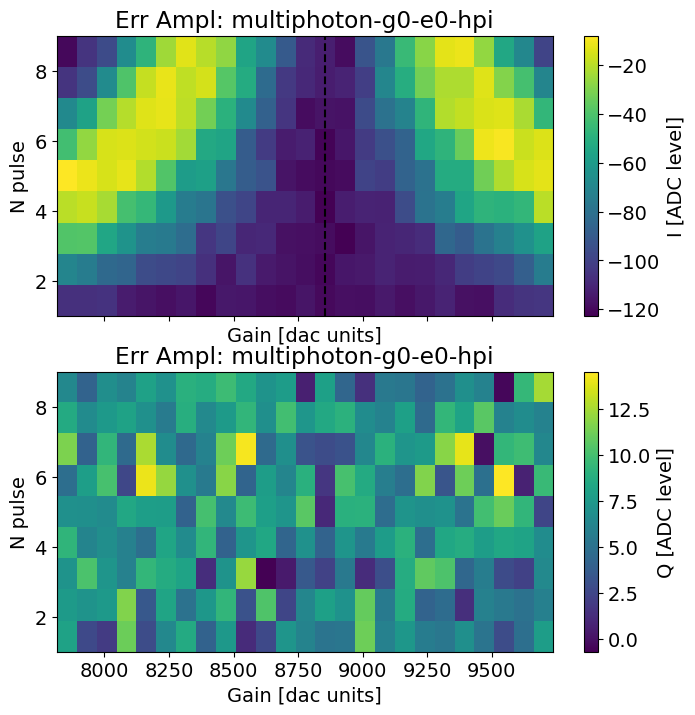

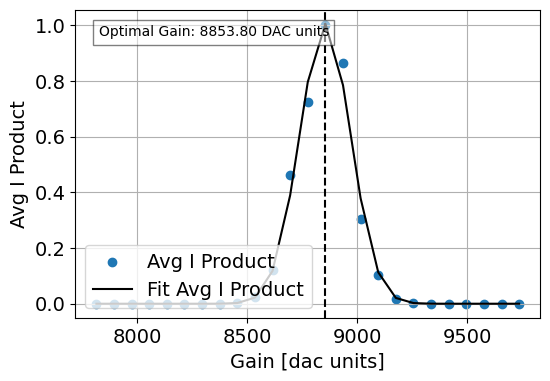

In [20]:
err_amp.analyze()
err_amp.display()

In [21]:
print("Qubit hpi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] = int(err_amp.data['fit_avgi'][2])
print("Qubit hpi gain after update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])

Qubit hpi gain before update: 8815
Qubit hpi gain after update: 8853


## Define the sideband we want to calibrate

In [977]:
sideband = 'f3-g4'
_sideband = sideband[0] + 'n' + '-' + sideband[3] + 'n+1'
i = int(sideband[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
pre_sweep_pulse.append(['multiphoton', 'e'+str(i)+'-f'+str(i), 'pi', 0])
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()

pre_sweep_pulse: [['multiphoton', 'g0-e0', 'pi', 0], ['multiphoton', 'e0-f0', 'pi', 0], ['multiphoton', 'f0-g1', 'pi', 0], ['multiphoton', 'g1-e1', 'pi', 0], ['multiphoton', 'e1-f1', 'pi', 0], ['multiphoton', 'f1-g2', 'pi', 0], ['multiphoton', 'g2-e2', 'pi', 0], ['multiphoton', 'e2-f2', 'pi', 0], ['multiphoton', 'f2-g3', 'pi', 0]]


In [267]:
def do_pulse_probe_any(
    config_thisrun,
    ds_thisrun,
    man_mode_no=1,
    start=2009,
    step=0.01,
    expts=500,
    reps=100,
    rounds=1,
    length=1,
    gain=5000,
    pulse_type='gaussian',
    qubit_f=False,
    qubits=[0],
    prepulse=True,
    pre_sweep_pulse=pre_sweep_pulse,
    relax_delay=200
):
    """
    Run the Pulse Probe F0g1 Spectroscopy experiment with configurable parameters.
    """
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_f0g1_spectroscopy.PulseProbeF0g1SpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    if start is None:
        start = ds_thisrun.get_freq('M' + str(man_mode_no)) - 5
    if pre_sweep_pulse is None:
        pre_sweep_pulse = [[3569.4827896982997], [11161], [0], [0], [2], ['g'], [0.035]]

    qspec.cfg.expt = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'length': length,
        'gain': gain,
        'pulse_type': pulse_type,
        'qubit_f': qubit_f,
        'qubits': qubits,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }

    qspec.cfg.device.readout.relax_delay = [relax_delay]
    qspec.go(analyze=False, display=False, progress=True, save=True)
    return qspec

def analyze_and_display_pulse_probe_any(qspec):
    from multimode_expts.fit_display_classes import Spectroscopy
    spec_analysis = Spectroscopy(
        qspec.data)
    spec_analysis.analyze(fit=True)
    spec_analysis.display()

In [189]:
man_spec = do_pulse_probe_any(expts_base_inst.config_thisrun,
                                expts_base_inst.ds_thisrun, 
                                man_mode_no = 1, 
                                start = 2009, 
                                step=0.01,
                                expts=500,
                                length=0.8,
                                prepulse = True, pre_sweep_pulse=pre_sweep_pulse)
analyze_and_display_pulse_probe_any(man_spec)

KeyboardInterrupt: 

In [98]:
# print("Transition frequency before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'] =  man_spec.data['fit_avgi'][2]
# print('Updated transition frequency to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
print("Transition frequency before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = man_spec.data['fit_avgi'][2]
print('Updated transition frequency to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Transition frequency before update: 2010.9292508443893
Updated transition frequency to: 2010.9292508443893


### Quick chevron

In [268]:
def do_length_rabi_any_sweep(
    config_thisrun,
    expt_path,
    config_path,
    freq_start,
    freq_stop,
    freq_step,
    start=2,
    step=0.1,
    qubits=[0],
    expts=25,
    reps=100,
    rounds=1,
    gain=8000,
    ramp_sigma=0.005,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    check_man_reset=[False, 0],
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=postpulse,
    pre_sweep_pulse=None,
    post_sweep_pulse=post_pulse,
    err_amp_reps=0
):
    """Run the Length Rabi General F0g1 Experiment Sweep with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import man_f0g1_class
    experiment_class = man_f0g1_class
    sweep_experiment_name = 'length_rabi_f0g1_sweep'
    class_for_exp = experiment_class(
        soccfg=expts_base_inst.soc,
        path=expt_path,
        prefix=sweep_experiment_name,
        config_file=config_path,
        exp_param_file=expts_base_inst.exp_param_file,
        config_thisrun=config_thisrun
    )

    class_for_exp.loaded[sweep_experiment_name] = {
        'freq_start': freq_start,
        'freq_stop': freq_stop,
        'freq_step': freq_step,
        'start': start,
        'step': step,
        'qubits': qubits,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'gain': gain,
        'ramp_sigma': ramp_sigma,
        'use_arb_waveform': use_arb_waveform,
        'pi_ge_before': pi_ge_before,
        'pi_ef_before': pi_ef_before,
        'pi_ge_after': pi_ge_after,
        'normalize': normalize,
        'active_reset': active_reset,
        'check_man_reset': check_man_reset,
        'check_man_reset_pi': check_man_reset_pi,
        'prepulse': prepulse,
        'postpulse': postpulse,
        'post_sweep_pulse': post_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'err_amp_reps': err_amp_reps,
    }
    return eval('class_for_exp.run_sweep')(sweep_experiment_name=sweep_experiment_name)


In [978]:
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain']

[8000, 8000, 6000, 6000]

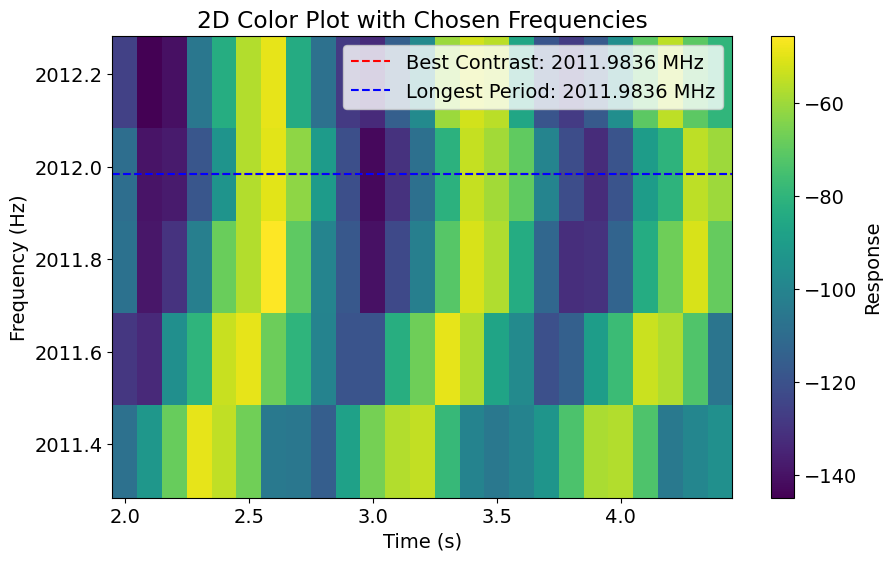

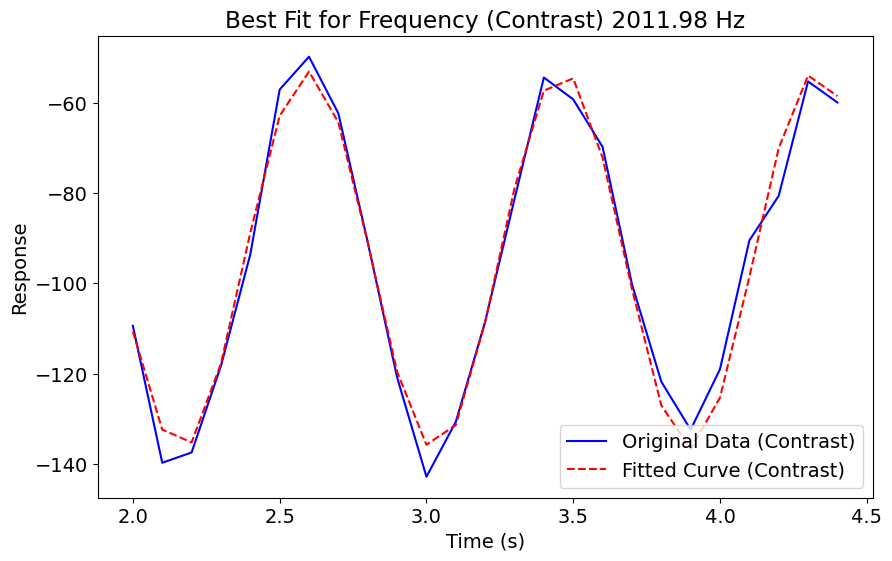

In [984]:
# guess_freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency']
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i] = 5000
guess_freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i]
freq_start = guess_freq- 0.5
freq_stop = guess_freq + 0.5
# freq_start = guess_freq- 0.1
# freq_stop = guess_freq + 0.1
freq_step = 0.2
man_chevrons = do_length_rabi_any_sweep(expts_base_inst.config_thisrun, expts_base_inst.expt_path, expts_base_inst.config_file, 
                                                freq_start, freq_stop, freq_step,
                                                prepulse = True, 
                                                gain=expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i],
                                                pre_sweep_pulse= pre_sweep_pulse,
                                                postpulse = postpulse ,
                                                post_sweep_pulse=post_pulse,
                                                )

In [985]:
# print("Transition frequency before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'] =  man_chevrons.results['best_frequency_contrast']
# print('Updated transition frequency to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])

print("Transition frequency before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = man_chevrons.results['best_frequency_contrast']
print('Updated transition frequency to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Transition frequency before update: 2011.8836365005202
Updated transition frequency to: 2011.9836365005203


### Length rabi first round

In [986]:
def do_length_rabi_f0g1_general(
    config_thisrun,
    ds_thisrun,
    expt_path,
    config_path,
    man_mode_no=1,
    start=None,
    step=0.045,
    qubits=[0],
    expts=50,
    reps=100,
    rounds=1,
    gain=8000,
    freq=None,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    man_reset=True,
    stor_reset=True,
    check_man_reset=[False, 0],
    swap_lossy=False,
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=postpulse,
    post_sweep_pulse=None,
    pre_sweep_pulse=None,
    err_amp_reps=0,
    relax_delay=2500
):
    """
    Run the Length Rabi General F0g1 Experiment with all config params as function arguments.
    """
    length_rabi = expts_base_inst.meas.single_qubit.length_rabi_f0g1_general.LengthRabiGeneralF0g1Experiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='LengthRabiGeneralF0g1Experiment', config_file=config_path
    )

    length_rabi.cfg = AttrDict(deepcopy(config_thisrun))

    if freq is None:
        freq = ds_thisrun.get_freq('M' + str(man_mode_no))
    if start is None:
        start = expts_base_inst.soc.cycles2us(3)
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []

    print('gain', gain)

    length_rabi.cfg.expt = dict(
        start=start,
        step=step,
        qubits=qubits,
        expts=expts,
        reps=reps,
        rounds=rounds,
        gain=gain,
        freq=freq,
        use_arb_waveform=use_arb_waveform,
        pi_ge_before=pi_ge_before,
        pi_ef_before=pi_ef_before,
        pi_ge_after=pi_ge_after,
        normalize=normalize,
        active_reset=active_reset,
        man_reset=man_reset,
        stor_reset=stor_reset,
        check_man_reset=check_man_reset,
        swap_lossy=swap_lossy,
        check_man_reset_pi=check_man_reset_pi,
        prepulse=prepulse,
        pre_sweep_pulse=pre_sweep_pulse,
        postpulse=postpulse,
        post_sweep_pulse= post_sweep_pulse,
        err_amp_reps=err_amp_reps,
    )

    length_rabi.cfg.device.readout.relax_delay = [relax_delay]
    length_rabi.go(analyze=False, display=False, progress=True, save=True)

    from multimode_expts.fit_display_classes import LengthRabiFitting
    length_rabi_analysis = LengthRabiFitting(length_rabi.data, config=length_rabi.cfg)
    length_rabi_analysis.analyze()
    length_rabi_analysis.display(title_str='Length Rabi General F0g1')

    return length_rabi_analysis

gain 5000


  0%|          | 0/50 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00121_LengthRabiGeneralF0g1Experiment.h5
p1: 1.157963370631065
p2: 92.4496005466404
Pi length: 0.42591636881253775
Pi/2 length: 0.2100200750776544
p1: 1.1544095015915923
p2: 92.23911494401099
Pi length: 0.42773403682649697
Pi/2 length: 0.21117310272527615


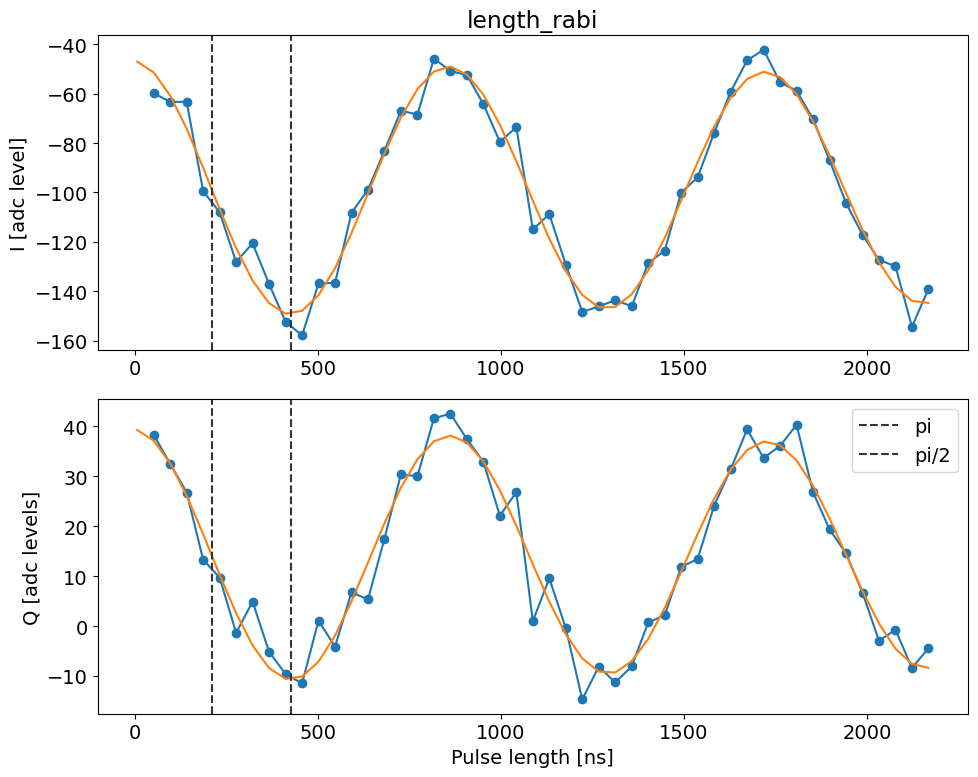

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-18_23-02-37_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-18.md


In [987]:

len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                              # gain = 1000,
                                              gain = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i],
                                              freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i],
                                              prepulse=True,pre_sweep_pulse=pre_sweep_pulse, postpulse=postpulse, post_sweep_pulse=post_pulse
                                              )
        

In [989]:
# print("Transition length before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'] = len_rabis_mans.results['pi_length']
# print('Updated transition length to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
print("Transition length before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i] = len_rabis_mans.results['pi_length']
print('Updated transition length to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])

Transition length before update: 0.42591636881253775
Updated transition length to: 0.42591636881253775


### Error amplification

In [990]:
expts = 50
band = 0.25
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][0] = 0.5491206701698654
freq_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] - band
# freq_start = 2011 - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 7,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', sideband, 'pi', 0],
    parameter_to_test='frequency',
)

Frequency start: 2011.7336365005203, Step: 0.01
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/6 [00:00<?, ?it/s]

post_pulse: [[3579.9600164369886, 3428.2303438452373, 2011.3740763005724, 3571.5382408986256, 3427.977089804622, 2011.0147366265876, 3571.543042357372, 3427.712094472353, 2011.8386011123011, 3571.2944730174972, 3427.4856992039936], [18768, 2759, 8000, 3456, 2760, 8000, 3449, 2763, 6000, 3431, 2760], [0, 0, 0.5358111825204673, 0, 0, 0.38504166408699336, 0, 0, 0.41142427626974065, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss', 'flat_top', 'gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035, 0.005, 0.035, 0.035, 0.005, 0.035, 0.035]]
post_pulse: [[3579.9600164369886, 3428.2303438452373, 2011.3740763005724, 3571.5382408986256, 3427.977089804622, 2011.0147366265876, 3571.543042357372, 3427.712094472353, 2011.8386011123011, 3571.2944730174972, 3427.4856992039936], [18768, 2759, 8000, 3456, 2760, 8000, 3449, 2763, 6000, 3431, 2760], [0, 0, 0.5358111825204673, 0, 0, 0.3850416640869933

fitparams [0.004297505154724879, 0.9957024948452751, 2011.9436365005204, 0.04900000000000091]


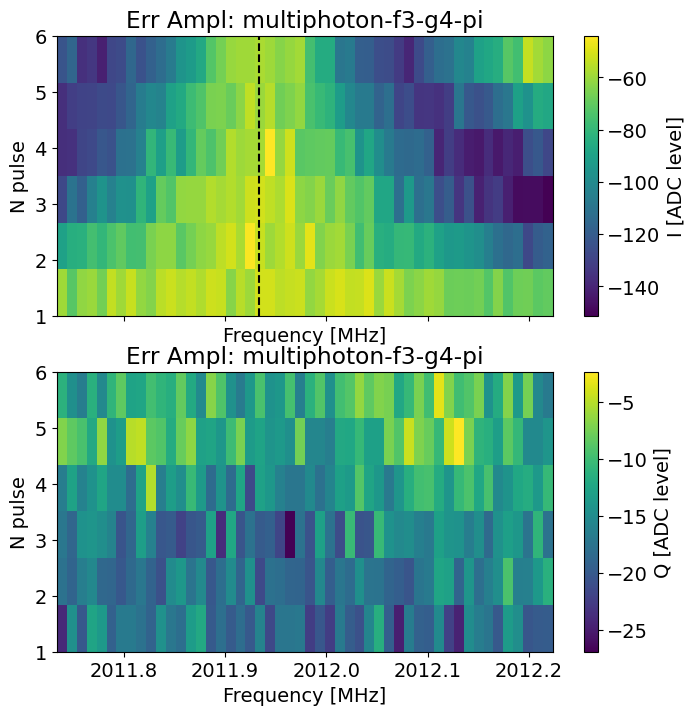

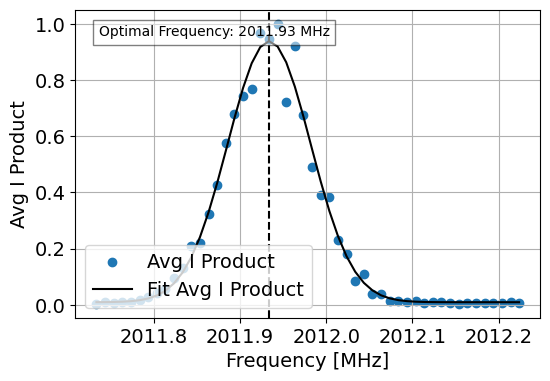

In [991]:
err_amp.analyze(state_fin='e')
err_amp.display()

In [992]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = err_amp.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Qubit pi frequency before update: 2011.9836365005203
Qubit pi frequency after update: 2011.9338678647098


### Length Rabi

gain 5000


  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00122_LengthRabiGeneralF0g1Experiment.h5
p1: 1.1913046363022135
p2: 86.37533588797629
Pi length: 0.4281595956895885
Pi/2 length: 0.21830563190749902
p1: 1.195845663708199
p2: 85.20586608911938
Pi length: 0.4292502404111161
Pi/2 length: 0.22019316257318275


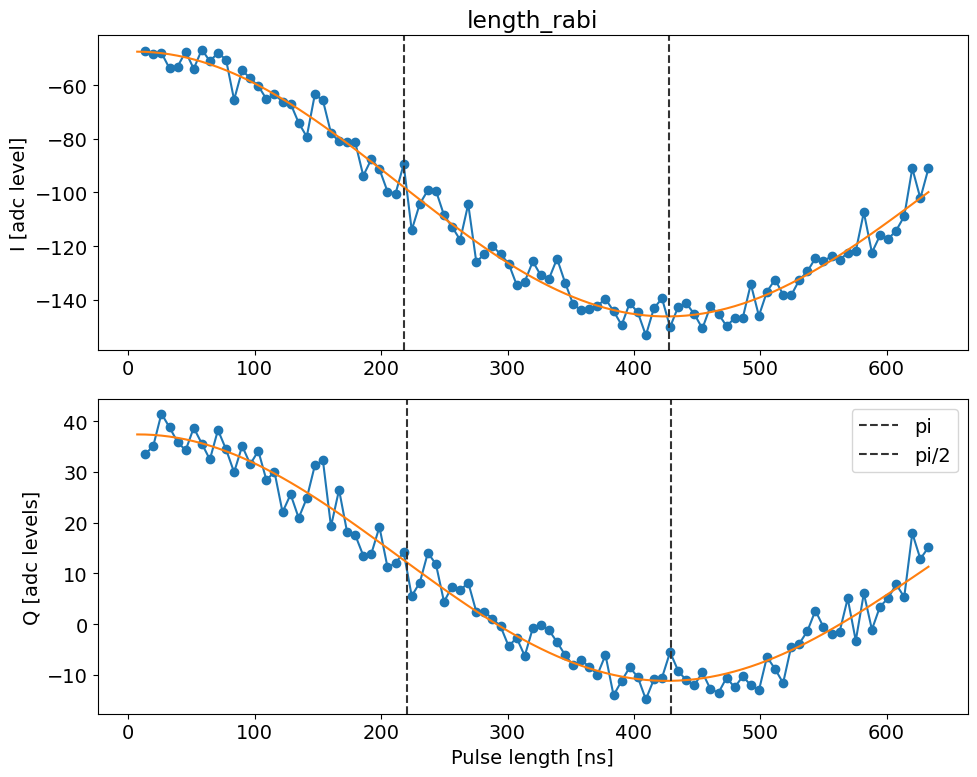

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-18_23-05-02_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-18.md


In [993]:
stop = 1.5 * expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i]
expts = 100
step = stop / expts


len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                              step=step, expts=expts,
                                              gain = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i],
                                            #   freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'],
                                              freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i],
                                              prepulse=True,pre_sweep_pulse=pre_sweep_pulse, postpulse=postpulse, post_sweep_pulse=post_pulse
                                              )

In [994]:
# print("Transition length before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'] = len_rabis_mans.results['pi_length']
# print('Updated transition length to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
print("Transition length before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i] = len_rabis_mans.results['pi_length']
print('Updated transition length to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])

Transition length before update: 0.42591636881253775
Updated transition length to: 0.4281595956895885


## Single shot
To check broadband pulses and recalibrate phase

### Some fake optimal control pulse to test

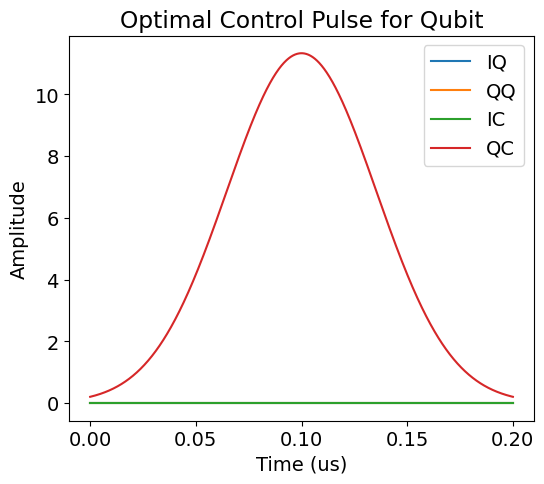

In [42]:
from scipy import special
sigma_qb = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.sigma[0]
sigma_cav = expts_base_inst.config_thisrun.device.manipulate.displace_sigma[0]
gain_qb = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.gain[0]
n=4
# t_vec = np.linspace(0 ,n*sigma_qb ,1000)
t_vec = np.linspace(0 ,n*sigma_cav ,1000)
theta_to_gain = np.pi/2/gain_qb
alpha_to_gain = expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0]

# drive_to_gain_qb = sigma_qb * np.sqrt(2*np.pi)/theta_to_gain * special.erf(n/2/np.sqrt(2))
# drive_to_gain_cav = sigma_cav * np.sqrt(2*np.pi)/alpha_to_gain * special.erf(n/2/np.sqrt(2))
drive_to_gain_qb = sigma_qb * np.sqrt(np.pi)/theta_to_gain * special.erf(n/2)
drive_to_gain_cav = sigma_cav * np.sqrt(np.pi)/alpha_to_gain * special.erf(n/2)

# epsilon_pi = np.sqrt(np.pi/8/sigma_qb**2) * 1/special.erf(n/2/np.sqrt(2))
rot = 0.5
epsilon_pi = np.sqrt(np.pi/4/sigma_qb**2) * 1/special.erf(n/2) * rot
alpha = 1
epsilon_1 = 1j*((1)*alpha)/(np.sqrt(np.pi)*sigma_cav*special.erf(n/2))

# iq = np.exp(-(t_vec - n*sigma_qb/2)**2/(2*sigma_qb**2)) * epsilon_pi * drive_to_gain_qb
# iq = np.exp(-(t_vec - n*sigma_qb/2)**2/(sigma_qb**2)) * epsilon_pi
iq = np.zeros_like(t_vec)
qq = np.zeros_like(iq)
ic = np.real(np.exp(-(t_vec - n*sigma_cav/2)**2/(sigma_cav**2)) * epsilon_1)
qc = np.imag(np.exp(-(t_vec - n*sigma_cav/2)**2/(sigma_cav**2)) * epsilon_1)
# ic =np.zeros_like(t_vec)
# qc =np.zeros_like(t_vec)

# pad with 100ns of zeros at the end
# dt = t_vec[1] - t_vec[0]
# t_vec = np.append(t_vec, t_vec[-1] + dt * np.arange(1, 8001))
# iq = np.append(iq, np.zeros(8000))
# qq = np.append(qq, np.zeros(8000))
# ic = np.append(ic, np.zeros(8000))
# qc = np.append(qc, np.zeros(8000))

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(t_vec, iq, label='IQ')
ax.plot(t_vec, qq, label='QQ')
ax.plot(t_vec, ic, label='IC')
ax.plot(t_vec, qc, label='QC')
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
ax.set_title('Optimal Control Pulse for Qubit')
ax.legend()



data = {
    'times': t_vec*1e3,
    'I_q' : iq/2/np.pi*1e-3,
    'Q_q' : qq/2/np.pi*1e-3,
    'I_c' : ic/2/np.pi*1e-3,
    'Q_c' : qc/2/np.pi*1e-3
}

filepath = "H://Shared drives//SLab//Multimode//optimal_control//"
filename = "test_pi"
# save in the npz format
np.savez_compressed(filepath + filename, **data)


In [57]:
def do_single_shot(
    config_thisrun,
    expt_path,
    config_path,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=True,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=250
):
    """Run the single shot experiment with configurable parameters."""

   
    hstgrm = expts_base_inst.meas.single_qubit.single_shot.HistogramExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='HistogramExperiment', config_file=config_path
    )

    hstgrm.cfg = AttrDict(deepcopy(config_thisrun))

    hstgrm.cfg.expt = {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
    }

    hstgrm.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    hstgrm.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import Histogram
    
    hist_analysis = Histogram(
            hstgrm.data, verbose=True,
             span=300, threshold=None, config=hstgrm.cfg,
        )
    return hstgrm, hist_analysis


def update_single_shot(hist_analysis, config_thisrun):
    """Update the configuration based on single shot experiment results."""
    
    hist_analysis.analyze(plot = True)
    fids = hist_analysis.results['fids']
    confusion_matrix = hist_analysis.results['confusion_matrix']
    thresholds_new = hist_analysis.results['thresholds']
    angle = hist_analysis.results['angle']
    print(fids)

    config_thisrun.device.readout.phase = [config_thisrun.device.readout.phase[0] + angle]
    config_thisrun.device.readout.threshold = thresholds_new
    config_thisrun.device.readout.threshold_list = [thresholds_new]
    config_thisrun.device.readout.Ie = np.median(hist_analysis.data['Ie_rot'])
    config_thisrun.device.readout.Ig = np.median(hist_analysis.data['Ig_rot'])
    if hist_analysis.cfg.expt.active_reset:
        config_thisrun.device.readout.confusion_matrix_with_active_reset = confusion_matrix
    else:
        config_thisrun.device.readout.confusion_matrix_without_reset = confusion_matrix
    print('Updated readout!')

In [58]:
prepulse = [
     # ['qubit', 'ge', 'pi', 0],
     ['optimal_control', 'test', '2', [0, 0]]
     ]
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][1]= gain_cav
# gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[1])
# print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[1][1]][prepulse[1][2]]['gain'][0]= gain_qb
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[1][1]][prepulse[1][2]]['gain'][1]= gain_cav
prepulse_seq = mm_base_calib.get_prepulse_creator(prepulse, cfg=expts_base_inst.config_thisrun).pulse.tolist()
print(f'Prepulse: {prepulse_seq}')

Optimal pulse file loaded: H:\Shared drives\SLab\Multimode\optimal_control\test_pi.npz
Max q: 0.0
Max c: 11.336776883272366
Gain for qubit: 0, Gain for cavity: 1559
careful I am assing channel idx to 4 until I fix it
pulse (7, 1) (7, 1)
Prepulse: [[3571.6994214615424, 4984.779973902164], [0, 1559], [0, 0], [0.0, 0.0], [2, 3], [['opt_cont', 'test', '2'], ['opt_cont', 'test', '2']], [0, 0]]


In [59]:
hstgrm = do_single_shot(config_thisrun=expts_base_inst.config_thisrun,expt_path=expts_base_inst.expt_path,config_path=expts_base_inst.config_file, 
                        reps = 5000, active_reset=False,
                        prepulse=False,
                        gate_based=False,
                        check_f=False,
                        pre_sweep_pulse=prepulse_seq,
                        relax_delay = 2500)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00349_HistogramExperiment.h5
{'device': {'qubit': {'T1': [486.46448644846816], 'f_ge': [3571.6994214615424], 'f_ef': [3428.4457610447353], 'ramp_sigma': [0.005], 'ramp_sigma_num': [3.0], 'pulses': {'pi_ge': {'gain': [3429], 'sigma': [0.035], 'length': [0.0], 'type': ['gauss']}, 'hpi_ge': {'gain': [1655], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'pi_ef': {'gain': [2770], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}, 'slow_pi_ge': {'gain': [15], 'sigma': [0.1], 'length': [10], 'type': ['flat_top']}}, 'T1_ef': [144.16571854782674]}, 'readout': {'trig_offset': [450], 'frequency': [749.0683556354792], 'gain': [800], 'phase': [-69.8075664914381], 'threshold': [-71.93799978190091], 'threshold_list': [[-71.93799978190091]], 'man1_drive_list': [0.0], 'man2_drive_list': [0.0], 'readout_length': [1.5], 'relax_delay': [2500], 'confusion_matrix_

Unrotated:
Ig -110.75974025974025 +/- 29.536493118812725 	 Qg -2.6796536796536796 +/- 25.903202278996776 	 Amp g 110.79215047217022
Ie -2.0227272727272725 +/- 31.849390921168794 	 Qe 9.734848484848484 +/- 26.00813578775818 	 Amp e 9.942771275795875
updating temp data
Rotated:
Ig -110.7159278360295 +/- 29.671224034787283 	 Qg 9.701766164414135 +/- 25.748762656519176 	 Amp g 111.14018599634365
Ie -0.8322792852782843 +/- 31.905335873545265 	 Qe 10.307274170506243 +/- 25.93947516817105 	 Amp e 10.3408215164313


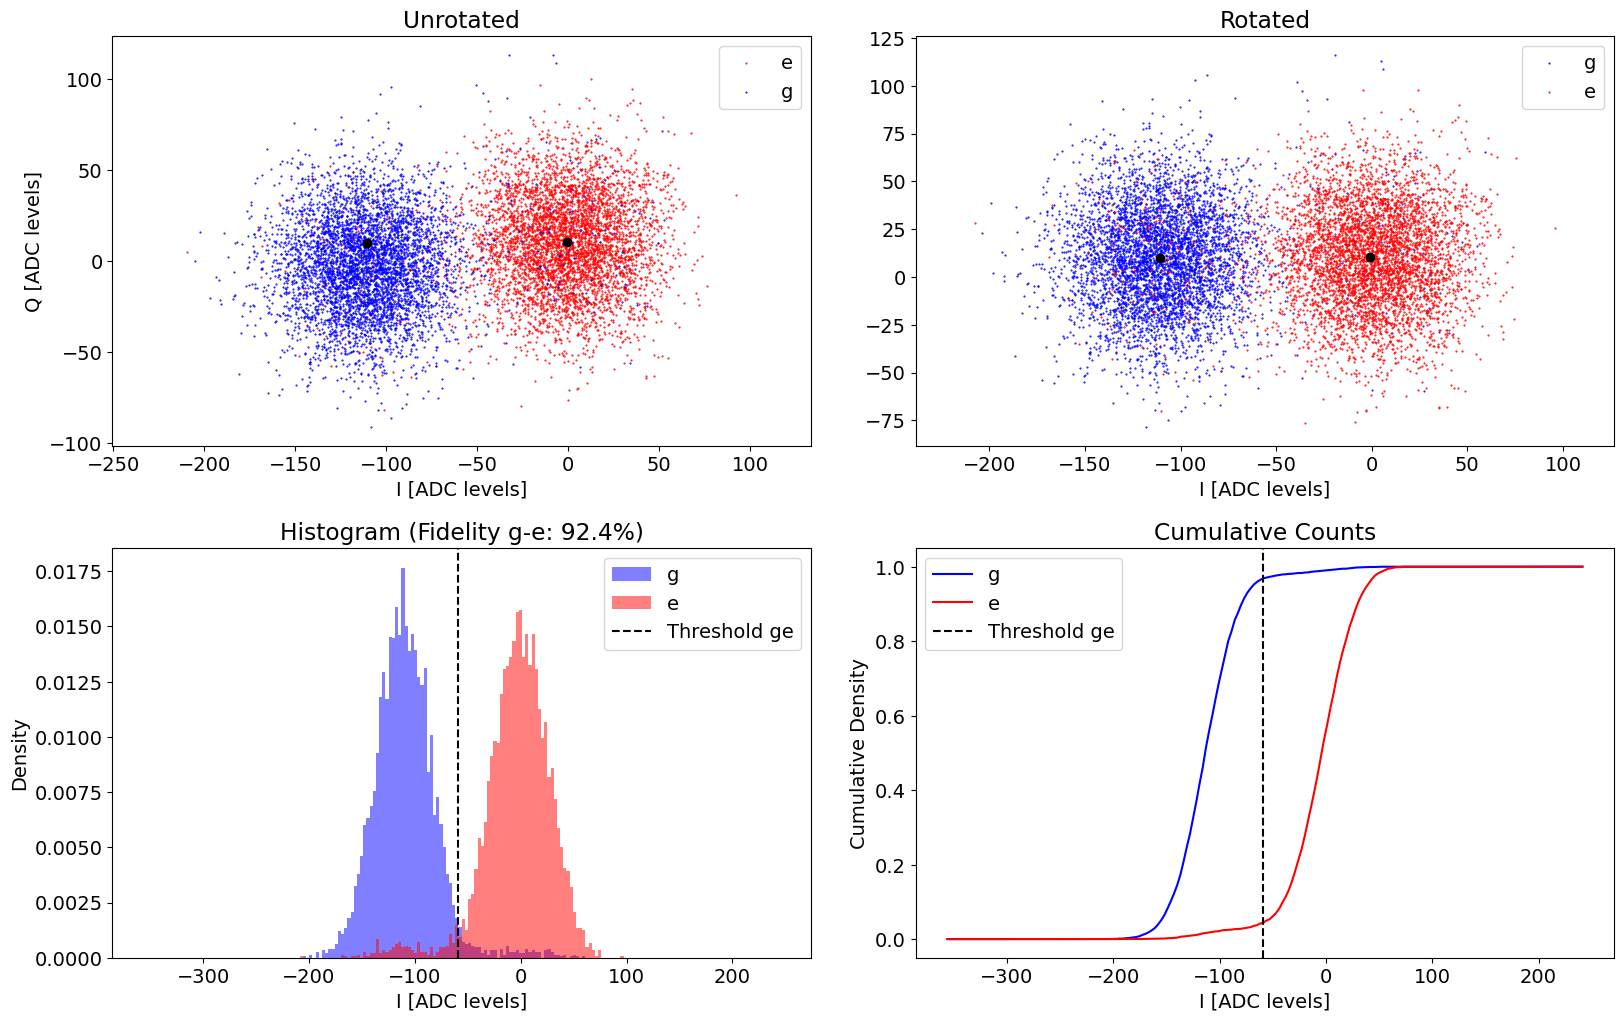

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-22_11-40-58_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-22.md


In [61]:
hstgrm[1].analyze(plot = True)

Unrotated:
Ig -110.75974025974025 +/- 29.536493118812725 	 Qg -2.6796536796536796 +/- 25.903202278996776 	 Amp g 110.79215047217022
Ie -2.0227272727272725 +/- 31.849390921168794 	 Qe 9.734848484848484 +/- 26.00813578775818 	 Amp e 9.942771275795875
updating temp data
Rotated:
Ig -110.7159278360295 +/- 29.671224034787283 	 Qg 9.701766164414135 +/- 25.748762656519176 	 Amp g 111.14018599634365
Ie -0.8322792852782843 +/- 31.905335873545265 	 Qe 10.307274170506243 +/- 25.93947516817105 	 Amp e 10.3408215164313


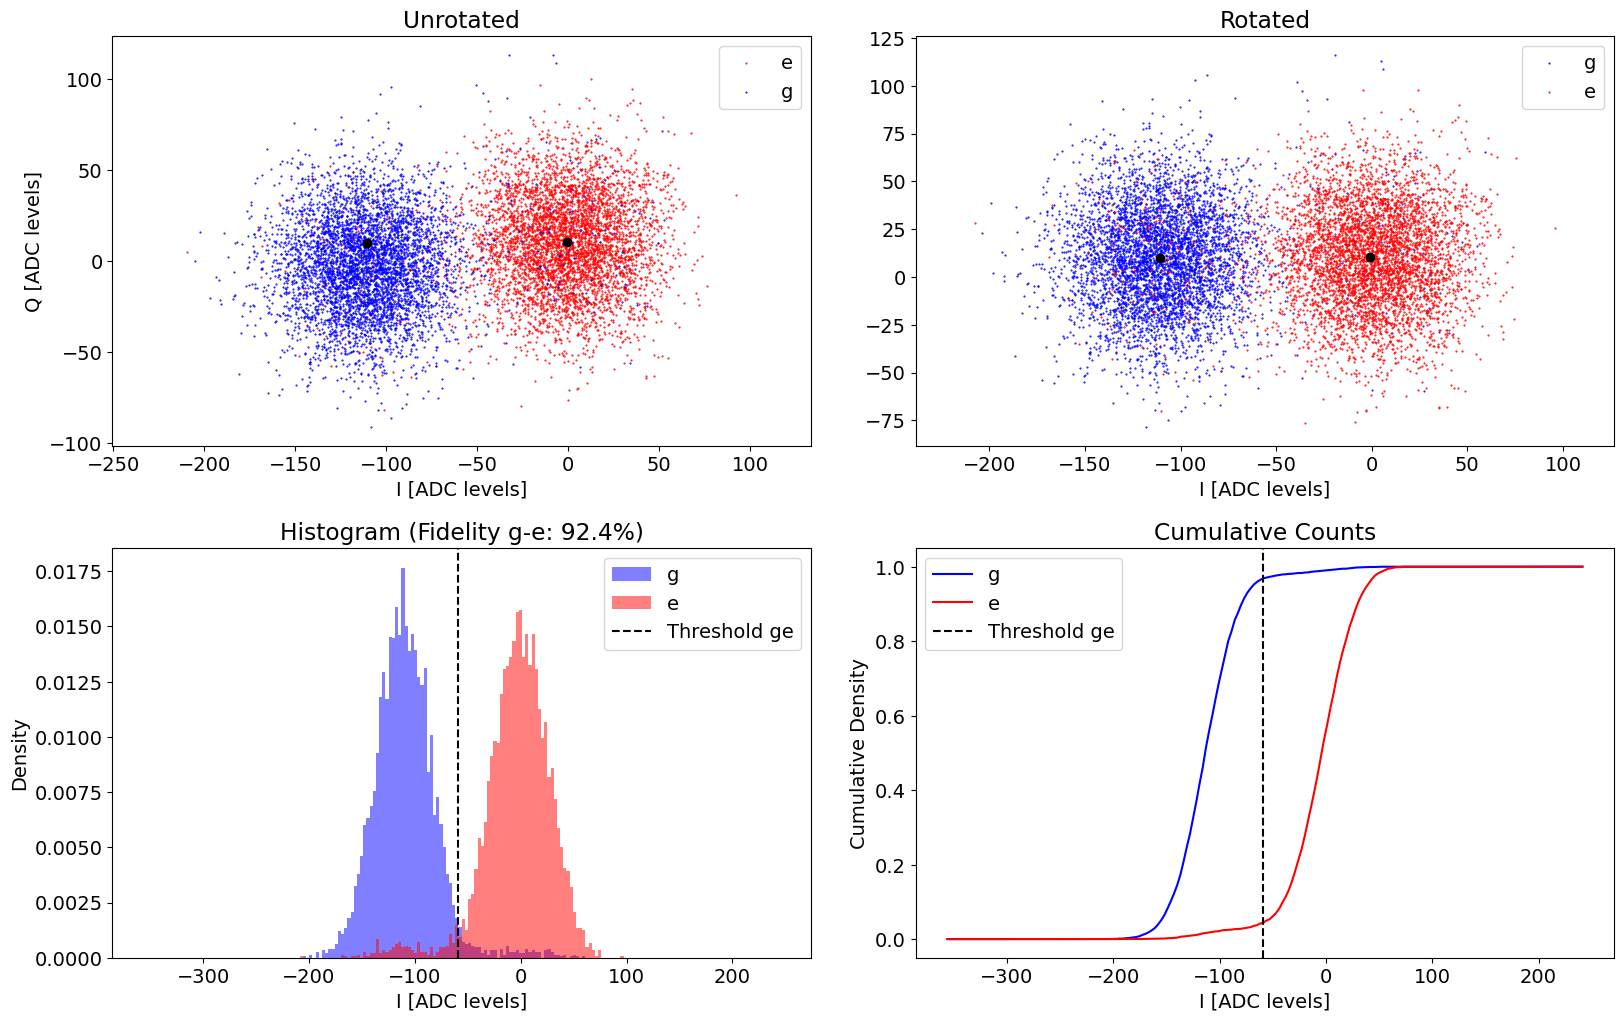

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-22_11-41-03_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-22.md
[0.924]
Updated readout!
Single shot done!


In [62]:
update_single_shot(hstgrm[1], expts_base_inst.config_thisrun)
print('Single shot done!')

## Photon Number Resolved  Spectroscopy

This is used to check that the fock states are well prepared before we do the tomography

In [1167]:
def do_pulse_probe(
    config_thisrun, 
    start=3560,  # [MHz]
    step=0.1,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=2000,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=400,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=250,  # Wait time between experiments [us]
    ): 
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_spectroscopy.PulseProbeSpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeSpectroscopyExperiment', 
        config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = dict(
        qubits = [0],
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        sigma=sigma,
        qubit=qubit,
        prepulse = prepulse, 
        pre_sweep_pulse = pre_sweep_pulse,
        gate_based = gate_based,
    )

    qspec.cfg.device.readout.relax_delay = [relax_delay] # Wait time between experiments [us]
    qspec.go(analyze=True, display=True, progress=True, save=True)
    return qspec

In [1154]:
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=0)
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
print(f"pre_sweep_pulse: {pre_sweep_pulse}")

pre_sweep_pulse: [[], [], [], [], [], [], []]


pulse param ['ge', 'hpi', 0]
channel name qubit
pulse param ['ge', 'parity_M1', 0]
channel name qubit
pulse param ['ge', 'hpi', 180]
channel name qubit
pulssing on channel:  2
qubit register page: 1, frequency register: 22
pulse_data [[], [], [], [], [], [], []]


  0%|          | 0/3000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00171_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3571.7296338541246, HWHM 0.5448621498439645
Found peak in I at [MHz] 3571.7235731588867, HWHM 0.5353069459534117
Found peak in Q at [MHz] 3572.0011309010874, HWHM 0.009946874297940963


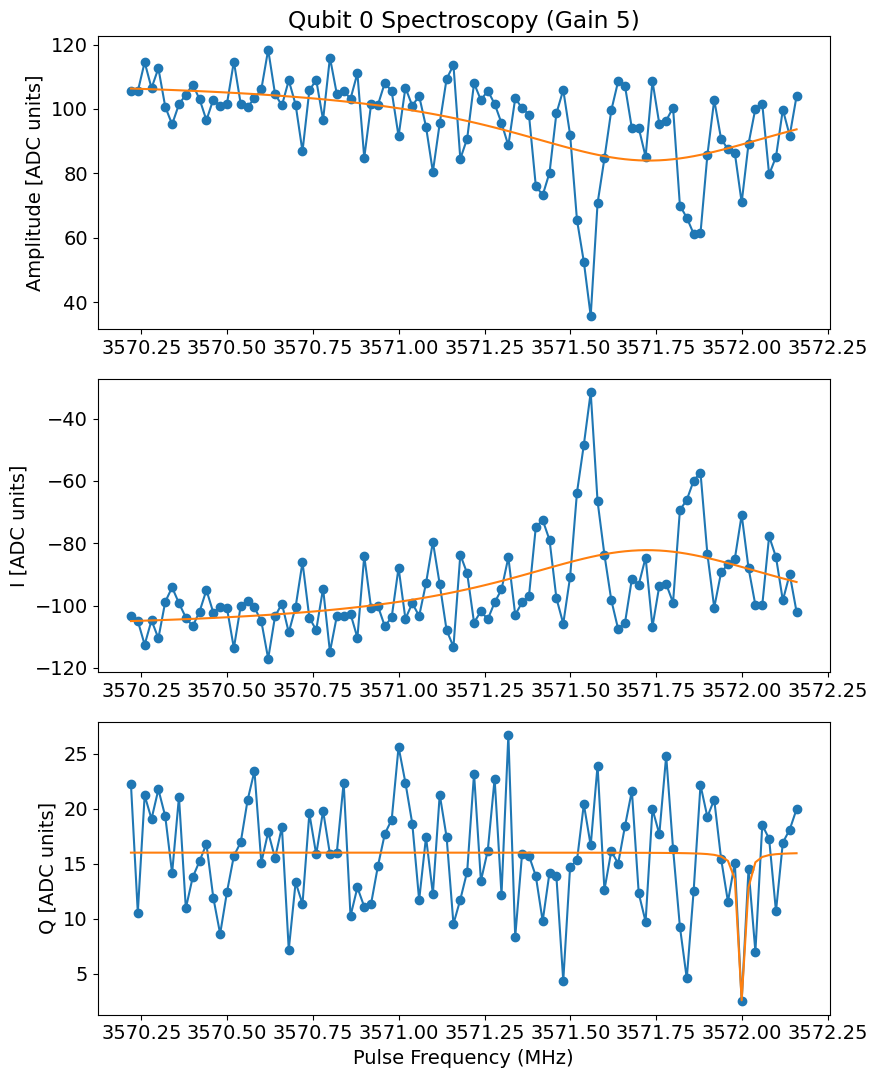

In [1171]:
qspec= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=expts_base_inst.config_thisrun.device.qubit.f_ge[0]-1.5,  # [MHz]
    step=0.020,  # min step ~1 MHz
    expts=100,  # Number of experiments stepping from start
    reps=30,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=10,  # Qubit probe constant pulse length [us]
    gain=5,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=pre_sweep_pulse,
    gate_based=False,
    relax_delay=8000  # Wait time between experiments [us]
)

# Setting up the Wigner tomography

## Parity Delay

In [249]:
def do_parity_delay(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,
    step=0.05,
    expts=50,
    reps=250,
    rounds=1,
    qubits=[0],
    prepulse=True,
    parity_fast=True,
    normalize=False,
    active_reset=False,
    man_reset=True,
    gate_based=False,
    storage_reset=True,
    pre_sweep_pulse=[],
    man_mode_no=1,
    relax_delay=2500
):
    print("Prepulse:", pre_sweep_pulse)

    pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'prepulse': prepulse,
        'normalize': normalize,
        'active_reset': active_reset,
        'parity_fast': parity_fast,
        'man_reset': man_reset,
        'gate_based': gate_based,
        'storage_reset': storage_reset,
        'pre_sweep_pulse': pre_sweep_pulse,
    }
    # print("expt_path:", expt_path)
    # print("config_path:", config_path)
    
    
    parity_delay_exp = expts_base_inst.meas.single_qubit.parity_delay.ParityDelayExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityDelayExperiment', config_file=config_path
    )
    parity_delay_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_delay_exp.cfg.expt = expt_cfg
    parity_delay_exp.cfg.device.readout.relax_delay = [relax_delay] 
    parity_delay_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_delay_exp


### Calibrate first the AC stark shift

Manipulate in 0, qubit should not rotate

In [244]:
pre_sweep_pulse = []
parity_delay_exp = do_parity_delay(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    parity_fast=True,
    config_path=expts_base_inst.config_file,
    pre_sweep_pulse=pre_sweep_pulse,
    )

  0%|          | 0/50 [00:00<?, ?it/s]

pulse_data [[], [], [], [], [], [], []]
theta_2: 175.31699516698816 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 151.90197100192904 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 128.4869468368699 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 105.07192267181073 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 81.65689850675159 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 58.24187434169242 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 34.826850176633286 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 11.411826011574163 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 347.99680184651504 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 324.58177768145583 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 301.1667535163967 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 277.75172935133753 degrees
pulse_data [[], [], [], [], [], [], []]
theta_2: 254.33670518627838 degrees
pulse_data [[], 

Attempted to init fitparam 2 to -500, which is out of bounds -360 to 360. Instead init to 0.0
Attempted to init fitparam 4 to -99.1506081809347, which is out of bounds -15.373073593073592 to -7.212476190476191. Instead init to -11.292774891774892
p1: 1.1792297790126225
p2: 148.74406254768977
Pi length: 0.2856288523858879
Pi/2 length: 0.0736260651010156
p1: 0.5
p2: 0.0
Pi length: 1.5
Pi/2 length: 1.0


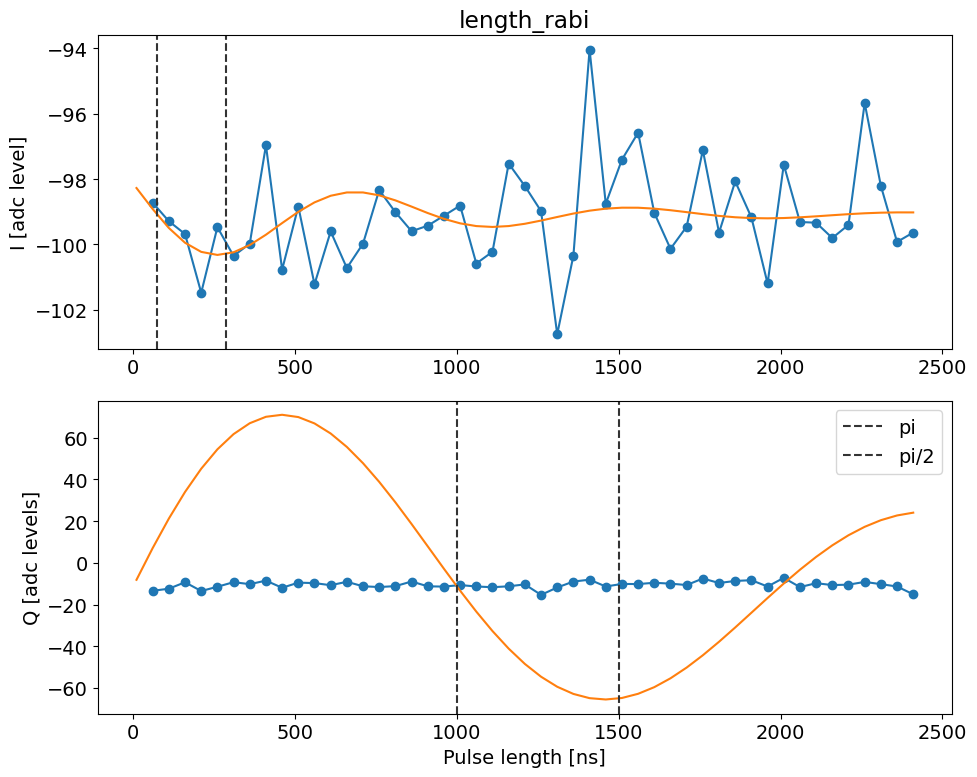

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-29_11-44-15_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-29.md
-94.03490909090908 -102.7504329004329


In [245]:
from multimode_expts.fit_display_classes import LengthRabiFitting
# Analyze the data
length_rabi_analysis = LengthRabiFitting(parity_delay_exp.data, config = parity_delay_exp.cfg)
length_rabi_analysis.analyze(fitparams = [100, 0.5, -500, None, None, None])
# length_rabi_analysis.analyze()
length_rabi_analysis.display(title_str='Length Rabi General F0g1')
print(np.max(parity_delay_exp.data['avgi']), np.min(parity_delay_exp.data['avgi']))

In [241]:
freq = length_rabi_analysis.data['fit_avgi'][1]
print('AC Stark frequency:', freq)
expts_base_inst.config_thisrun.device.manipulate.revival_stark_shift[0] = -freq

AC Stark frequency: 1.3008346758366192


### Now parity length after the AC stark shift is calibrated

In [250]:
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=0, photon_no=1)
parity_delay_exp = do_parity_delay(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    parity_fast=True,
    config_path=expts_base_inst.config_file,
    pre_sweep_pulse=pre_sweep_pulse,
    )

Prepulse: [['multiphoton', 'g0-e0', 'pi', 0], ['multiphoton', 'e0-f0', 'pi', 0], ['multiphoton', 'f0-g1', 'pi', 0]]


  0%|          | 0/50 [00:00<?, ?it/s]

pulse_data [[3580.3825840728755, 3428.2303438452373, 2011.6658682784348], [18554, 2759, 8000], [0, 0, 0.5358111825204673], [0, 0, 0], [2, 2, 0], ['gauss', 'gauss', 'flat_top'], [0.007, 0.035, 0.005]]
theta_2: 175.31699516698816 degrees
pulse_data [[3580.3825840728755, 3428.2303438452373, 2011.6658682784348], [18554, 2759, 8000], [0, 0, 0.5358111825204673], [0, 0, 0], [2, 2, 0], ['gauss', 'gauss', 'flat_top'], [0.007, 0.035, 0.005]]
theta_2: 151.90197100192904 degrees
pulse_data [[3580.3825840728755, 3428.2303438452373, 2011.6658682784348], [18554, 2759, 8000], [0, 0, 0.5358111825204673], [0, 0, 0], [2, 2, 0], ['gauss', 'gauss', 'flat_top'], [0.007, 0.035, 0.005]]
theta_2: 128.4869468368699 degrees
pulse_data [[3580.3825840728755, 3428.2303438452373, 2011.6658682784348], [18554, 2759, 8000], [0, 0, 0.5358111825204673], [0, 0, 0], [2, 2, 0], ['gauss', 'gauss', 'flat_top'], [0.007, 0.035, 0.005]]
theta_2: 105.07192267181073 degrees
pulse_data [[3580.3825840728755, 3428.2303438452373, 2011

Attempted to init fitparam 2 to -500, which is out of bounds -360 to 360. Instead init to 0.0
Attempted to init fitparam 4 to -35.15872073504727, which is out of bounds -10.38582683982684 to 15.853818181818182. Instead init to 2.7339956709956708
p1: 0.3015256043572273
p2: -86.28965180306878
Pi length: 1.6240527177605477
Pi/2 length: 0.7949357327106918
p1: 0.34494031899693495
p2: -113.97385003254509
Pi length: 1.642585678345173
Pi/2 length: 0.9178226215735423


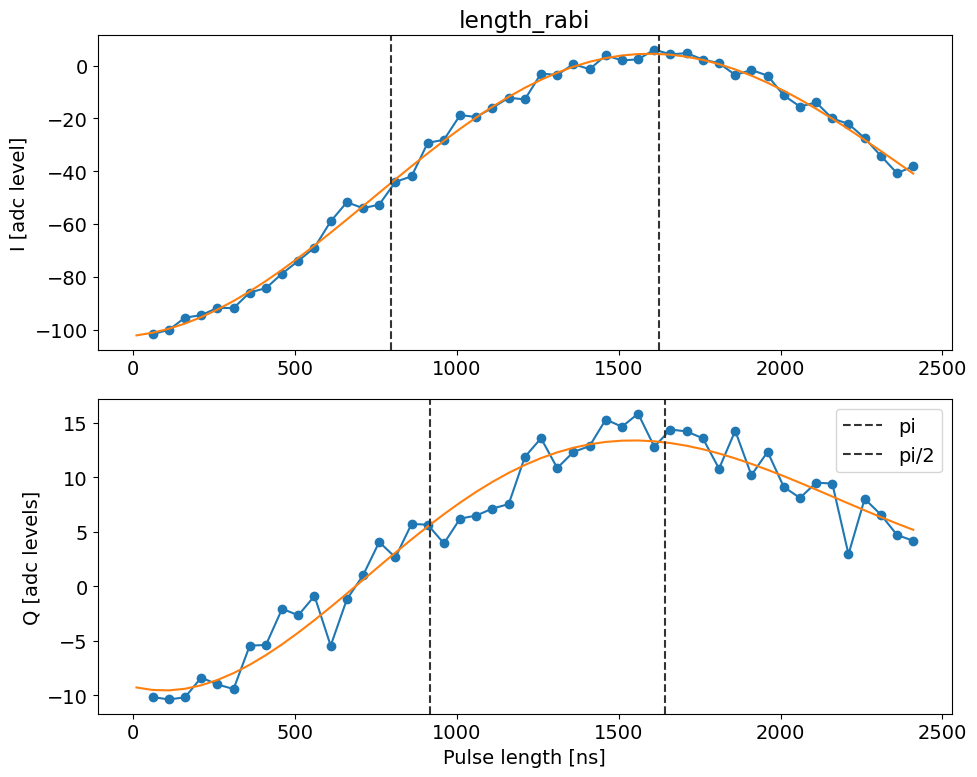

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-29_11-47-09_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-29.md
6.02135064935065 -101.6842857142857


In [251]:
from multimode_expts.fit_display_classes import LengthRabiFitting
# Analyze the data
length_rabi_analysis = LengthRabiFitting(parity_delay_exp.data, config = parity_delay_exp.cfg)
length_rabi_analysis.analyze(fitparams = [100, 0.5, -500, None, None, None])
# length_rabi_analysis.analyze()
length_rabi_analysis.display(title_str='Length Rabi General F0g1')
print(np.max(parity_delay_exp.data['avgi']), np.min(parity_delay_exp.data['avgi']))

In [252]:
## Assign to config 
print('revival time:', length_rabi_analysis.results['pi_length'])
expts_base_inst.config_thisrun.device.manipulate.revival_time[0] = length_rabi_analysis.results['pi_length']


revival time: 1.6240527177605477


## Manipulate Parity Spectroscopy

In [228]:
def do_parity_freq_experiment(
    start=4960,
    stop=5020,
    step=0.10,
    reps=500,
    rounds=1,
    qubit=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=20,
    manipulate_no=1,
    displace=(True, 0.1, 1000),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Frequency Experiment with configurable parameters.
    """
    
    expt_cfg = {
        'start': start,
        'stop': stop,
        'step': step,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubit,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'span': span,
        'manipulate': manipulate_no,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }
    # Example usage of relax_delay in experiment config:
    parity_freq_exp = expts_base_inst.meas.single_qubit.parity_freq.ParityFreqExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, 
        prefix='ParityFreqExperiment', config_file=expts_base_inst.config_file
    )
    parity_freq_exp.cfg = AttrDict(deepcopy(expts_base_inst.config_thisrun))
    parity_freq_exp.cfg.expt = expt_cfg
    parity_freq_exp.cfg.device.readout.relax_delay = [relax_delay]
    parity_freq_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_freq_exp


In [563]:
parity_freq_exp = do_parity_freq_experiment()

  0%|          | 0/600 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00016_ParityFreqExperiment.h5


Found peak in amps at [MHz] 4985.028775197992, HWHM 1.6711539154782773
Found peak in I at [MHz] 4985.058525893208, HWHM 1.7151612703152272
Found peak in Q at [MHz] 4976.302454143664, HWHM -1.3071762523986217


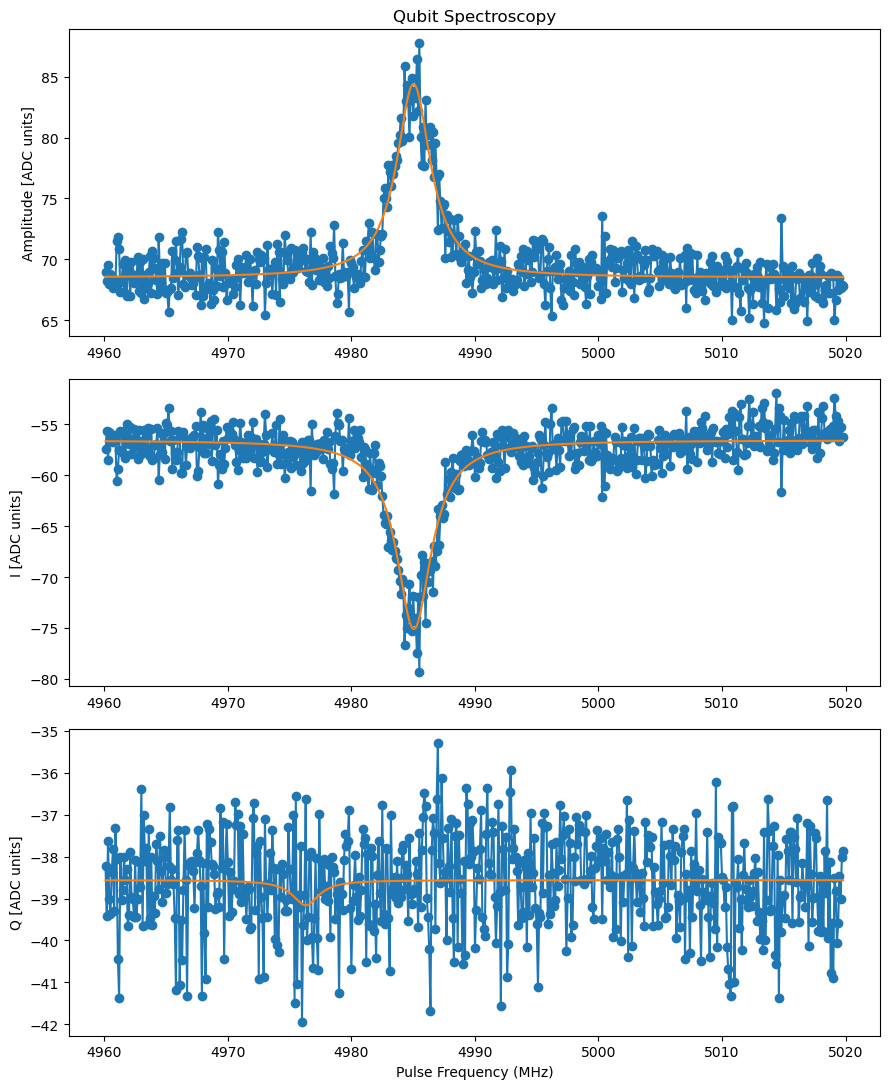

In [564]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(parity_freq_exp.data, config=parity_freq_exp.cfg)
spec.analyze()
spec.display()

In [565]:
spec.data['fit_avgi'][2]

4985.058525893208

In [566]:
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] = spec.data['fit_avgi'][2]

## Manipulate Ramsey (to finetune frequency)
- This will use displace pulse instead do qubit pi/2 to calibrate; we want fine calibration of manipulate frequency not some fast way of extracting T2 time or finding stark shift on f0g1 transition
- Make sure displacements are small $(\alpha \approx 0.2)$
- Somehow i don't get full contrast, like the lowst i,q value dont correspond to g 




In [1224]:
def do_cavity_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    prep_e_first = True,
    relax_delay=2500      # relax delay
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True, config_thisrun.device.manipulate.f_ge[man_mode_no-1], 10, 
                                config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 0,
                                  4]
        
    #[on/off, freq, gain, sigma (mus), phase, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = expts_base_inst.meas.single_qubit.t2_cavity.CavityRamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavityRamseyExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        prep_e_first=prep_e_first,  # prepare e first
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey



def do_cavity_ramsey_gain_sweep(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    gain_start = 1000,  # start gain
    gain_step = 1000,      # step size for gain
    gain_expts = 5,        # number of experiments for gain
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    relax_delay=2500,      # relax delay
    do_g_and_e=False, # do e-f first
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True, config_thisrun.device.manipulate.f_ge[man_mode_no-1], 1000, 
                                config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 0,
                                  4]
    #[on/off, freq, gain, sigma (mus), phase, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = expts_base_inst.meas.single_qubit.t2_cavity.CavityRamseyGainSweepExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavityRamseyGainSweepExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        gain_start=gain_start,          # start gain
        gain_step=gain_step,            # step size for gain
        gain_expts=gain_expts,          # number of experiments for gain
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        do_g_and_e=do_g_and_e,  # do e-f first
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey



In [ ]:
cavity_ramsey = do_cavity_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    man_mode_no=1, 
    # ramsey_freq=0.4,
    # step = 0.05, 
    # prepulse = [['qubit', 'ge', 'pi', 0]],
    # gate_based=True,
    ramsey_freq=1.6,
    step = 0.025, 
    expts = 150, 
    reps = 200,
    prep_e_first = False,
    user_defined_pulse=[True, expts_base_inst.config_thisrun.device.manipulate.f_ge[0], 1500, 
                                expts_base_inst.config_thisrun.device.manipulate.displace_sigma[0],
                                  0, 4])
    #user defined pulse [on/off, freq, gain, sigma (mus), phase, channel] )

None
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
None
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
prep e first
None
qubit_pulse (7, 1) (7, 0)
150


  0%|          | 0/30000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00094_CavityRamseyExperiment.h5


No echoes in the data
length 150 150
Attempted to init fitparam 4 to -39.745511976911985, which is out of bounds 0.11713203463203464 to 18.861893939393937. Instead init to 9.489512987012986
Using user defined frequency: 4984.479973902164 MHz
Current pi pulse frequency: 4984.479973902164
Fit frequency from I [MHz]: 1.591196717819584 +/- 0.004006859606199994
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.488777184344
 	4987.671170619983
T2 Ramsey from fit I [us]: 25.37467199376117
Fit frequency from Q [MHz]: 1.5815028931774113 +/- 0.016044769816347497
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.498471008987
 	4987.6614767953415
T2 Ramsey from fit Q [us]: 1.8917308970415454


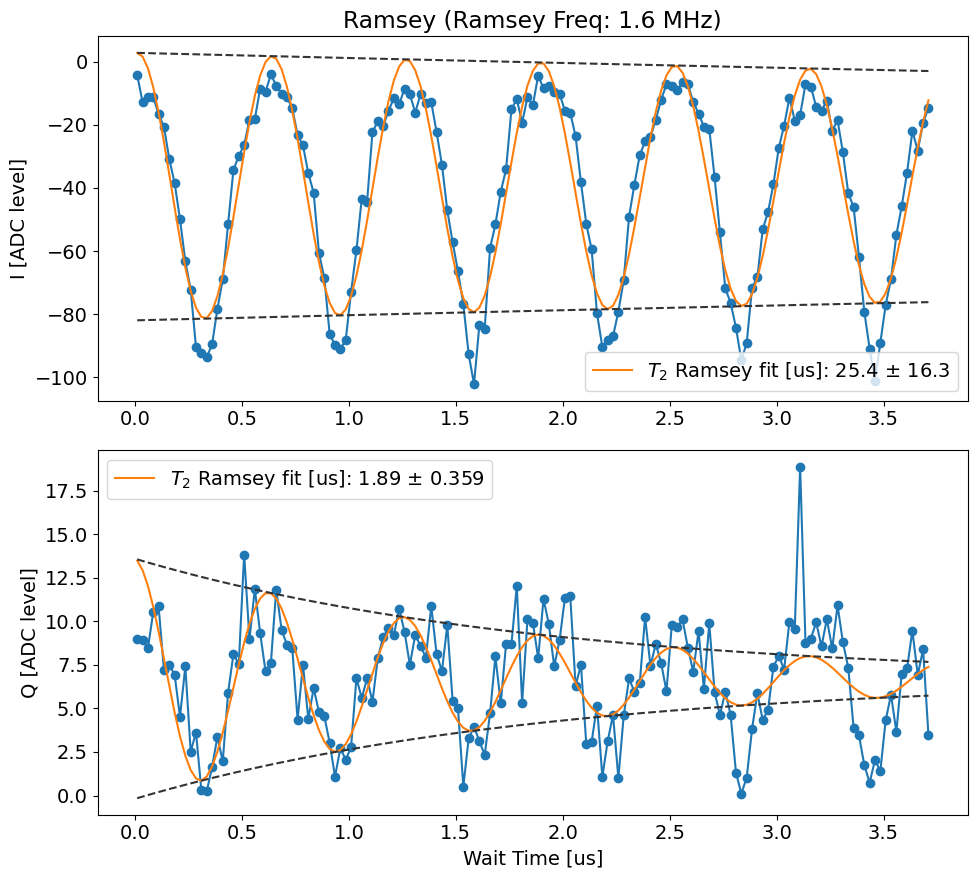

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-05_11-02-25_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-05.md


In [1232]:
cavity_ramsey.analyze()
cavity_ramsey.display()

In [48]:
adjusted_freq = cavity_ramsey.data['f_adjust_ramsey_avgi']
_delta_freq = adjusted_freq[np.argmin(np.abs(adjusted_freq))]
print(f"Adjusted frequency: {_delta_freq} MHz")
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] += _delta_freq
print(f"Updated f_ge frequency: {expts_base_inst.config_thisrun.device.manipulate.f_ge[0]} MHz")

Adjusted frequency: -0.26123724503177437 MHz
Updated f_ge frequency: 4984.779973902164 MHz


## Gain to Alpha Calibration

Will do tomography on the vaccum state 

$W_{\alpha} (|0\rangle\langle0|) = \frac{2}{\pi} e^{-2|\alpha|^2}$

In [63]:
def do_parity_gain_experiment(
    config_thisrun,
    expt_path,
    config_path,
    start=0,
    step=100,
    expts=40,
    reps=500,
    rounds=1,
    qubit=0,
    qubits=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=1000,
    singleshot_active_reset=False,
    singleshot_man_reset=True,
    singleshot_storage_reset=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    span=1000,
    prep_e=False,
    manipulate=1,
    displace=(True, 0.05),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500, 
    pulse_correction=False
):
    """
    Run the Parity Gain Experiment with configurable parameters.
    """
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubit': qubit,
        'qubits': qubits,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'singleshot_active_reset': singleshot_active_reset,
        'singleshot_man_reset': singleshot_man_reset,
        'singleshot_storage_reset': singleshot_storage_reset,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'span': span,
        'prep_e': prep_e,
        'manipulate': manipulate,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pulse_correction': pulse_correction
    }
    parity_gain_exp = expts_base_inst.meas.single_qubit.parity_gain.ParityGainExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityGainExperiment', config_file=config_path
    )
    parity_gain_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_gain_exp.cfg.expt = expt_cfg
    parity_gain_exp.cfg.device.readout.relax_delay = [relax_delay]
    
    parity_gain_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_gain_exp


In [64]:
parity_gain_expt = do_parity_gain_experiment(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    pulse_correction=True
)

Pulse correction is applied
[3]
1
theta_2 139.45532736613586
revival_time 1.6240527177605477
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton g0-e0 (7, 1) (7, 2)
Parity Gain Program initialized
parity pulse: [[3573.0032581219675, 3571.6994214615424, 3573.0032581219675], [8853, 0, 8853], [0, 1.6240527177605477, 0], [0, 0, 139.45532736613586], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.007, 0.0, 0.007]]
Played channel 2 sync_all_flag True
Played channel 2 sync_all_flag True
Played channel 2 sync_all_flag True
Updating gain register 100


  0%|          | 0/20000 [00:00<?, ?it/s]

[3]
1
theta_2 319.45532736613586
revival_time 1.6240527177605477
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton g0-e0 (7, 1) (7, 2)
Parity Gain Program initialized
parity pulse: [[3573.0032581219675, 3571.6994214615424, 3573.0032581219675], [8853, 0, 8853], [0, 1.6240527177605477, 0], [0, 0, 319.45532736613586], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.007, 0.0, 0.007]]
Played channel 2 sync_all_flag True
Played channel 2 sync_all_flag True
Played channel 2 sync_all_flag True
Updating gain register 100


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00109_ParityGainExperiment.h5


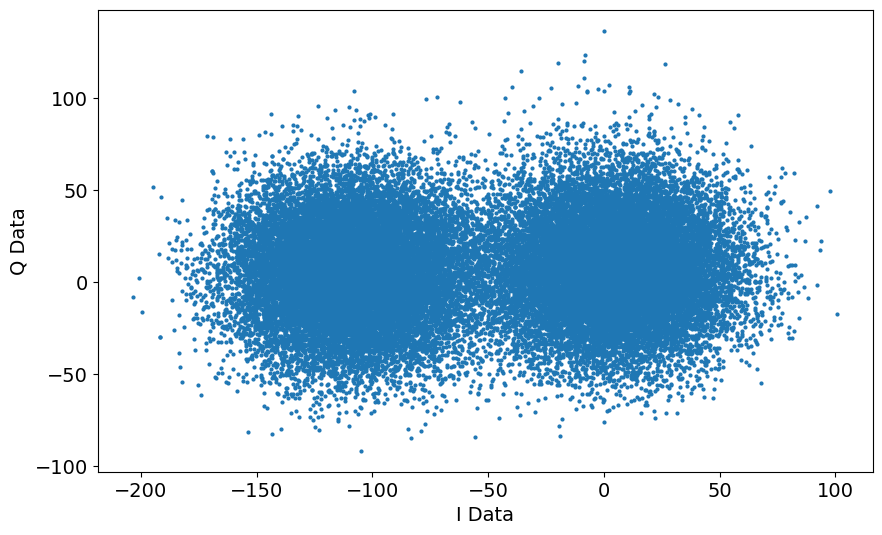

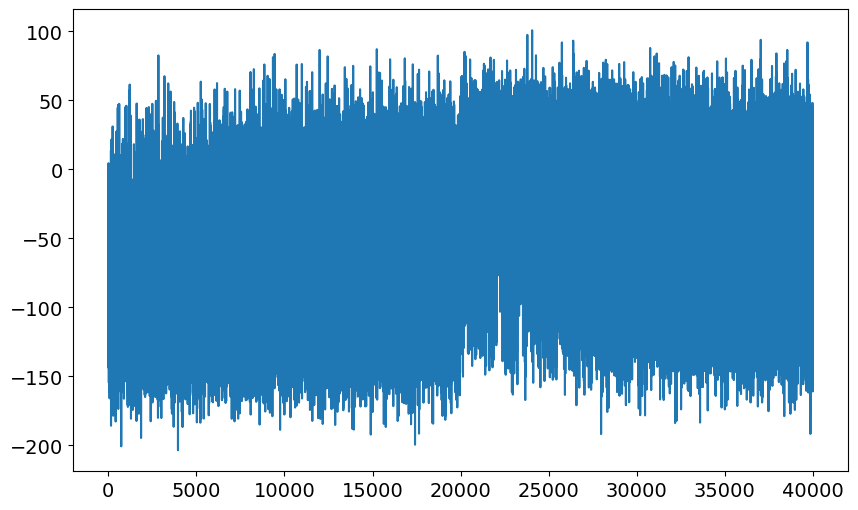

In [65]:
i_data = parity_gain_expt.data['idata']
q_data = parity_gain_expt.data['qdata']

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(i_data, q_data, 'o', markersize=2)
ax.set_xlabel('I Data')
ax.set_ylabel('Q Data')
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))
ax2.plot(i_data)


(500, 40)
(500, 40)
Gain to Alpha Conversion Factor: 0.00022039635221767517


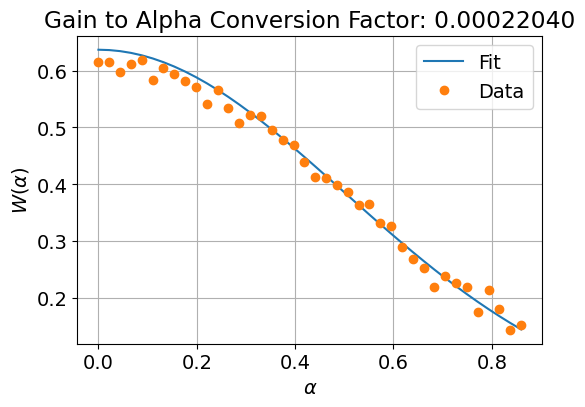

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-22_11-43-03_Gain_to_Alpha_Conversion_Factor_0.00022040.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-22.md
alpha = 1 requires gain of : 4537.28017700


{'xpts': array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
        3300, 3400, 3500, 3600, 3700, 3800, 3900,    0,  100,  200,  300,
         400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400,
        1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500,
        2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600,
        3700, 3800, 3900]),
 'avgi': array([-1.04850182e+02, -1.01566203e+02, -1.03034615e+02, -1.03371463e+02,
        -1.02881602e+02, -1.02559165e+02, -1.02191684e+02, -1.01606087e+02,
        -1.01579701e+02, -9.90557922e+01, -9.84867100e+01, -1.02623957e+02,
        -9.41999827e+01, -9.52369307e+01, -9.56775411e+01, -9.51873766e+01,
        -9.42221688e+01, -9.09669524e+01, -8.88884675e+01, -8.82333247e+01,
        -8.92879091e+01, -8.72420693e+01, -8.56917749e+01,

In [66]:
parity_gain_expt.analyze()

In [67]:
#update device
gain_to_alpha = parity_gain_expt.data['gain_to_alpha']
print(f'Gain to alpha: {gain_to_alpha}')
expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0] = gain_to_alpha

Gain to alpha: 0.00022039635221767517


## Cavity Ramsey versus gain 

This this to find out $\chi$, $\chi'$, $\Delta$ and $K_c$

In [897]:
gain_start = 2000
gain_stop = 10000
gain_step = 600
gain_expts = int((gain_stop - gain_start) / gain_step) + 1
print(f'Gain start: {gain_start}, Gain stop: {gain_stop}, Gain step: {gain_step}, Gain expts: {gain_expts}')

Gain start: 2000, Gain stop: 10000, Gain step: 600, Gain expts: 14


In [898]:
cavity_ramsey_sweep = do_cavity_ramsey_gain_sweep(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    gain_start=gain_start,  # start gain
    gain_step=gain_step,      # step size for gain
    gain_expts=gain_expts,        # number of experiments for gain
    ramsey_freq=1.6,
    step = 0.025, 
    expts = 150, 
    reps = 300,
    do_g_and_e=True,
    
    )

  0%|          | 0/14 [00:00<?, ?it/s]

qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 0)
qubit_pulse (7, 1) (7, 2)
qubit_pulse 

gain_to_alpha 0.00064149413531407


c:\Users\26049\.conda\envs\slab\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\26049\.conda\envs\slab\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\26049\.conda\envs\slab\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: list index out of range

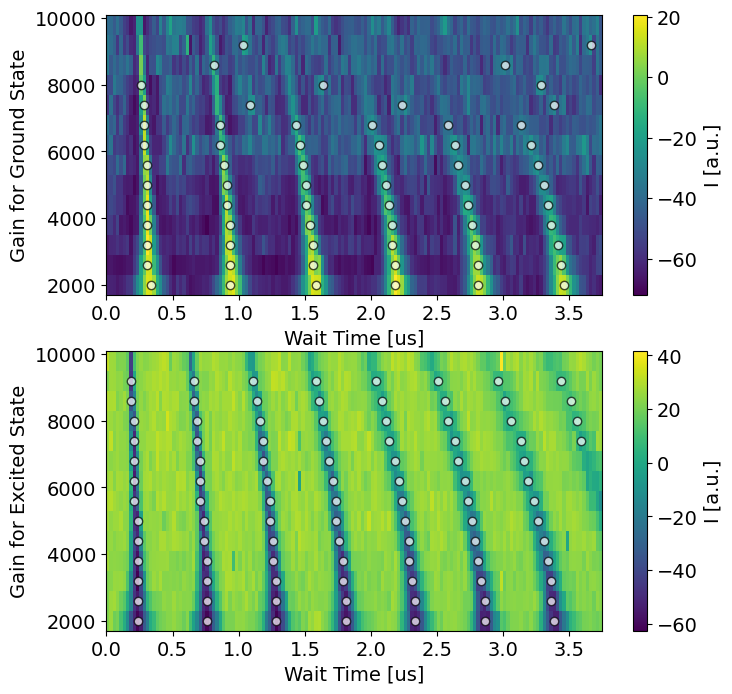

In [899]:
cavity_ramsey_sweep.analyze()
cavity_ramsey_sweep.display(save_fig=True)

In [842]:
delta_g = cavity_ramsey_sweep.data['detunning_g']

expts_base_inst.config_thisrun.device.manipulate.f_ge[0] -= delta_g
print(f"Updated f_ge frequency: {expts_base_inst.config_thisrun.device.manipulate.f_ge[0]} MHz")

Updated f_ge frequency: 4984.787351321603 MHz


Delta G: 0.27971978659968144 MHz


## Cavity T1

This is to find out $\kappa$

In [912]:
def do_t1_manipulate(config_thisrun,
                    expt_path,
                    config_path,
                    man_mode_no=1,
                    f0g1_param=None,
                    start = 0, 
                    step = 8,
                    expts = 120,
                    reps = 500,
                    rounds=1, 
                          ):
    """
    Run T1 experiment for the specified manipulate mode (man_mode_no).
    """
    t1_man = expts_base_inst.meas.single_qubit.t1_cavity.T1CavityExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='T1CavityExperiment', config_file=config_path
    )

    t1_man.cfg = AttrDict(deepcopy(config_thisrun))

    if f0g1_param is None:
        pulse_param = expts_base_inst.config_thisrun.device.multiphoton.pi['fn-gn+1']
        f0g1_param = [pulse_param['frequency'][0],
                       pulse_param['gain'][0],
                         pulse_param['length'][0], 
                         pulse_param['sigma'][0],
        ]   


    # Set experiment parameters for the specified manipulate mode
    t1_man.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps= reps,
        rounds= rounds,
        cavity_prepulse=[False, 300, 1.5],
        f0g1_prep=True,
        f0g1_param= f0g1_param,  # Use the f0g1_param defined above
        resolved_pi=False,
        cavity=man_mode_no,
        qubit=0,
        normalize=False
    )

    # t1_man.cfg.device.readout.relax_delay = [2500]
    t1_man.go(analyze=True, display=True, progress=True, save=True)
    return t1_man



This experiment is very broken and needs an update
Using user defined pi-gain and f0g1 parameters


  0%|          | 0/60000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00004_T1CavityExperiment.h5
Fit T1 avgi [us]: 190.57838661197488
Fit T1 avgq [us]: 182.48109616049922


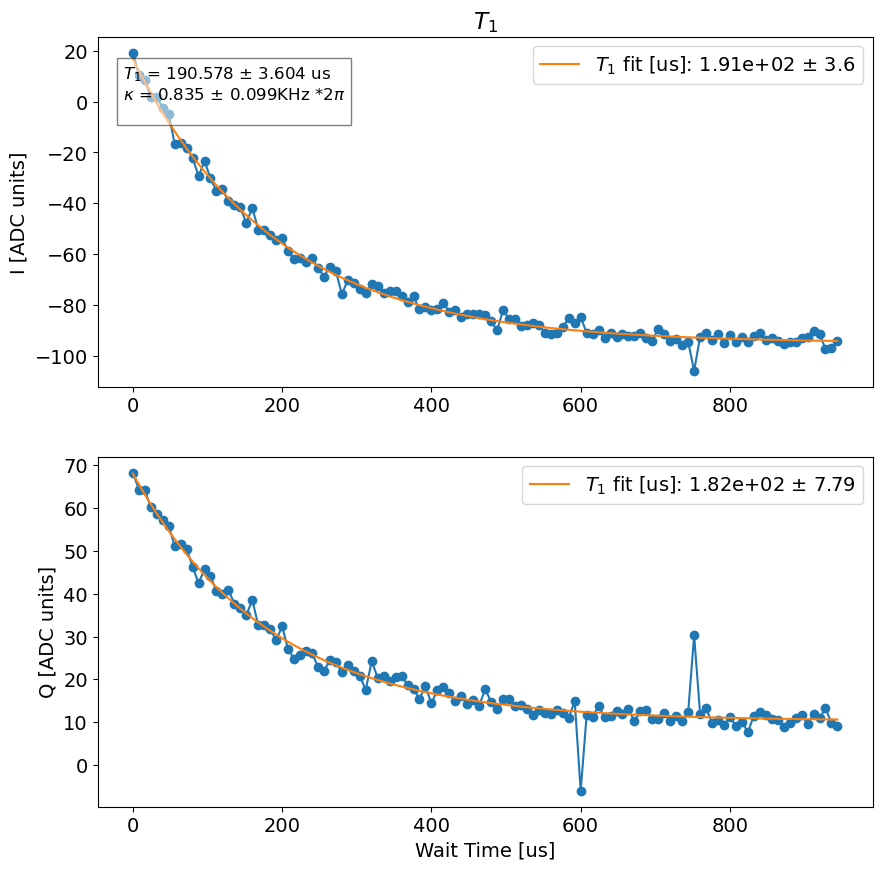

In [913]:
t1_manipulate = do_t1_manipulate(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
)
    

# Wigner Tomography

## Generate Optimal Displacements 

In [21]:
expts_base_inst.path

'H:\\Shared drives\\SLab\\Multimode\\experiment\\250505_craqm'

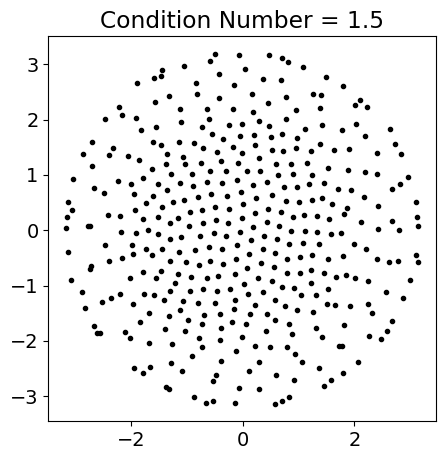

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Displacements saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\optimized_displacements_63.npy


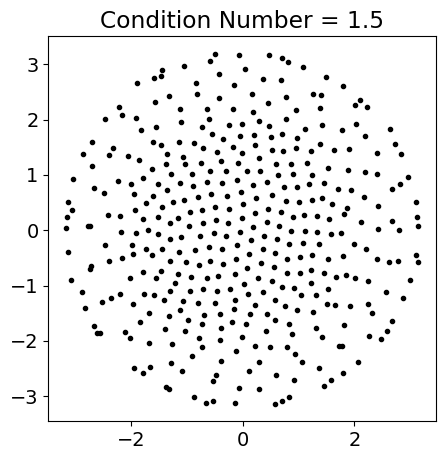

In [122]:
from fitting_folder.wigner import OptimalDisplacementGeneration
# Number of photons 
n_photon = 13
opt_alphas = OptimalDisplacementGeneration(FD = n_photon)
return_dict = opt_alphas.optimize(save_dir = expts_base_inst.expt_path )


In [23]:
# Get frunc from |2>
def do_wigner_tomography_1mode(
    config_thisrun,
    expt_path,
    config_path,
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    gate_based=True,
    pulse_correction=False,
    relax_delay=2500,
    post_select_pre_pulse=False,
    opt_pulse=None,
    IQ_table=None,
):
    """
    Run the Wigner Tomography 1 Mode Experiment with configurable parameters.
    """
    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits,
        'pulse_correction': pulse_correction,
        'post_select_pre_pulse': post_select_pre_pulse,
        'opt_pulse': opt_pulse, 
        'IQ_table': IQ_table,
    }




    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomography1ModeExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomography1ModeExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.expt.gate_based = gate_based  # Set gate_based to False for Wigner tomography
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    # wigner_exp.cfg.device.readout.phase = 90.0  # Set readout phase to 0.0

    wigner_exp.go(analyze=False, display=False, progress=True, save=True)
    return wigner_exp

print(expts_base_inst)
# print(wigner_exp)


def do_wigner_tomography_1mode_optimal(
    config_thisrun,
    expt_path,
    config_path,
    pulse_to_test,
    nb_plot = 3, 
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    gate_based=True,
    pulse_correction=False,
    relax_delay=2500,
    post_select_pre_pulse=False,
    opt_pulse=None,
    IQ_table=None,
):
    

    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits,
        'pulse_correction': pulse_correction,
        'post_select_pre_pulse': post_select_pre_pulse,
        'opt_pulse': opt_pulse, 
        'IQ_table': IQ_table,
        'pulse_to_test': pulse_to_test,  # Add pulse_to_test to the configuration   
        'nb_plot': nb_plot,  # Number of plots to generate
    }

    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomographyOptimalPulseExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomographyOptimalPulseExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.expt.gate_based = gate_based
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    # wigner_exp.cfg.device.readout.phase = 90.0  # Set readout phase to 0.0

    wigner_exp.go(analyze=False, display=False, progress=True, save=False)
    return wigner_exp
        

## Wigner Tomography

In [276]:
# prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=4, hpi= True)
# prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=0, hpi= True)
photon_list = [0,1]
prep_man_pi = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=photon_list,broadband=True)
pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()
# post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
# post_pulse
prep_man_pi

multiphoton g0-e0 (7, 1) (7, 0)
multiphoton e0-f0 (7, 1) (7, 1)
man M1


[['multiphoton', 'g0-e0', 'hpi', 0],
 ['multiphoton', 'e0-f0', 'pi', 0],
 ['multiphoton', 'f0-g1', 'pi', 0]]

In [123]:
# # prepulse = [['optimal_control', 'test', '1', [0, 0]]]
prepulse = [
            # ['qubit', 'ge', 'hpi', 0],
            ['optimal_control', 'test', '2', [0, 0]], 
#             # ['optimal_control', 'test', '2', [0, 0]],
            ]
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][1]= gain_cav
# # gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[1])
# # print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
# # expts_base_inst.config_thisrun.device.optimal_control[prepulse[1][1]][prepulse[1][2]]['gain'][0]= gain_qb
# # expts_base_inst.config_thisrun.device.optimal_control[prepulse[1][1]][prepulse[1][2]]['gain'][1]= gain_cav
pulse = mm_base_calib.get_prepulse_creator(prepulse, cfg=expts_base_inst.config_thisrun).pulse.tolist()
# print(f'Prepulse: {pulse}')

Optimal pulse file loaded: H:\Shared drives\SLab\Multimode\optimal_control\test_pi.npz
Max q: 6.258641043394102
Max c: 19.2745391826289
Gain for qubit: 844, Gain for cavity: 7714
careful I am assing channel idx to 4 until I fix it
pulse (7, 1) (7, 1)


In [129]:
wigner = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'], #optimal displacement path
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based = False,
    pulse_correction=True,
    relax_delay=2500, 
    post_select_pre_pulse=False,
)

Pulse correction is applied


  0%|          | 0/399 [00:00<?, ?it/s]

theta_2 139.45532736613586
revival_time 1.6240527177605477
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton g0-e0 (7, 1) (7, 2)
Using custom pulse for pre-sweep pulse
[[3571.6994214615424, 4984.779973902164], [844, 7714], [0, 0], [0.0, 0.0], [2, 3], [['opt_cont', 'test', '2'], ['opt_cont', 'test', '2']], [0, 0]]
theta_2 319.45532736613586
revival_time 1.6240527177605477
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton g0-e0 (7, 1) (7, 2)
Using custom pulse for pre-sweep pulse
[[3571.6994214615424, 4984.779973902164], [844, 7714], [0, 0], [0.0, 0.0], [2, 3], [['opt_cont', 'test', '2'], ['opt_cont', 'test', '2']], [0, 0]]
theta_2 139.45532736613586
revival_time 1.6240527177605477
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton g0-e0 (7, 1) (7, 2)
Using custom pulse for pre-sweep pulse
[[3571.6994214615424, 4984.779973902164], [844, 7714], [0, 0], [0.0, 0.0], [2, 3], [['opt_cont', 'test', '2'], ['opt_cont', 'test', '2']], [0, 0]]
theta_2 319.45532736613586
revival_time 1.6240527177605477
multiphoton g0

In [130]:
wigner.analyze()

(200, 399)
(200, 399)


{'alpha': array([ 0.00000000e+00+0.j        , -5.94559772e-02-0.02486513j,
         2.95173089e-01-2.87388225j, -1.51799372e-01-1.41579947j,
        -8.28347784e-01+2.46141901j,  1.31397688e+00-1.76615209j,
        -2.41692073e+00+0.27309654j, -1.05639241e+00+0.54211226j,
        -7.15987069e-01-1.06982999j, -2.00495479e+00+0.84341015j,
        -1.15208399e+00-0.39674579j,  3.81486721e-01-0.09800311j,
        -1.83043436e+00+1.80655451j, -1.32249664e+00+2.43395903j,
         7.74389239e-01+2.01571151j, -1.41690124e+00-1.25491844j,
         4.54844708e-01+0.39061018j,  7.94888641e-01-0.51298518j,
        -2.32465175e+00+1.4819632j ,  8.26461242e-01-3.0211061j ,
        -1.44667007e+00-0.34124301j, -5.31951100e-01-2.72067437j,
        -2.46830108e+00-0.26887085j,  3.14308032e+00-0.58014447j,
        -1.52757056e+00-0.06106991j, -1.30575769e-02+1.91763912j,
        -7.28566907e-01-2.10346168j,  1.45028239e+00-2.82331274j,
         2.25186215e+00-1.33896106j, -8.95893763e-01+0.80121958j,
 

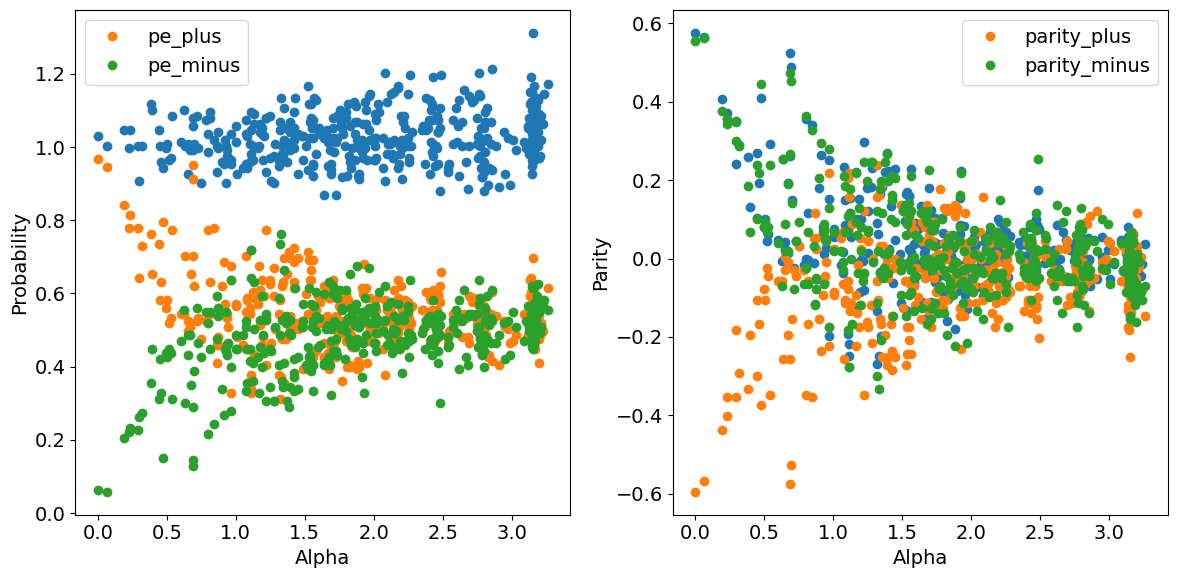

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

pe_plus = wigner.data['pe_plus']
pe_minus = wigner.data['pe_minus']
pe = pe_plus + pe_minus
ax[0].plot(np.abs(wigner.data['alpha']), pe, 'o')
ax[0].plot(np.abs(wigner.data['alpha']), pe_plus, 'o', label='pe_plus')
ax[0].plot(np.abs(wigner.data['alpha']), pe_minus, 'o', label='pe_minus')

parity_plus = wigner.data['parity_plus']
parity_minus = wigner.data['parity_minus']
parity = wigner.data['parity']
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity, 'o')
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity_plus, 'o', label='parity_plus')
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity_minus, 'o', label='parity_minus')

ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Probability')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Parity')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

In [132]:
# get GKP states
def get_hex_GKP(Delta,d,N):
    psi_list = [0*qt.basis(N,0) for _ in range(d)]
    e1 = np.sqrt(2*np.pi/d/np.sqrt(3))*(np.sqrt(3)/2-0.5j)
    e2 = np.sqrt(2*np.pi/d/np.sqrt(3))*1j
    for n1 in range(-30,31):
        for n2 in range(-30,31):
            for mu in range(d):
                a1 = e1*(d*n1+mu)
                a2 = e2*n2
                psi_list[mu] += np.exp((a1*np.conj(a2)-np.conj(a1)*a2)/2)*qt.coherent(N,a1+a2,method='analytic')

    psis = [((-Delta**2*qt.num(N)).expm()*psi).unit() for psi in psi_list]
    return psis[0]

In [133]:
get_hex_GKP(0.2,2,wigner_analysis.m)

Quantum object: dims = [[12], [1]], shape = (12, 1), type = ket
Qobj data =
[[ 0.49460792]
 [ 0.        ]
 [-0.38428602]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.74795928]
 [ 0.        ]
 [-0.21964557]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

Keys in data: dict_keys(['alpha', 'avgi', 'avgq', 'amps', 'phases', 'i0', 'q0', 'pe_plus', 'pe_minus', 'parity_plus', 'parity_minus', 'parity'])
Alpha data: [ 0.00000000e+00+0.j         -5.94559772e-02-0.02486513j
  2.95173089e-01-2.87388225j -1.51799372e-01-1.41579947j
 -8.28347784e-01+2.46141901j  1.31397688e+00-1.76615209j
 -2.41692073e+00+0.27309654j -1.05639241e+00+0.54211226j
 -7.15987069e-01-1.06982999j -2.00495479e+00+0.84341015j
 -1.15208399e+00-0.39674579j  3.81486721e-01-0.09800311j
 -1.83043436e+00+1.80655451j -1.32249664e+00+2.43395903j
  7.74389239e-01+2.01571151j -1.41690124e+00-1.25491844j
  4.54844708e-01+0.39061018j  7.94888641e-01-0.51298518j
 -2.32465175e+00+1.4819632j   8.26461242e-01-3.0211061j
 -1.44667007e+00-0.34124301j -5.31951100e-01-2.72067437j
 -2.46830108e+00-0.26887085j  3.14308032e+00-0.58014447j
 -1.52757056e+00-0.06106991j -1.30575769e-02+1.91763912j
 -7.28566907e-01-2.10346168j  1.45028239e+00-2.82331274j
  2.25186215e+00-1.33896106j -8.95893763e-01+0

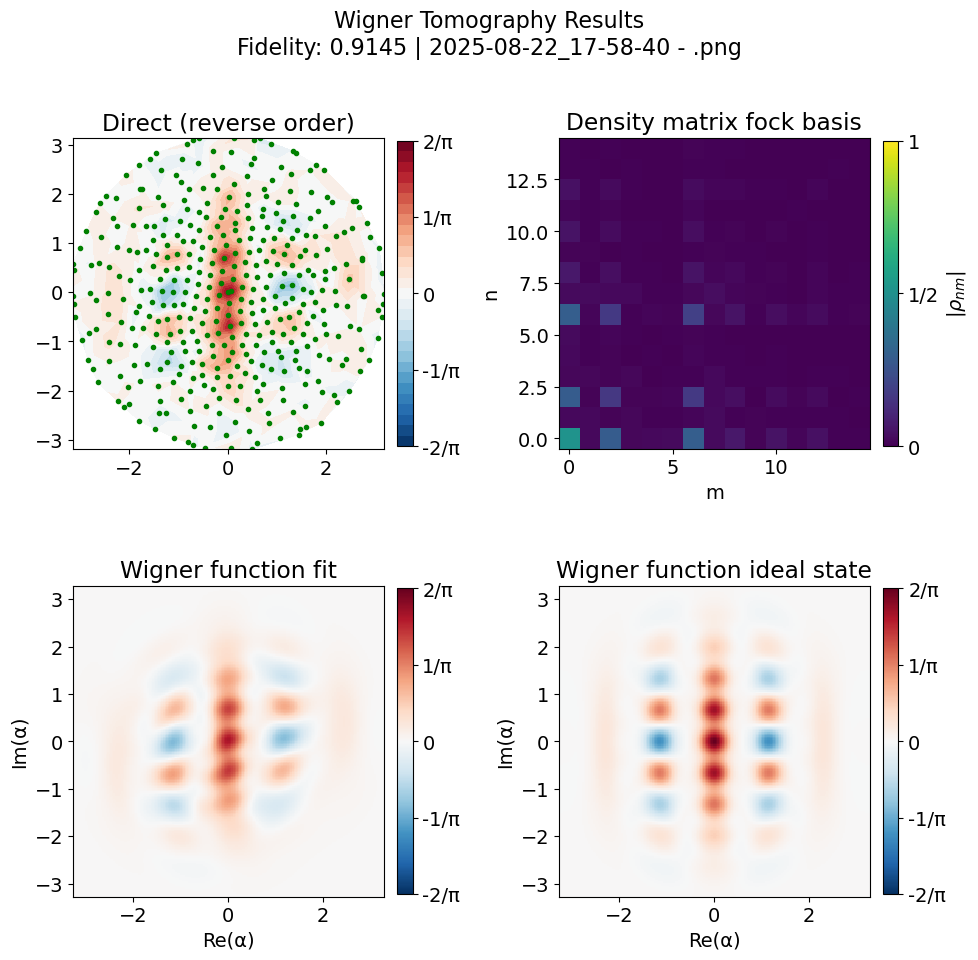

In [136]:
from fitting_folder.wigner import WignerAnalysis
wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg, mode_state_num=15, alphas = wigner.data['alpha'])
import qutip as qt
state_list = qt.zero_ket(wigner_analysis.m)  # Initialize the state list with the zero state |0>
# for i in photon_list:
#     state_list += qt.fock(wigner_analysis.m, i)  # Add states |1>, |2>, ..., |n_photon>
# initial_state = state_list.unit()  # Normalize the state
initial_state = get_hex_GKP(0.408,2,wigner_analysis.m)


# Dp = qt.displace(wigner_analysis.m, 1.2)  # Displacement operator with displacement parameter 1
# Dm = qt.displace(wigner_analysis.m, -1.2)  # Displacement operator with displacement parameter 1
# initial_state = ((Dp+Dm)*qt.fock(wigner_analysis.m, 0)).unit()  # Displaced vacuum state |0> with displacement parameter 1



results = wigner_analysis.wigner_analysis_results(wigner.data['parity'], initial_state=initial_state, rotate=False)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '')

## Try optimal control

In [50]:
# pulse_to_test = [['optimal_control', 'test', '2', [0, 0]]]
pulse_to_test = [['optimal_control', 'fock', '1', [0, 0]]]
pulse_conf = expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]

# set gain 
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(pulse_to_test[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][1]= gain_cav





Optimal pulse file loaded: H:\Shared drives\SLab\Multimode\optimal_control\pulse_fock_1.npz
Max q: 4.9805183643727355
Max c: 10.882796910736669
Gain for qubit: 671, Gain for cavity: 4490


In [53]:
wigner = do_wigner_tomography_1mode_optimal(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    pulse_to_test=pulse_to_test,
    nb_plot=1,
    displace_length=0.05,
    reps = 100,
    displacement_path=return_dict['path'], #optimal displacement path
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based = False,
    pulse_correction=True,
    relax_delay=2500, 
    post_select_pre_pulse=True,
)

AttributeError: 'AttrDict' object has no attribute 'phase_second_pulse'

In [49]:
# prepulse = [['optimal_control', 'test', '2', [0, 0]]]
# gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[0])
# print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][0]= gain_qb
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][1]= gain_cav
# prepulse = mm_base_calib.get_prepulse_creator(prepulse, cfg=expts_base_inst.config_thisrun).pulse.tolist()


pulse_to_test = [['optimal_control', 'fock', '1', [0, 0]]]
pulse_conf = expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]

# set gain 
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(pulse_to_test[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][0]= 20000
# expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][1]= 20000
# expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][1]= gain_cav



# import the I, Q, times 
filename = expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['filename']
data = np.load(filename, allow_pickle=True)
times = data['times'] * 1e-3
Ic = data['I_c']
Qc = -data['Q_c']
Iq = data['I_q']
Qq = -data['Q_q']
qb_scale = max((np.max(np.abs(Iq)), np.max(np.abs(Qq))))
cav_scale = max((np.max(np.abs(Ic)), np.max(np.abs(Qc))))

if qb_scale !=0: 
    Iq /= qb_scale
    Qq /= qb_scale

if cav_scale !=0: 
    Ic /= cav_scale
    Qc /= cav_scale

t_length = len(times)
nb_plot = 1
t_step = (times[-1] - times[0]) / nb_plot
# t_to_plot = np.arange(0, times[-1]+t_step, t_step)
t_to_plot = np.array([times[-1]])
# t_to_plot[0] +=0.05

data_tot = []
data.close()


Optimal pulse file loaded: H:\Shared drives\SLab\Multimode\optimal_control\pulse_fock_1.npz
Max q: 4.9805183643727355
Max c: 10.882796910736669
Gain for qubit: 671, Gain for cavity: 1496


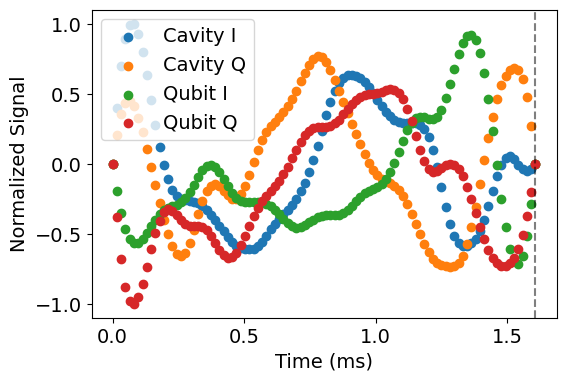

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(times, Ic, label='Cavity I')
ax.scatter(times, Qc, label='Cavity Q')
ax.scatter(times, Iq, label='Qubit I')
ax.scatter(times, Qq, label='Qubit Q')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Normalized Signal')
ax.legend()
# add vertical lines at t_to_plot
for t in t_to_plot:
    ax.axvline(t, color='k', linestyle='--', alpha=0.5)

In [56]:
for i in range(len(t_to_plot)):

    idx_t = np.argmin(np.abs(times - t_to_plot[i]))
    IQ_table = {
        'I_c': Ic[:idx_t],
        'Q_c': Qc[:idx_t],
        'I_q': Iq[:idx_t],
        'Q_q': Qq[:idx_t],
        'times': times[:idx_t]
    }

    wigner = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 250000,
    displacement_path=return_dict['path'], #optimal displacement path
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based = False,
    pulse_correction=True,
    relax_delay=2500, 
    post_select_pre_pulse=False,
    IQ_table=IQ_table,
    opt_pulse=pulse_to_test
    )

    wigner.analyze()
    wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg,
                                      mode_state_num=10, alphas = wigner.data['alpha'])
    results = wigner_analysis.wigner_analysis_results(wigner.data['parity'],
                                                       initial_state=qt.fock(wigner_analysis.m, 0), rotate=False)
    fig = wigner_analysis.plot_wigner_reconstruction_results(results, 
                                                             initial_state=qt.fock(wigner_analysis.m, 0), state_label = '')


    rho = results['rho']
    wigner.data['rho'] = rho
    data_tot.append(wigner.data)

Pulse correction is applied


  0%|          | 0/201 [00:00<?, ?it/s]

theta_2 139.45532736613586
revival_time 1.6240527177605477
multiphoton g0-e0 (7, 1) (7, 0)
multiphoton g0-e0 (7, 1) (7, 2)
careful I am assing channel idx to 4 until I fix it
pulse (7, 1) (7, 1)
pulse_param [[3571.6994214615424 4984.779973902164]
 [20000 20000]
 [0 0]
 [0.0 0.0]
 [2 3]
 [list(['opt_cont', 'fock', '1']) list(['opt_cont', 'fock', '1'])]
 [0 0]]
2 3
qb_channel 2
cav_channel 3
pulse_conf [['optimal_control', 'fock', '1', [0, 0]]]
waveform_cav fock_1_man
waveform_qb fock_1_qb
careful I am assing channel idx to 4 until I fix it
pulse (7, 1) (7, 1)
Played channel 2 sync_all_flag False
Played channel 3 sync_all_flag True
Played channel 2 sync_all_flag True
Played channel 2 sync_all_flag True
Played channel 2 sync_all_flag True


KeyboardInterrupt: 

C:\Users\26049\AppData\Local\Temp\ipykernel_16600\315593476.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  n_distr[i, :] = _n_distr


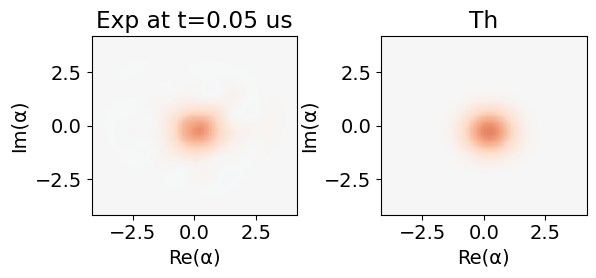

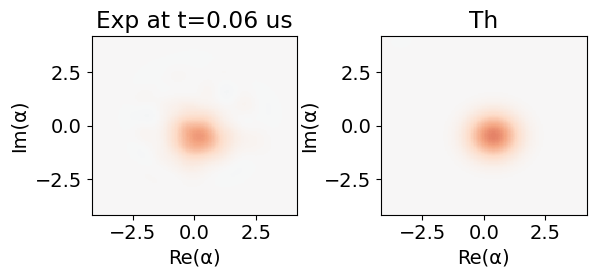

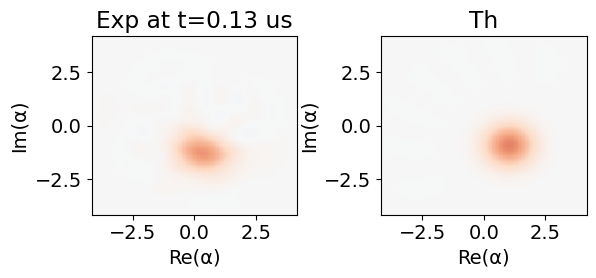

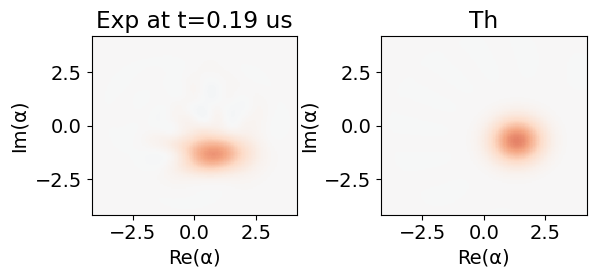

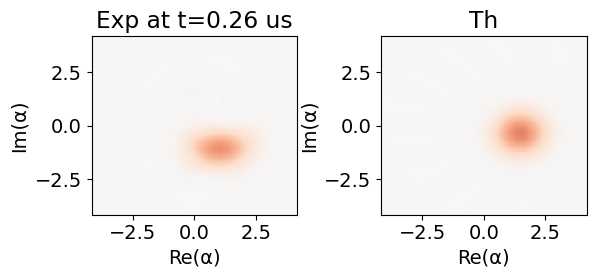

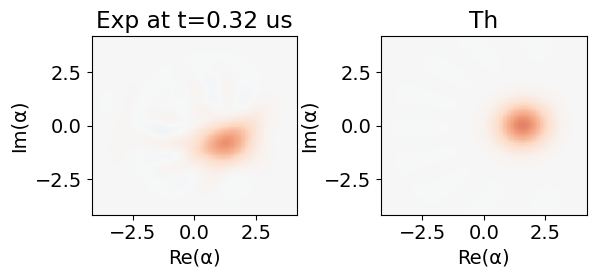

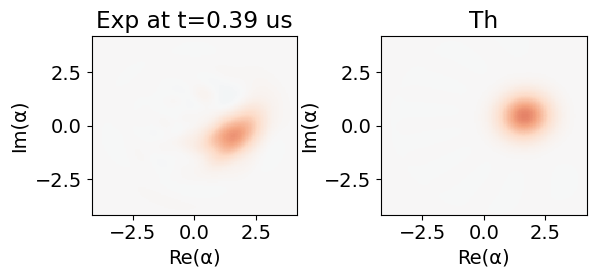

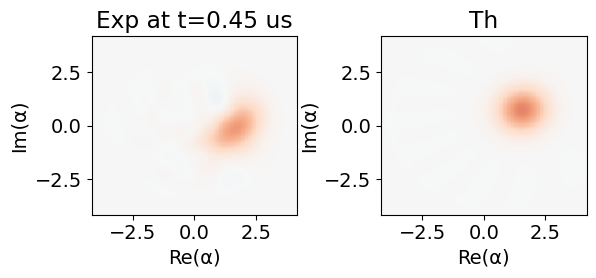

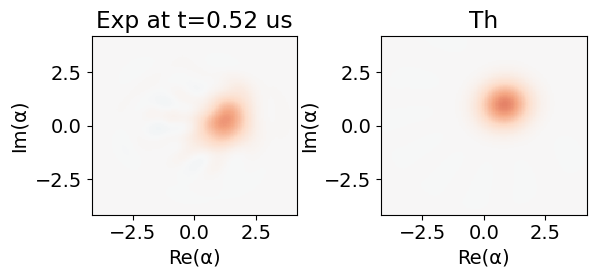

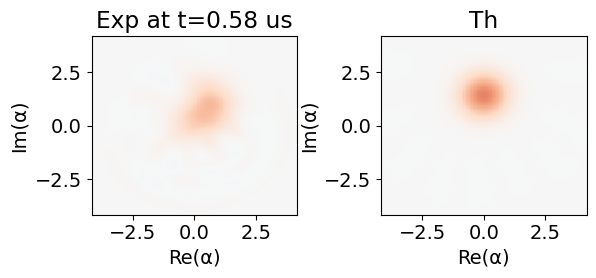

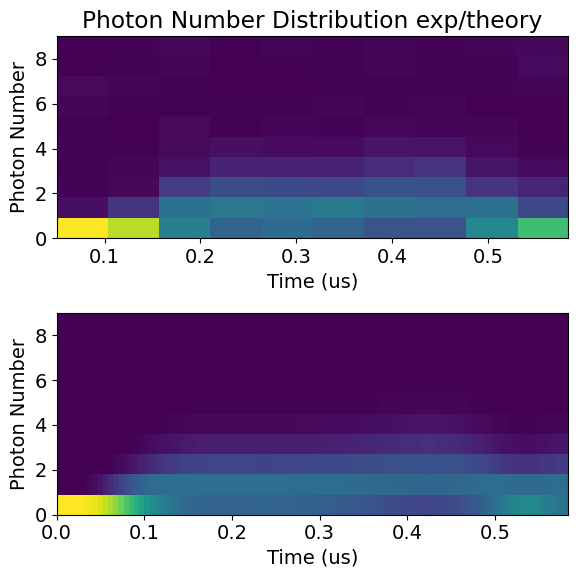

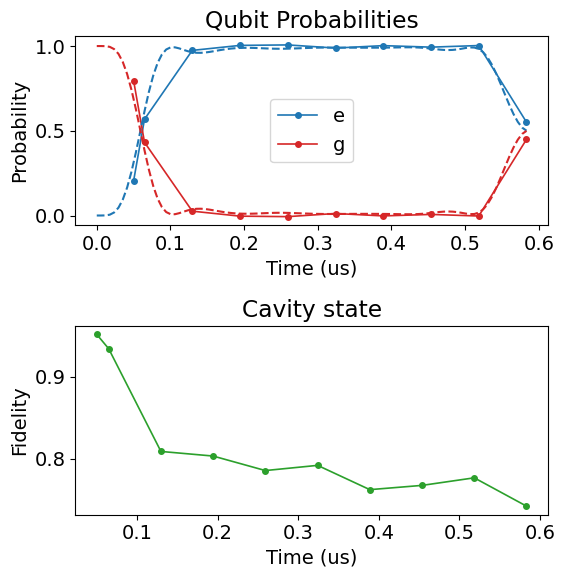

In [27]:
plot_wigner = True
n_distr = np.zeros((len(data_tot), wigner_analysis.m))
p_vec =np.zeros((len(data_tot), 2))
# for each time slice use the rho to compute the photon number distribution
for i in range(len(data_tot)):
    _n_distr = np.diag(data_tot[i]['rho'])
    n_distr[i, :] = _n_distr
    p_vec[i, 1] = data_tot[i]['pe_postpulse']
    p_vec[i, 0] = 1 - p_vec[i, 1]



# open simulation data
if 'pulse' in filename:
    filename_th = filename.replace('pulse', 'pop_sim\populations')
else:
    filename_th = filename.replace('optimal_control\\', 'optimal_control\\pop_sim\\populations_')
data_th = np.load(filename_th, allow_pickle=True)
n_distr_th = data_th['cavity']
p_vec_th = data_th['qubit'][1, :]
times_th = data_th['times'] * 1e-3
rho_cav_t = data_th['rho_cav_t']

F_vec = np.zeros(len(data_tot))

for i in range(len(data_tot)):
    rho_exp = qt.Qobj(data_tot[i]['rho'])
    cutoff_exp = rho_exp.shape[0]
    cutoff_th = rho_cav_t.shape[1]
    cutoff = min(cutoff_exp, cutoff_th)
    idx_t = np.argmin(np.abs(times_th - t_to_plot[i]))
    rho_th = qt.Qobj(rho_cav_t[:cutoff, :cutoff, idx_t])
    rho_exp = qt.Qobj(rho_exp[:cutoff, :cutoff])
    F_vec[i] = qt.fidelity(rho_exp, rho_th)

    if plot_wigner:
        vmin = -2 / np.pi
        vmax = 2 / np.pi
        alpha_list = data_tot[i]['alpha']
        alpha_max = np.max(np.abs(alpha_list))*1.5
        x_vec = np.linspace(-alpha_max, alpha_max, 150)
        W_exp= qt.wigner(rho_exp, x_vec, x_vec)
        W_th = qt.wigner(rho_th, x_vec, x_vec)
        fig, ax = plt.subplots(1, 2, figsize=(6, 3))
        # ax[0].set_aspect('equal')
        ax[0].pcolormesh(x_vec, x_vec, W_exp, vmin=vmin, vmax=vmax, cmap='RdBu_r')
        ax[0].set_xlabel('Re(α)')
        ax[0].set_ylabel('Im(α)')
        ax[0].set_title(f'Exp at t={t_to_plot[i]:.2f} us')

        # ax[1].set_aspect('equal')
        ax[1].pcolormesh(x_vec, x_vec, W_th, vmin=vmin, vmax=vmax, cmap='RdBu_r')
        ax[1].set_xlabel('Re(α)')
        ax[1].set_ylabel('Im(α)')
        ax[1].set_title(f'Th')
        fig.tight_layout()

        # save the figure the the filemane for pop
        fig.savefig(filename_th.replace('.npz', f'_wigner_{i}.png'), dpi=300)


    


# plot a heatmap of the photon number distribution and qubit

fig1, ax1 = plt.subplots(2, 1, figsize=(6, 6))
cax = ax1[0].imshow(n_distr.T, 
                   aspect='auto', origin='lower', cmap='viridis', 
                   extent=[t_to_plot[0], t_to_plot[-1], 0, n_distr.shape[1]-1])
ax1[0].set_xlabel('Time (us)')
ax1[0].set_ylabel('Photon Number')
ax1[0].set_title('Photon Number Distribution exp/theory')

cax2 = ax1[1].imshow(n_distr_th[:n_distr.T.shape[0], ],
                     aspect='auto', origin='lower', cmap='viridis',
                     extent=[times_th[0], times_th[-1], 0,n_distr.T.shape[0]-1])
ax1[1].set_xlabel('Time (us)')
ax1[1].set_ylabel('Photon Number')
# fig.colorbar(cax, ax=ax[0])
fig1.tight_layout()
# save the figure
fig1.savefig(filename_th.replace('.npz', '_photon_distribution.png'), dpi=300)

fig2, ax2 = plt.subplots(2, 1, figsize=(6, 6))

ax2[0].plot(t_to_plot, p_vec[:, 0], 'o-', label='e',
           color='tab:blue', markersize=4, linewidth=1.2)
ax2[0].plot(t_to_plot, p_vec[:, 1], 'o-', label='g',
           color='tab:red', markersize=4, linewidth=1.2)
ax2[0].plot(times_th, p_vec_th, linestyle='--', color = 'tab:blue')
ax2[0].plot(times_th, 1-p_vec_th, linestyle='--', color='tab:red')
ax2[0].set_xlabel('Time (us)')
ax2[0].set_ylabel('Probability')
ax2[0].set_title('Qubit Probabilities')
ax2[0].legend()

ax2[1].plot(t_to_plot, F_vec, 'o-', color='tab:green', markersize=4, linewidth=1.2)
ax2[1].set_xlabel('Time (us)')
ax2[1].set_ylabel('Fidelity')
ax2[1].set_title('Cavity state')
fig2.tight_layout()
# save the figure
fig2.savefig(filename_th.replace('.npz', '_qubit_fidelity.png'), dpi=300)


In [ ]:
# close all files npz and plt
plt.close('all')
data_th.close()



In [358]:
# save the data
np.savez(filename_th.replace('.npz', '_data.npz'),
         n_distr=n_distr, p_vec=p_vec, F_vec=F_vec,
         n_distr_th=n_distr_th, p_vec_th=p_vec_th, times=times_th,
         t_to_plot=t_to_plot, data_tot=data_tot)

## Swap against fidelity

In [ ]:
## Checking code
# stor = 7 #storage number from 1
# fock_n = 5 #fock numbers from 0
# swap_iter = 6 #even swaps from 0
# swaps_plot = [2*i for i in range(swap_iter)]


# for k in range(stor): #storage number
#     fock_dict = {"fock_"+str(fock_n): [] for fock_n in range(fock_n)}

#     for j in range(fock_n): #fock states 0 to 4
#         photon = j
#         fid_results = []
        
#         for i in range(swap_iter): #even no. of swaps from 0 to 10
#             swaps = 2*i
#             fid_results += [swaps+j+k]

#         print(f'Fidelity-swap results for fock ' +str(j) + ' in storage ' + str(k+1) + ':')
#         print(fid_results)
#         print(swaps_plot)
#         fock_dict['fock_'+str(j)].append(fid_results)

#     print(f'Storage {k+1} swap fidelity results:')
#     print(fock_dict)
#     plt.figure(figsize=(10, 6))    
#     for l in range(fock_n):
#         fock_i = fock_dict['fock_'+str(l)][0]
#         plt.plot(swaps_plot, fock_i, marker='o', label='Fock ' + str(fock_n))
#     # plt.plot(indices, fock_0, marker='o', label='Fock 0')
#     plt.xlabel('Number of Swaps')
#     plt.ylabel('Fidelity')
#     plt.title(f'Fidelity vs Number of Swaps for Fock ' + str(j) + ' in Storage ' + str(k+1))
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

doing 0 swaps for fock 0 in storage 1
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

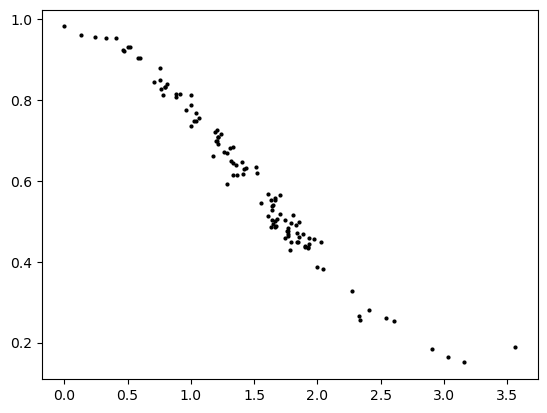

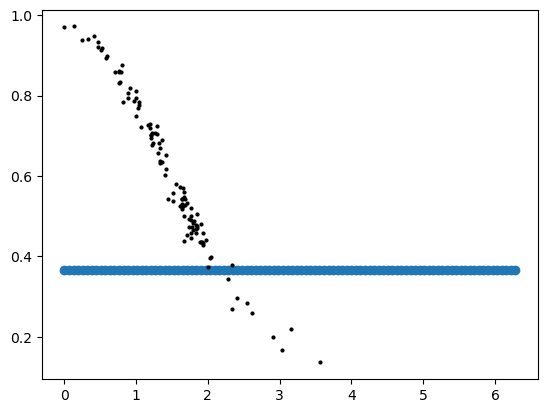

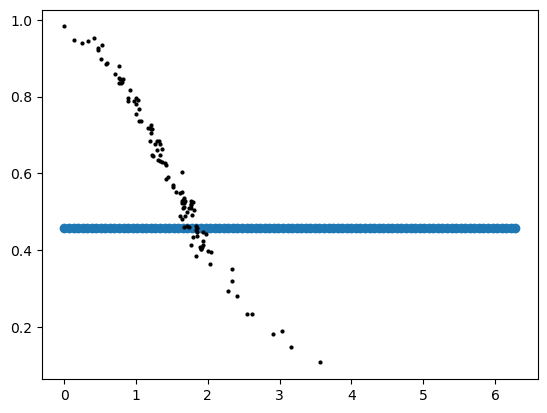

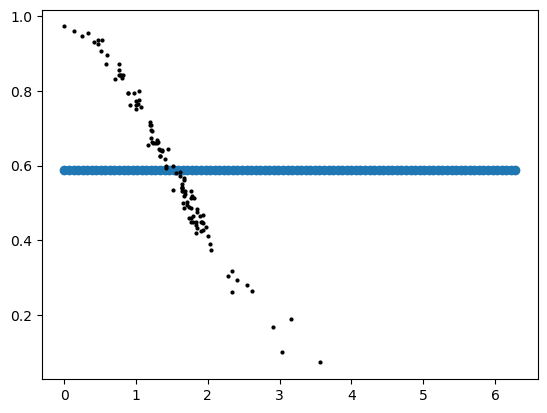

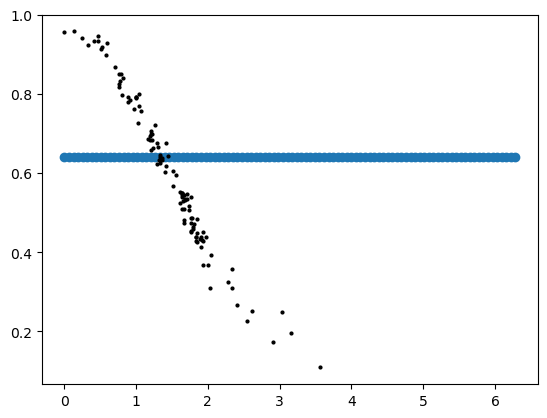

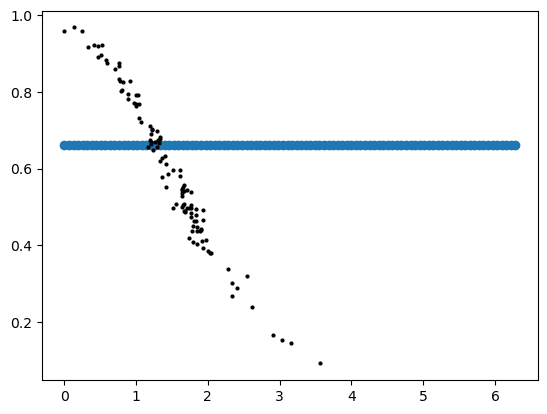

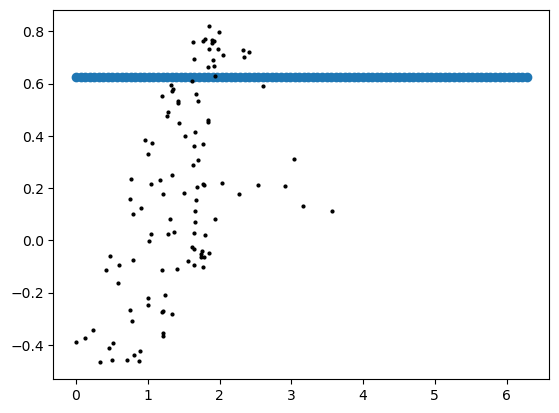

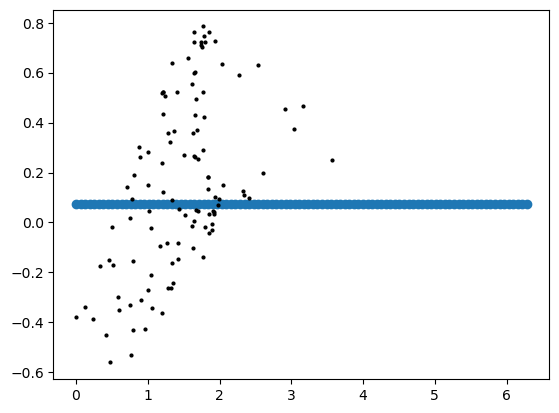

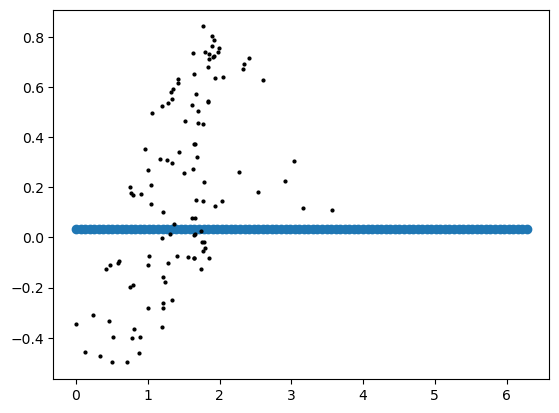

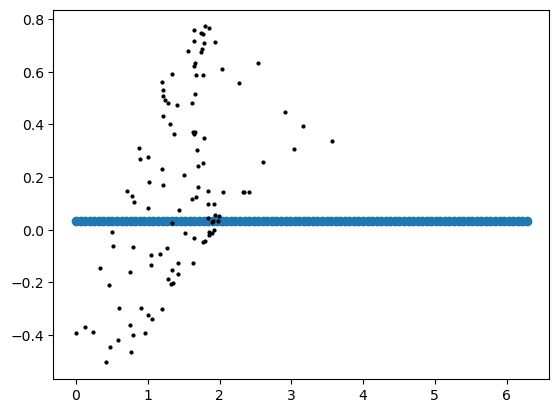

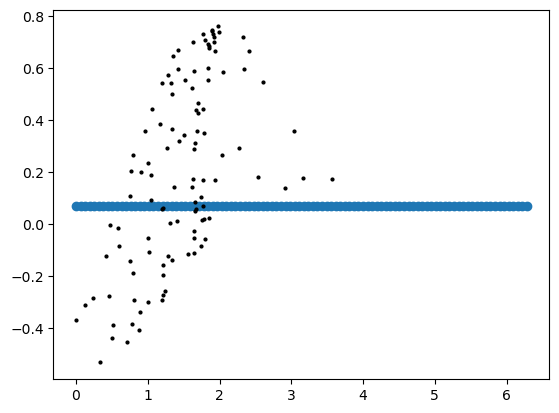

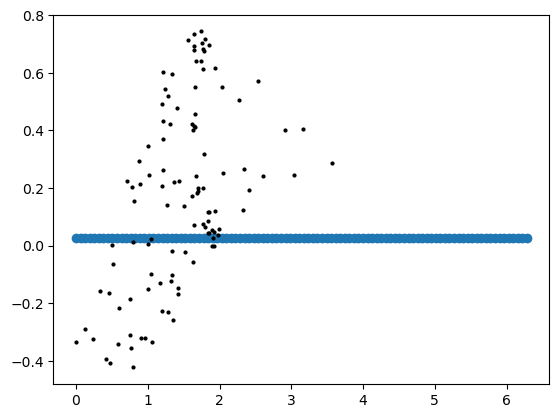

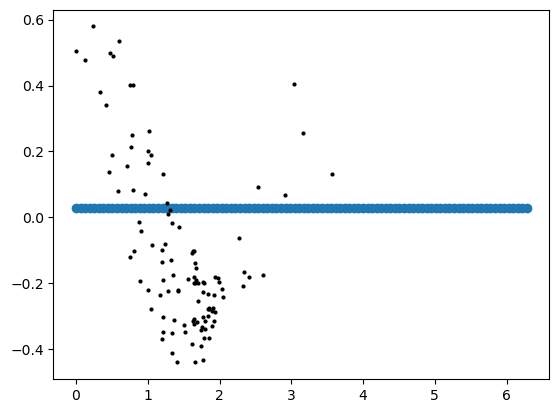

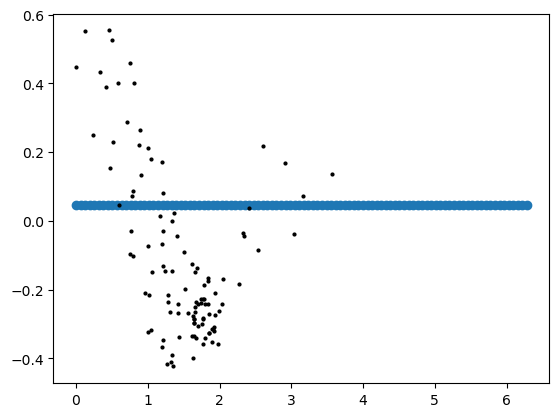

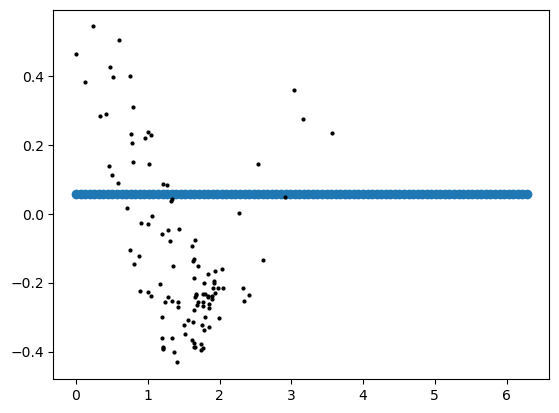

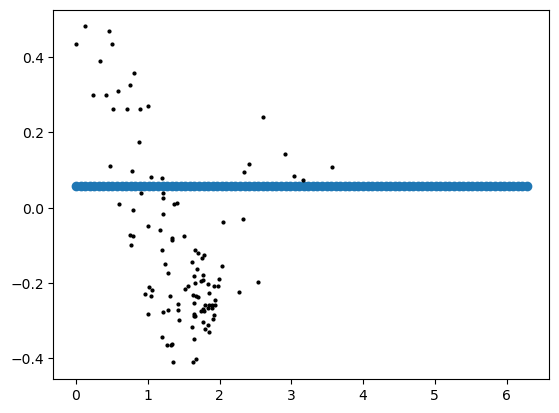

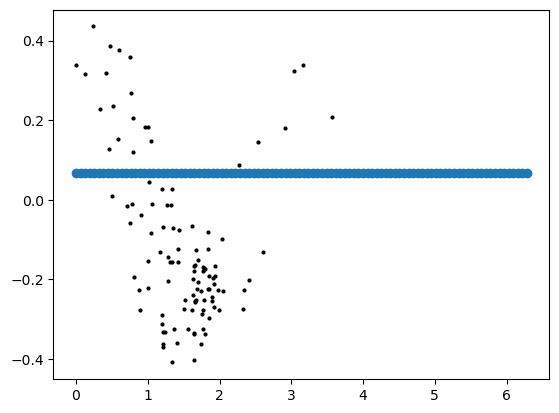

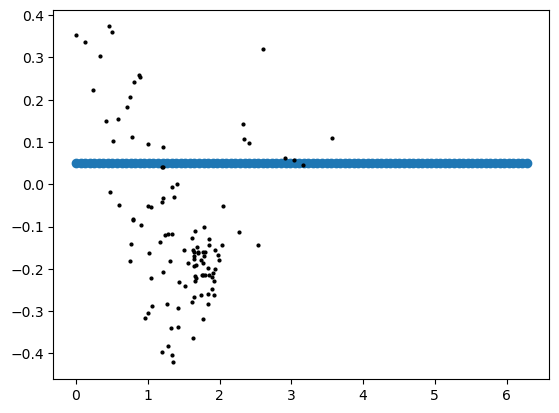

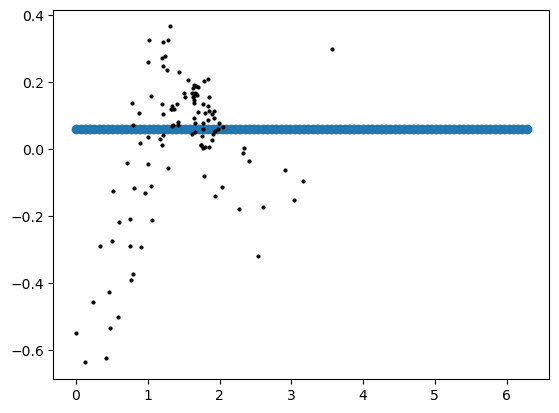

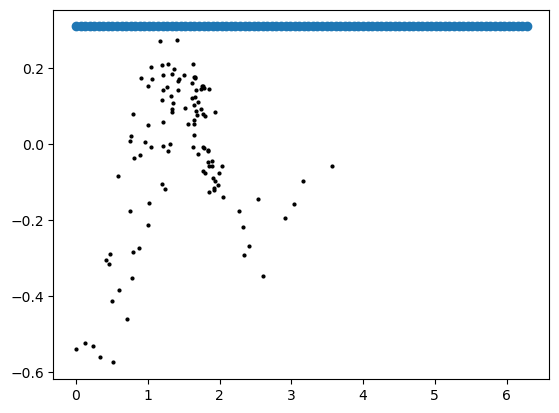

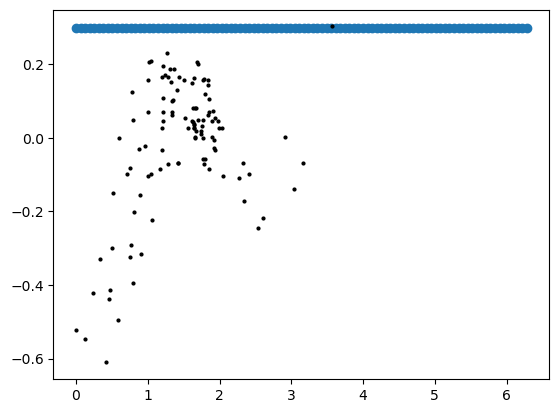

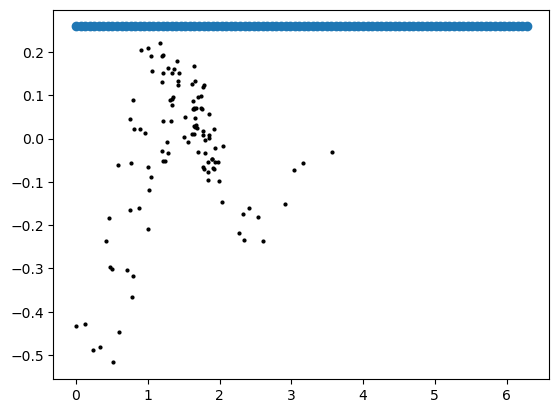

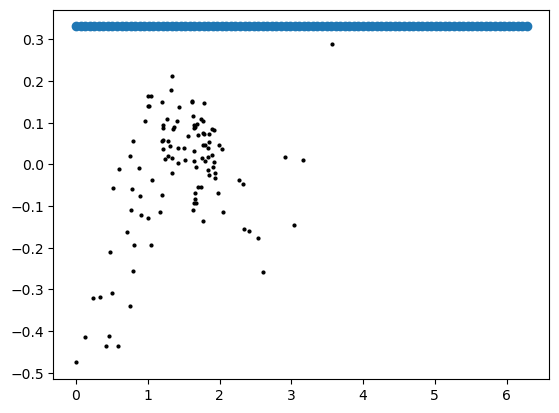

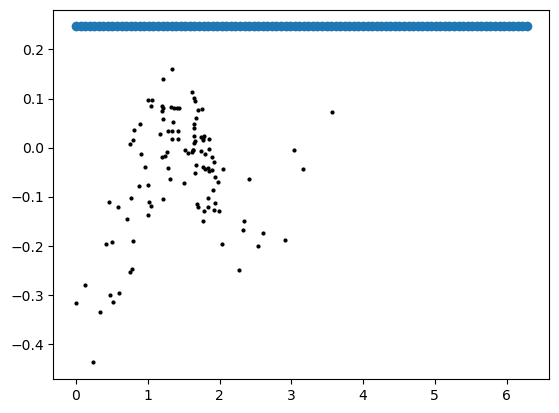

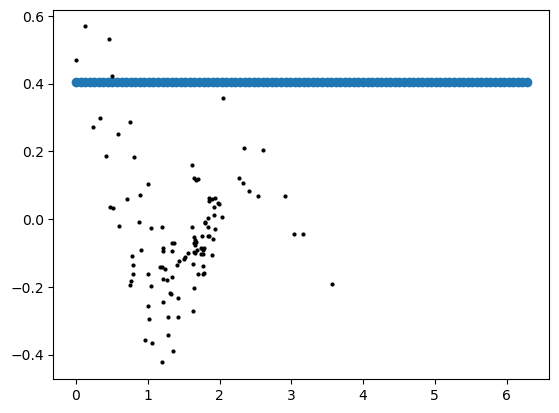

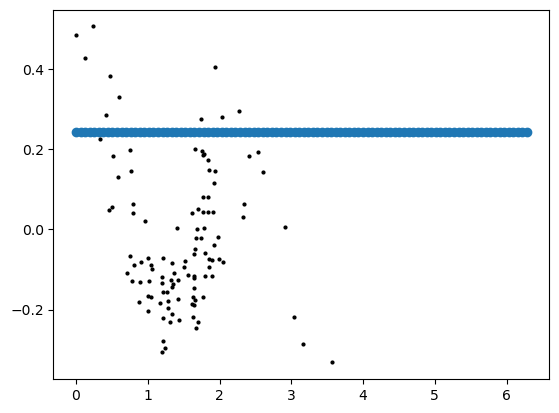

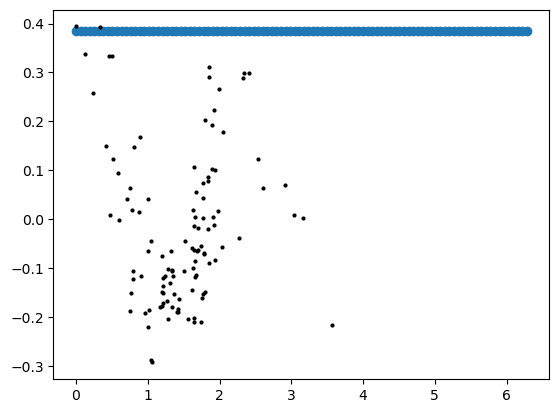

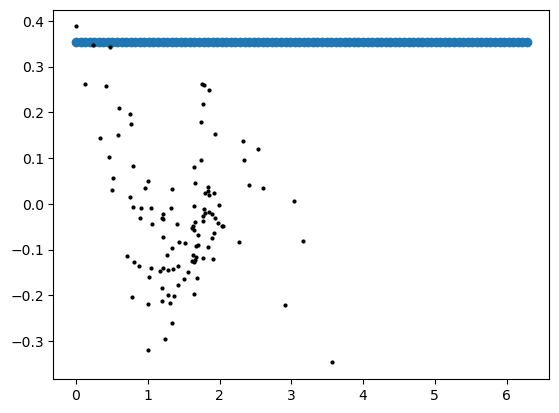

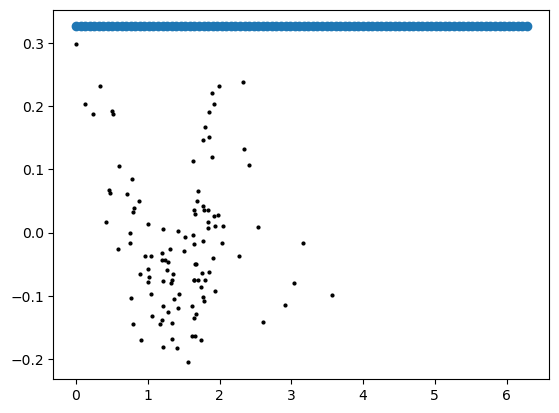

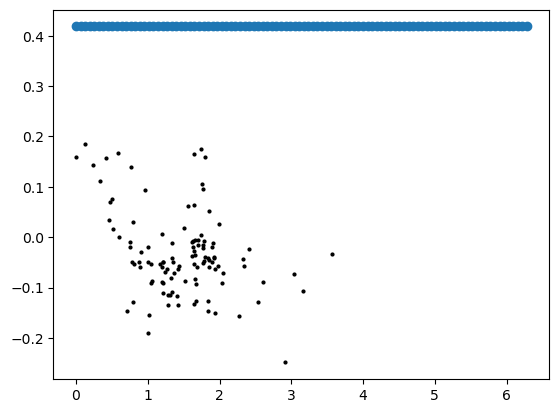

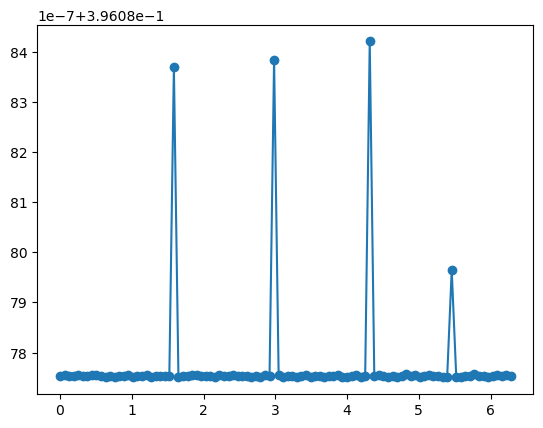

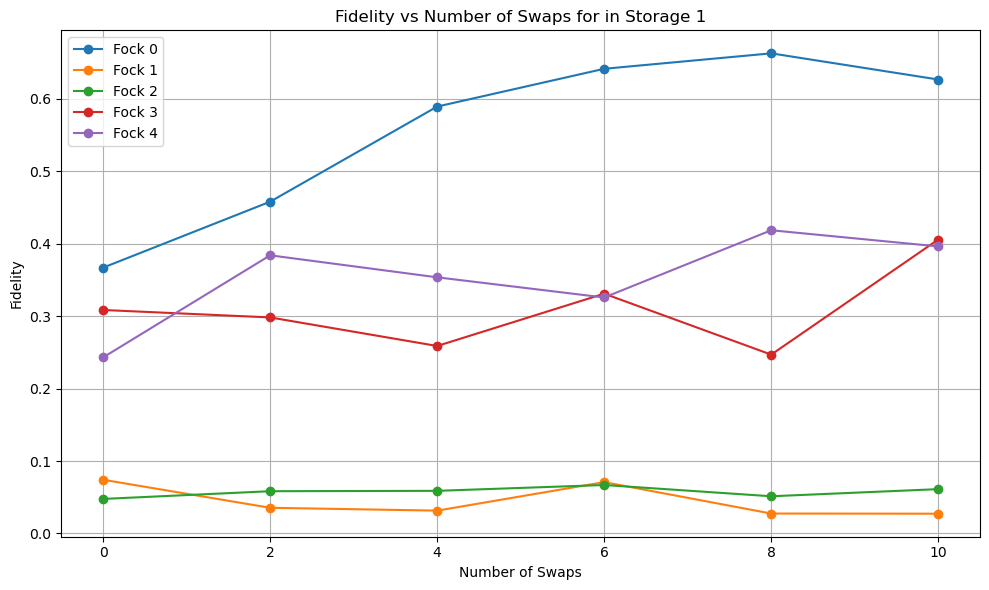

doing 0 swaps for fock 0 in storage 2
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.1994093830593503
doing 4 swaps for fock 3 in storage 2
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

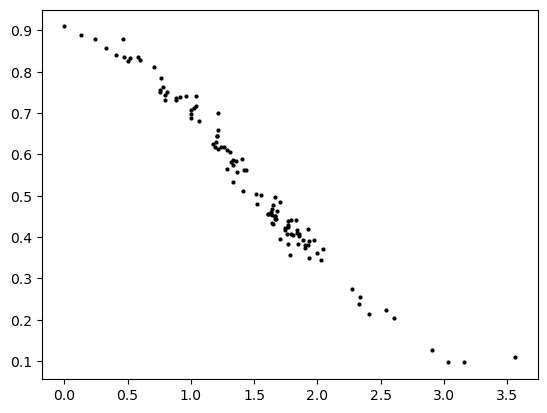

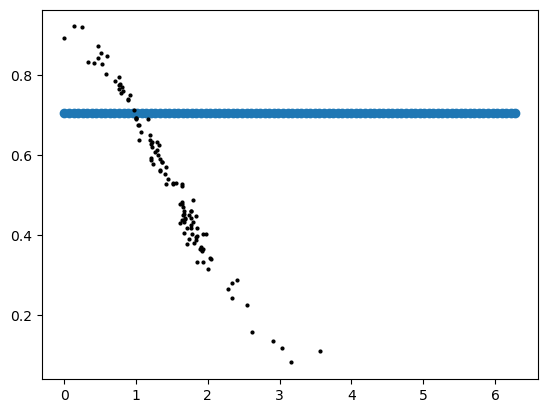

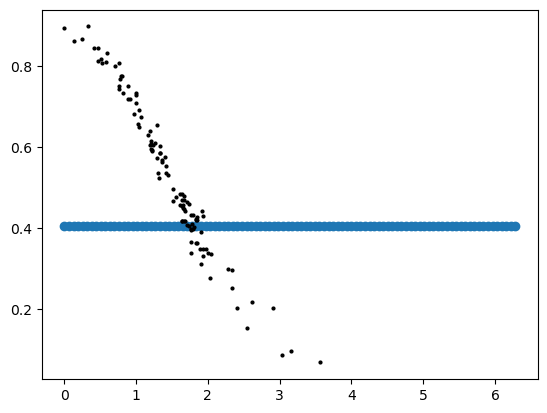

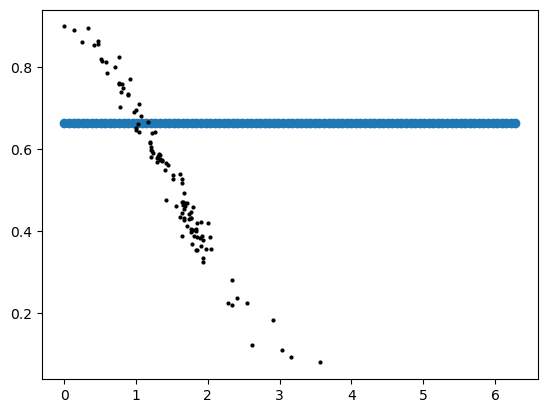

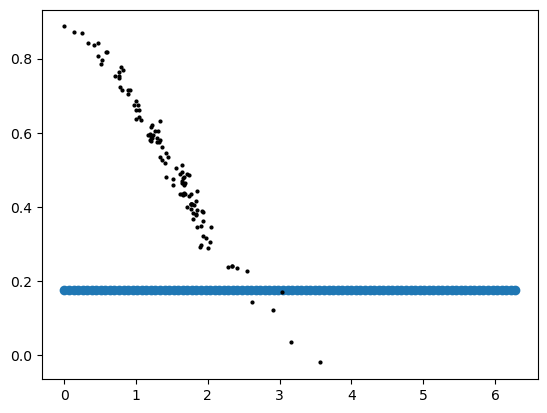

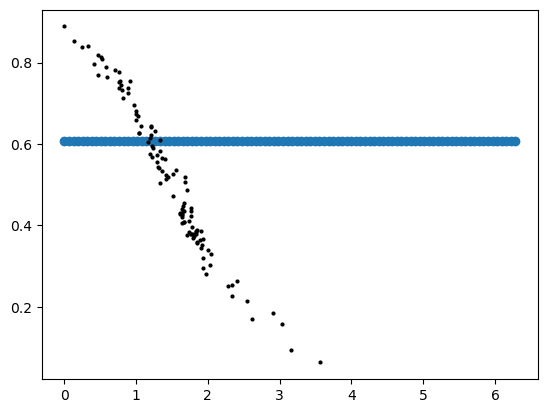

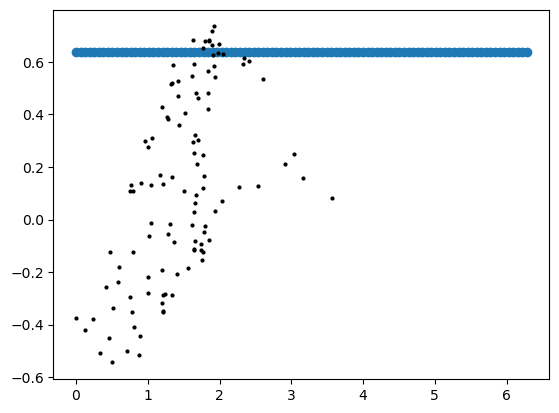

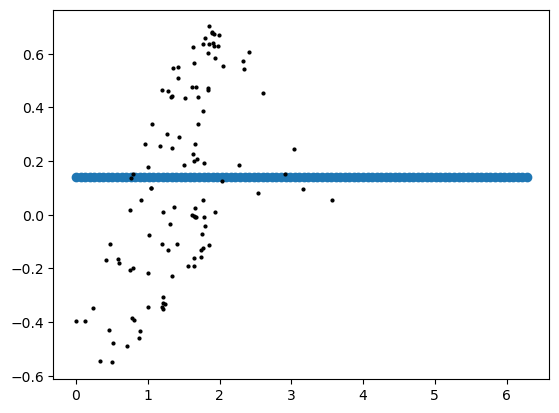

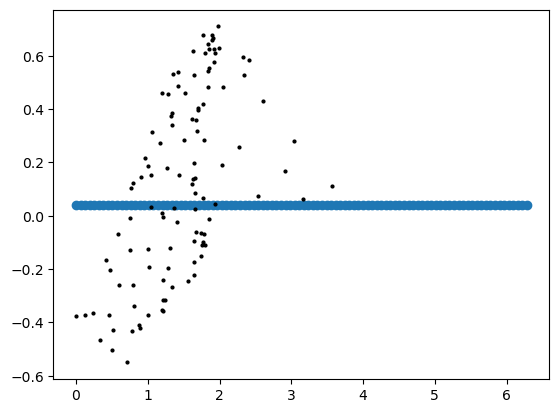

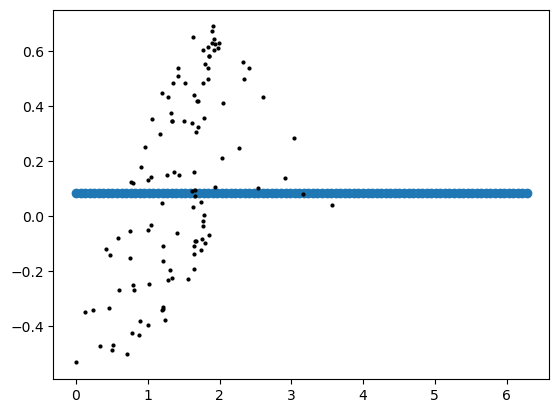

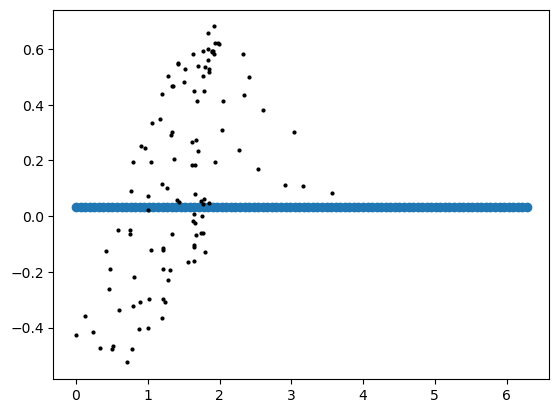

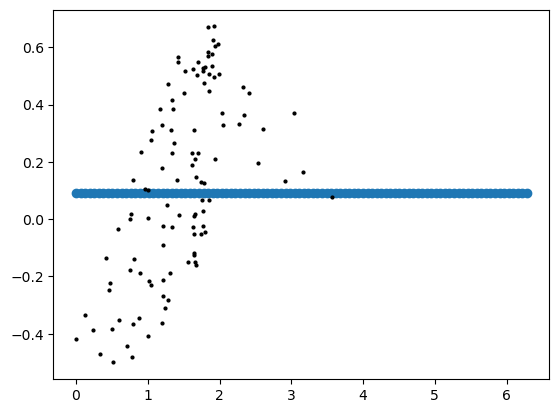

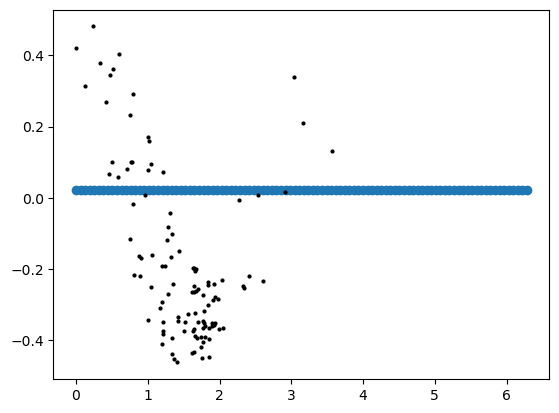

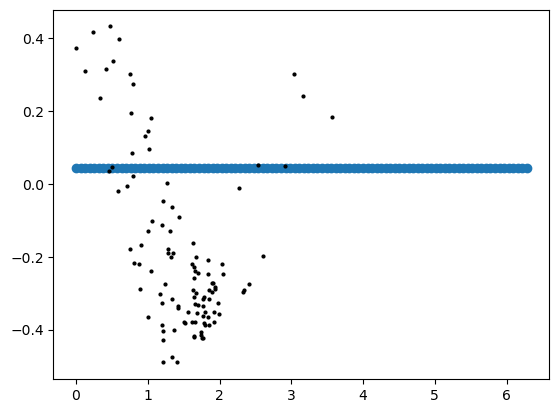

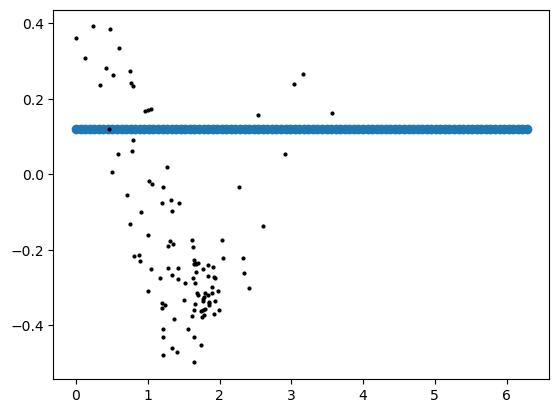

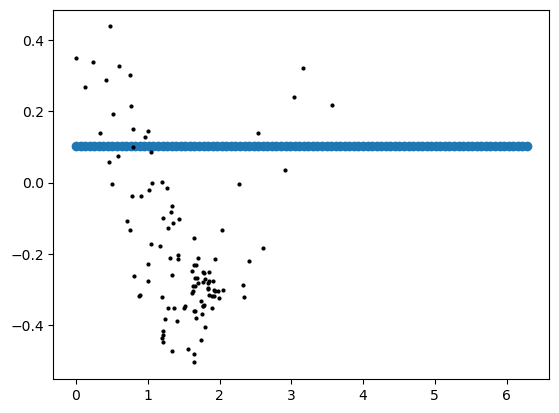

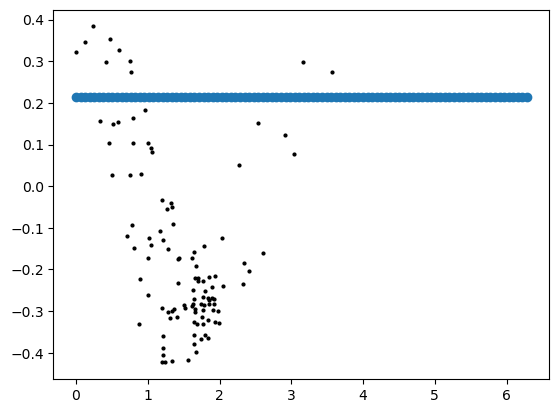

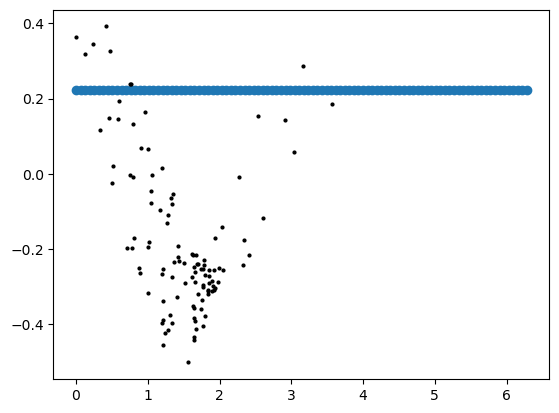

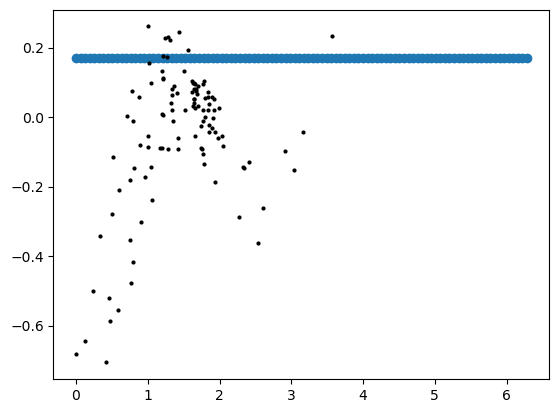

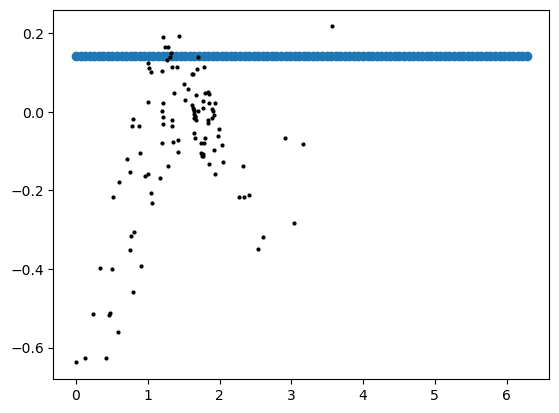

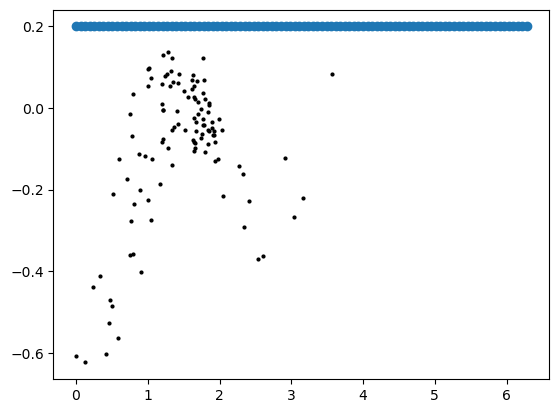

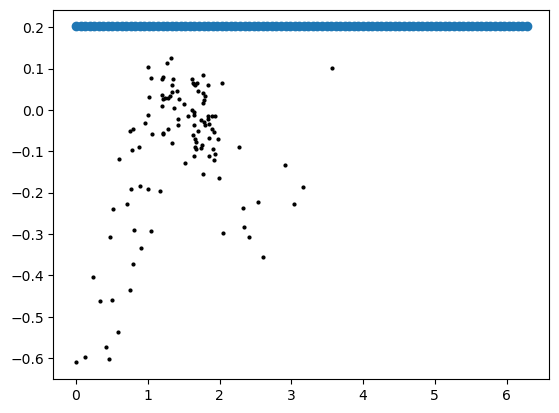

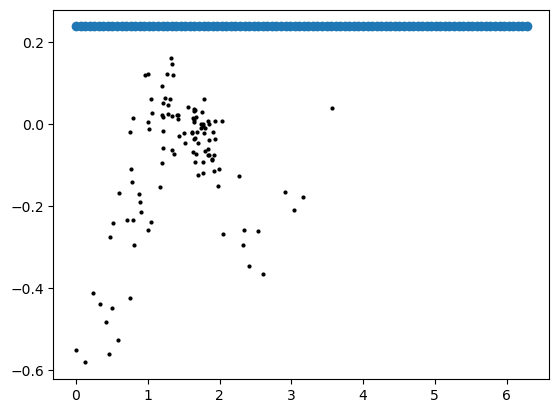

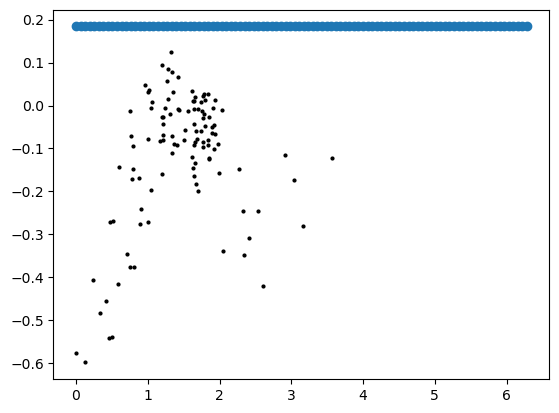

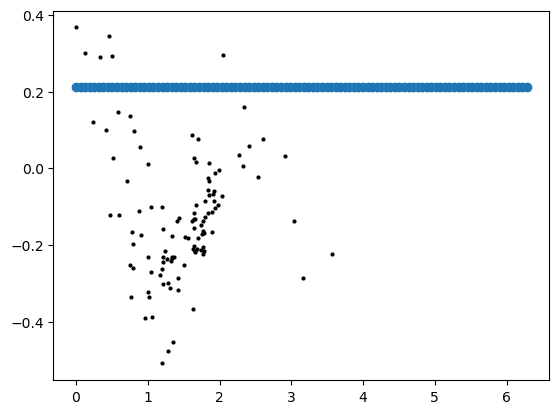

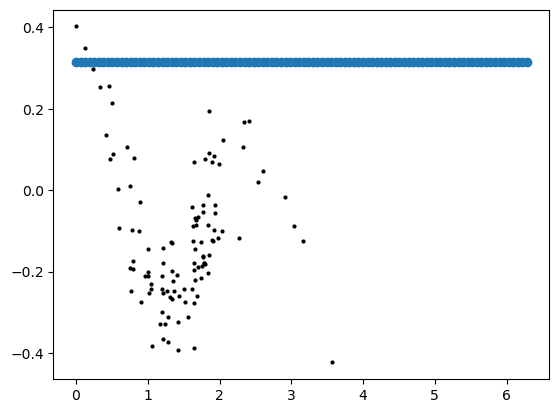

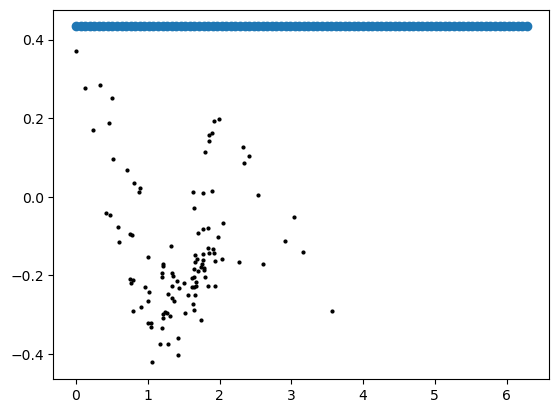

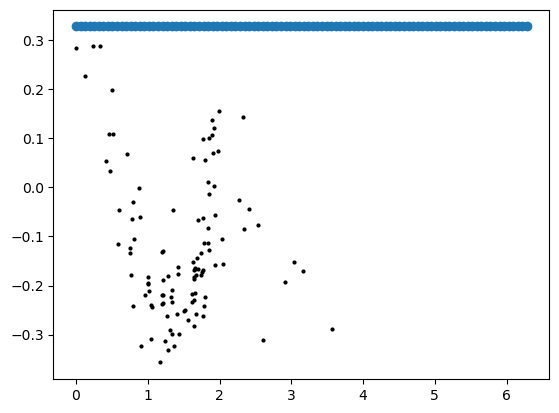

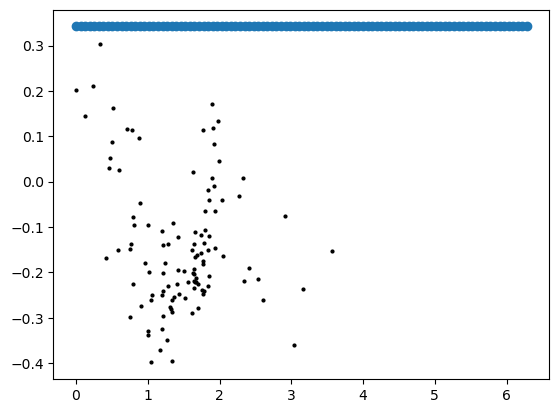

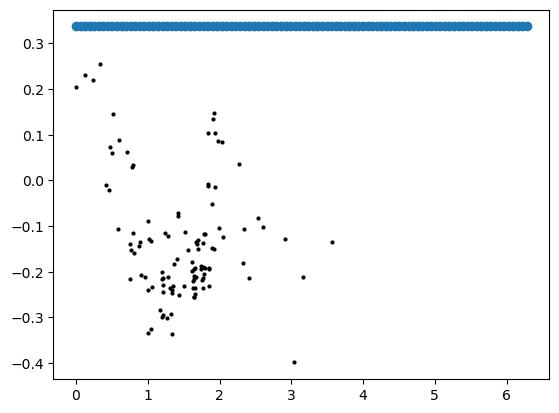

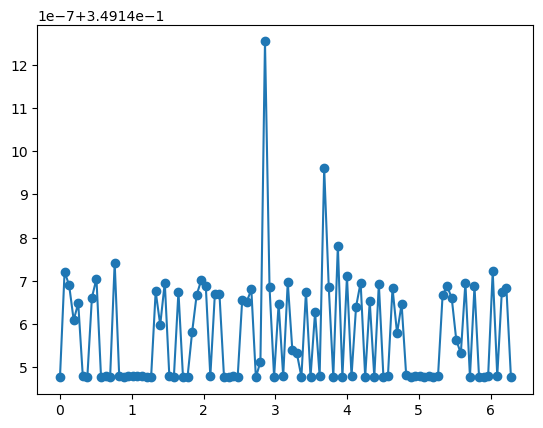

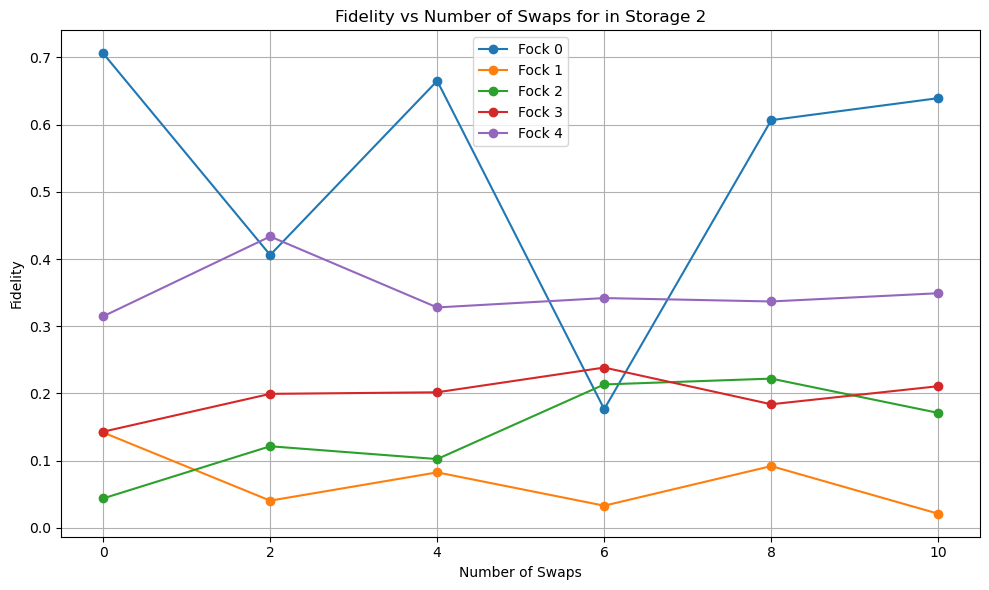

doing 0 swaps for fock 0 in storage 3
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.34349873727148655
doing 4 swaps for fock 3 in storage 3
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

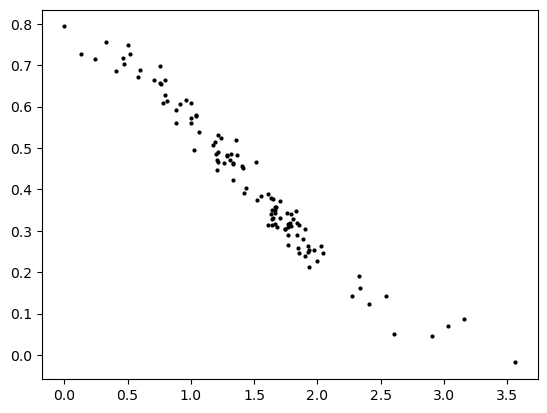

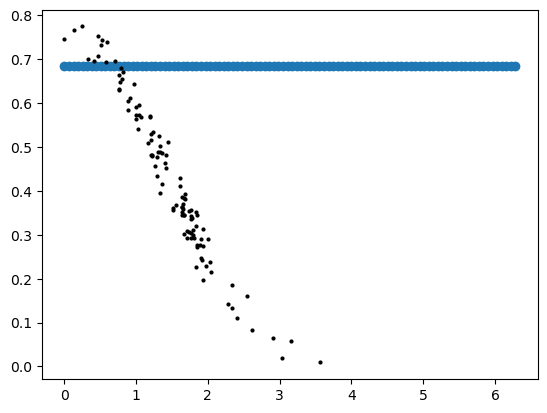

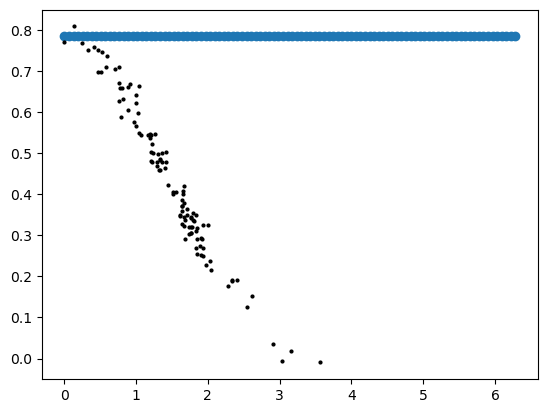

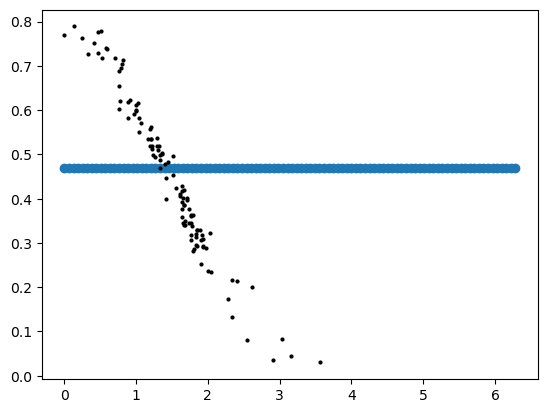

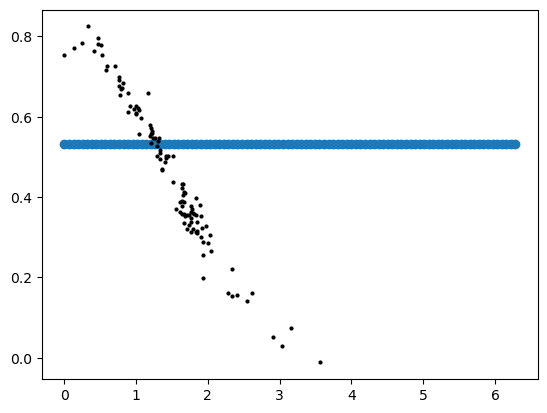

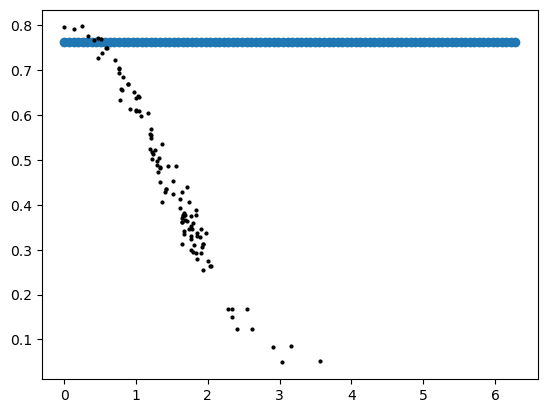

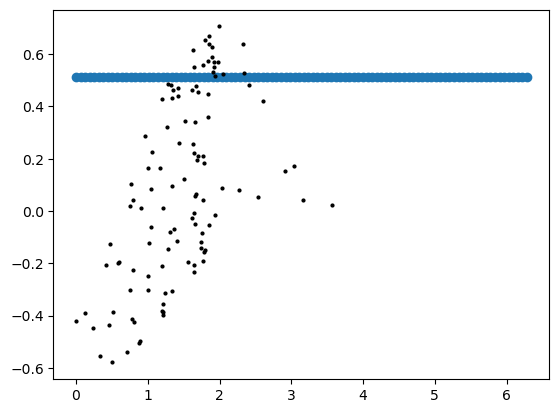

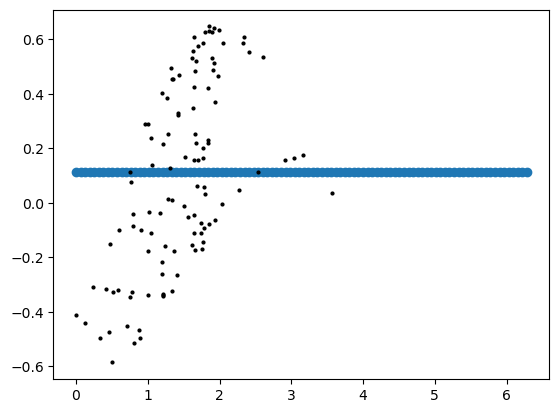

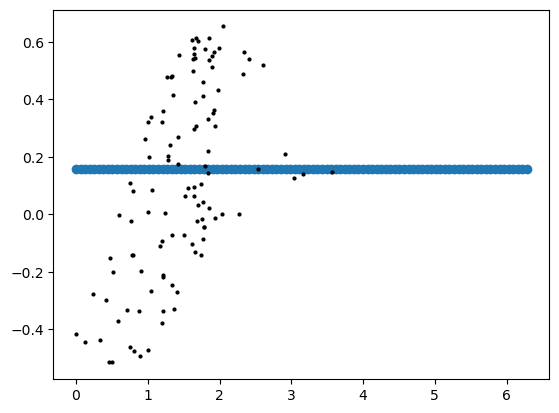

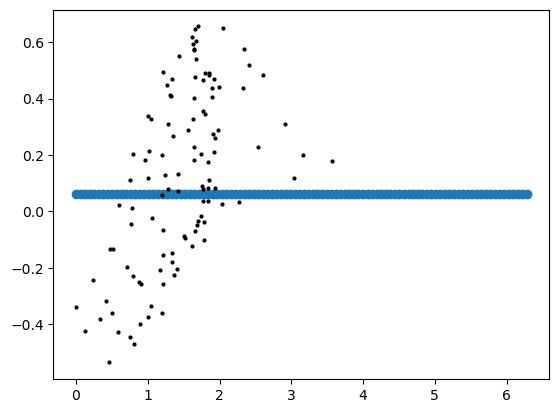

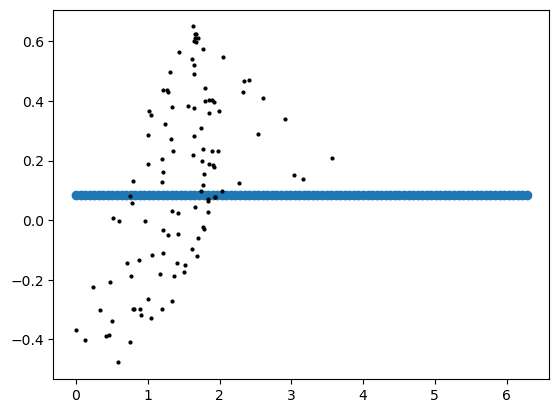

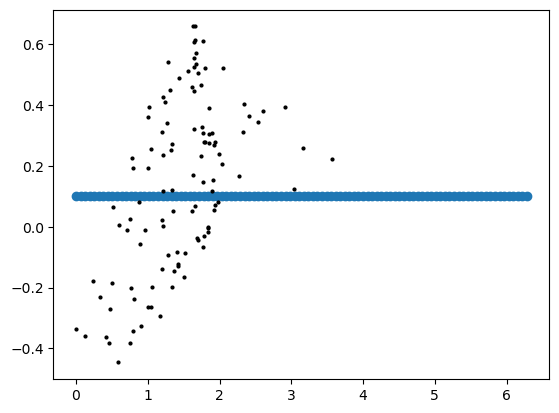

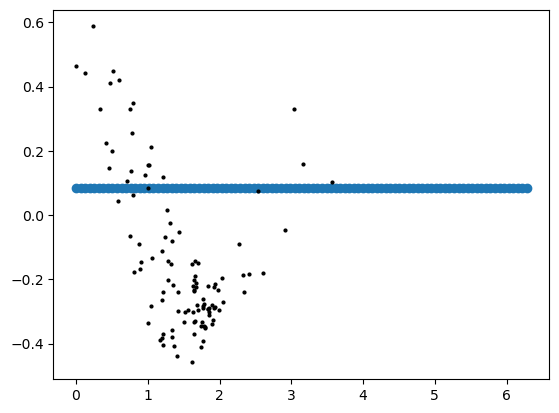

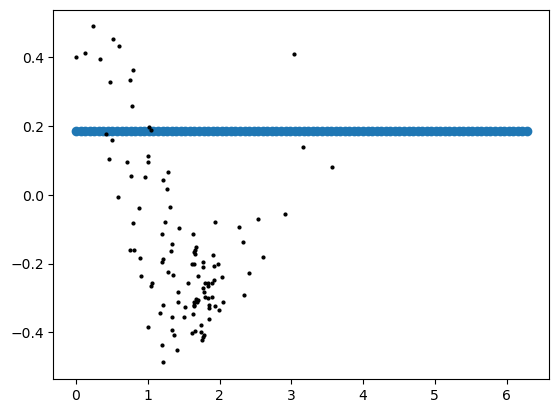

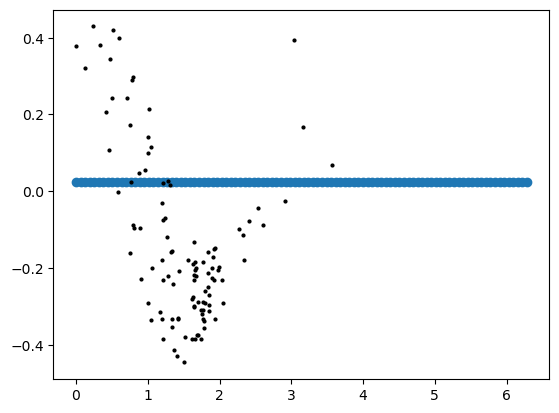

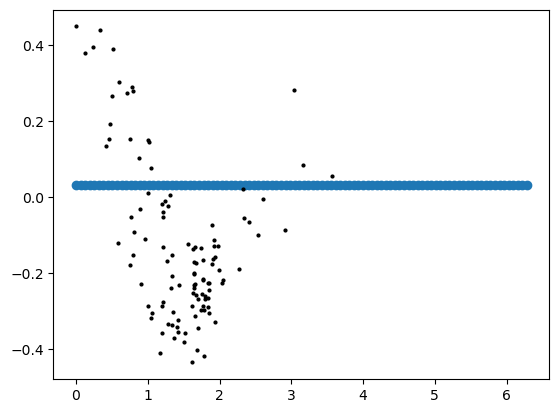

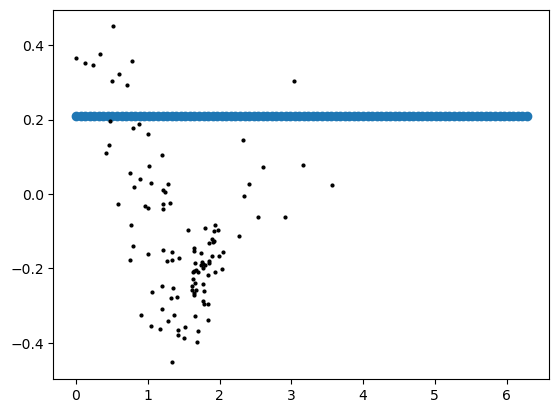

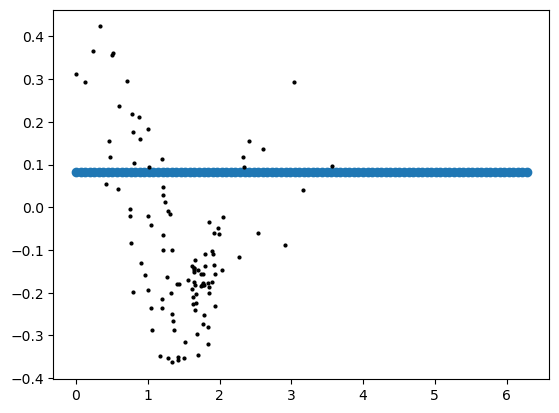

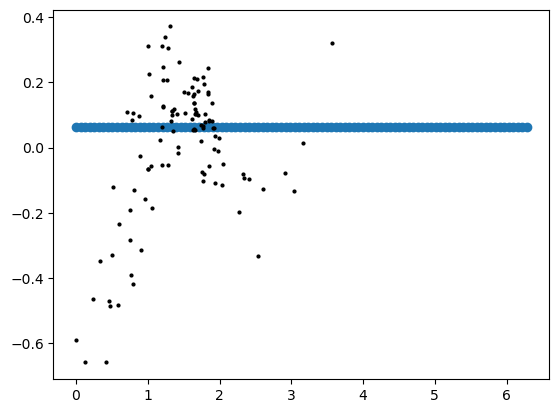

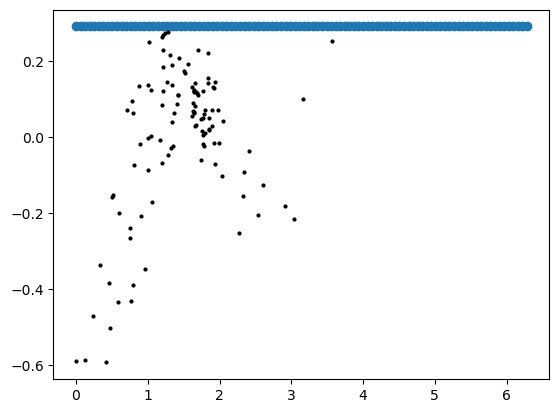

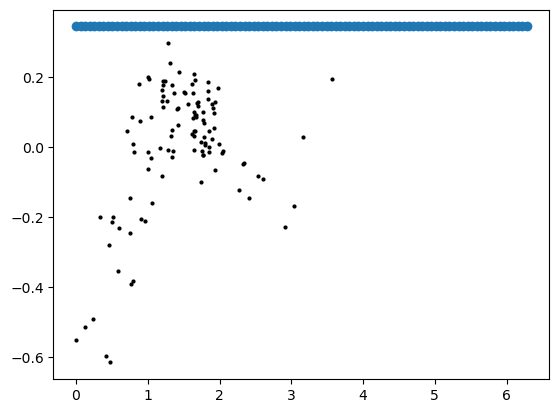

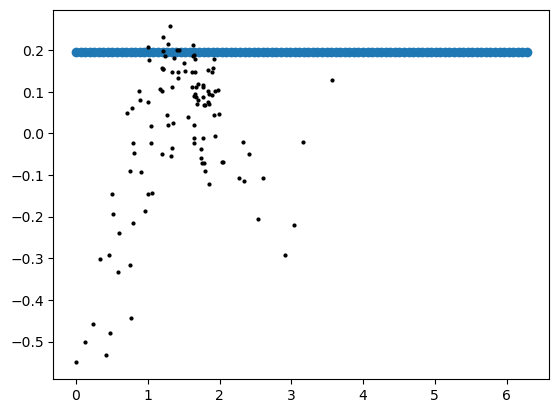

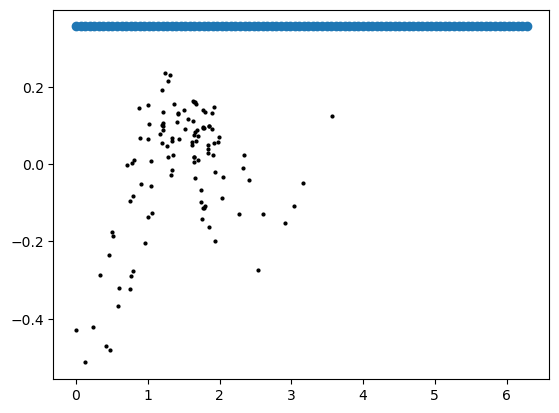

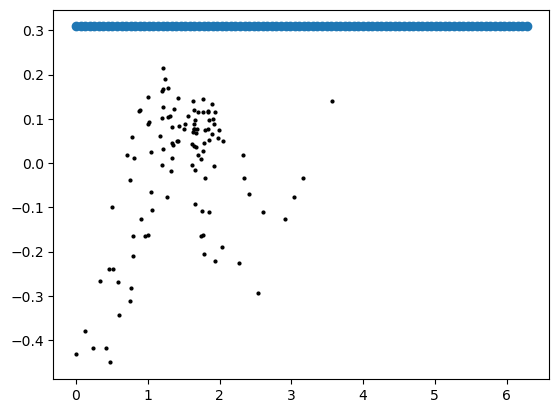

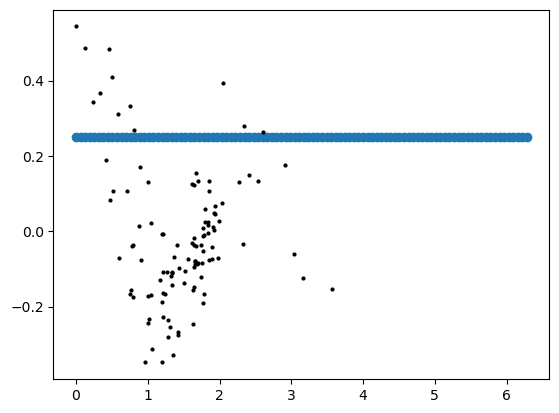

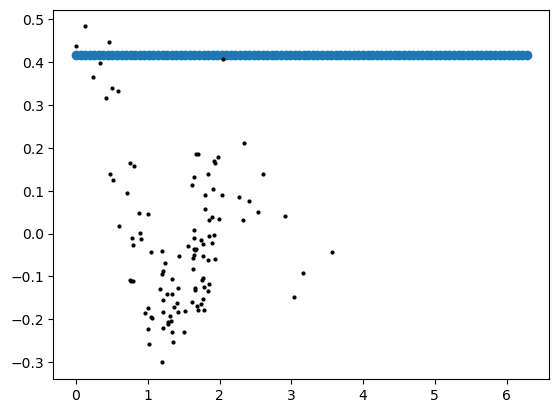

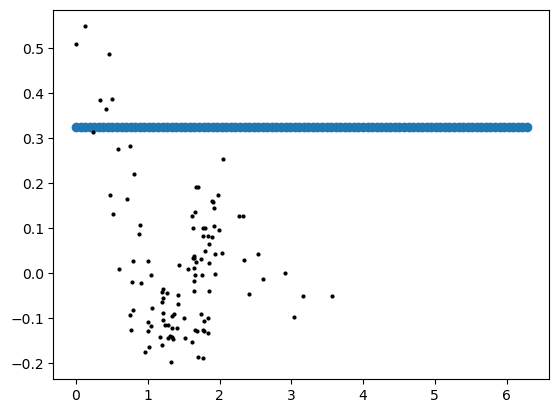

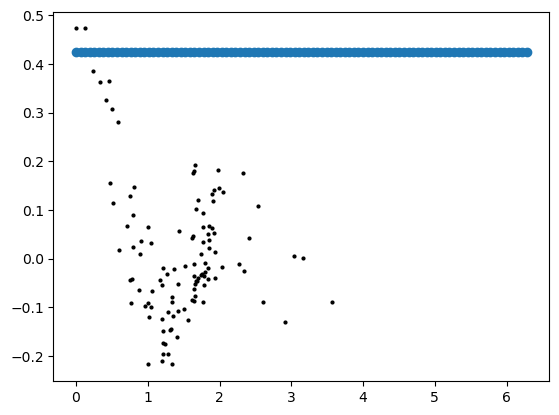

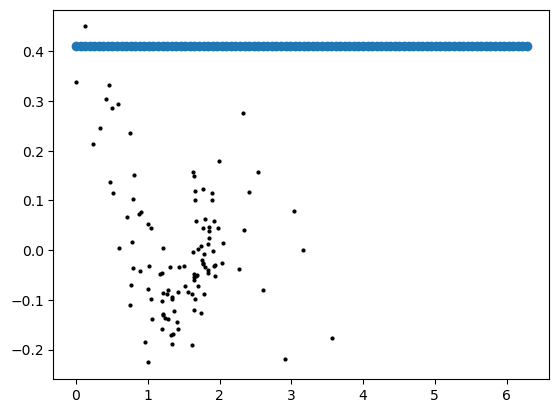

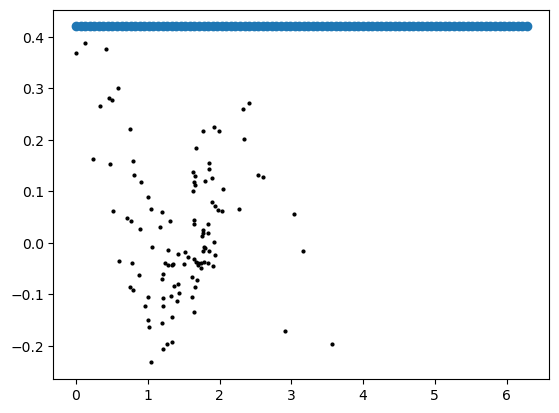

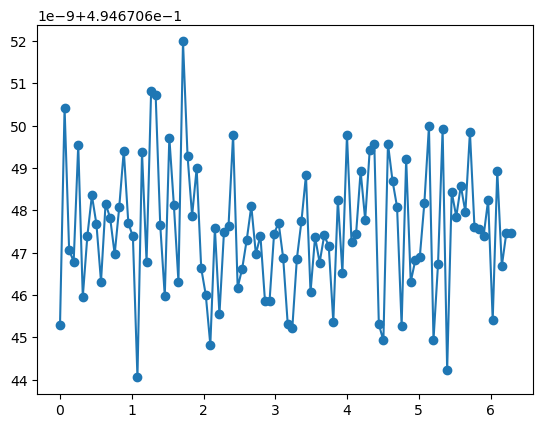

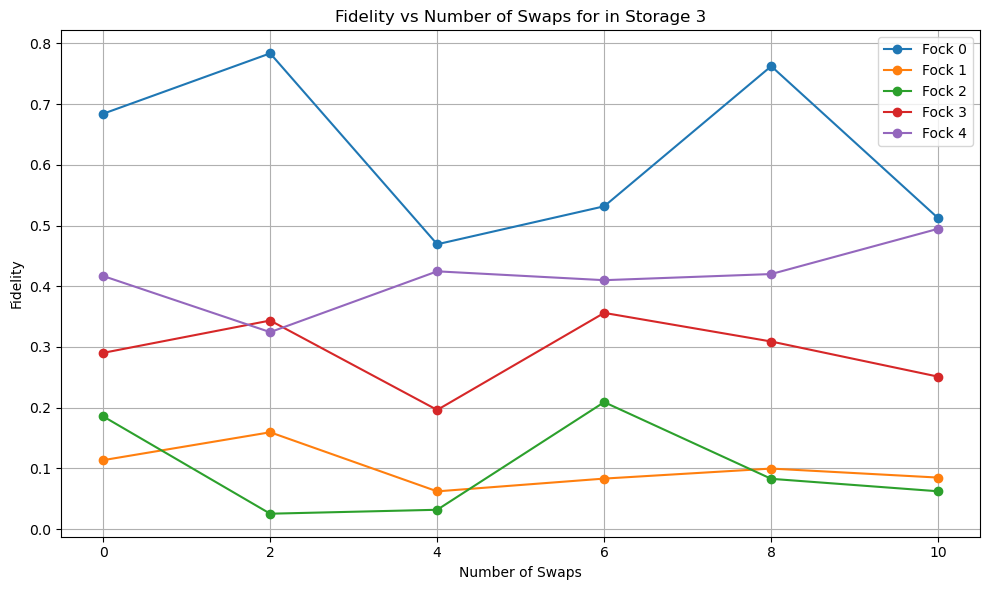

doing 0 swaps for fock 0 in storage 4
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.2593804220724623
doing 4 swaps for fock 3 in storage 4
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

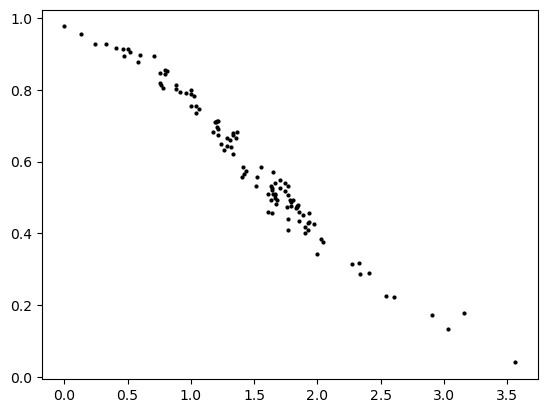

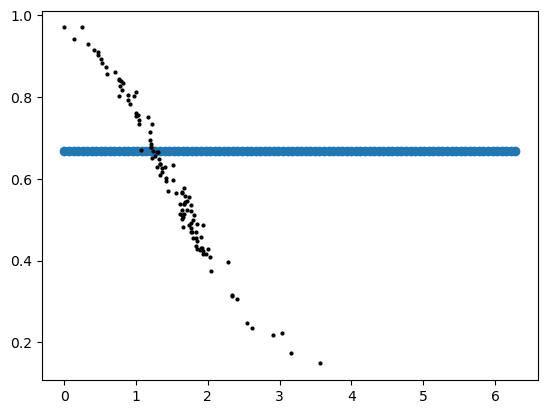

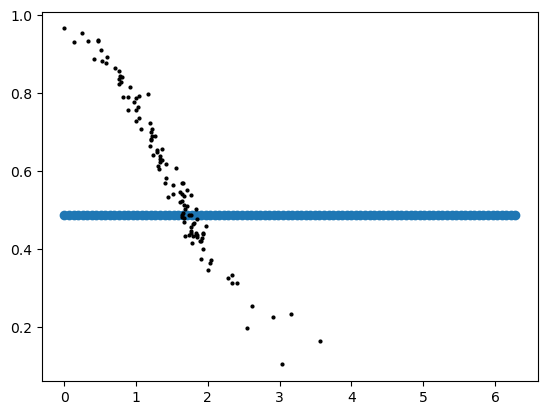

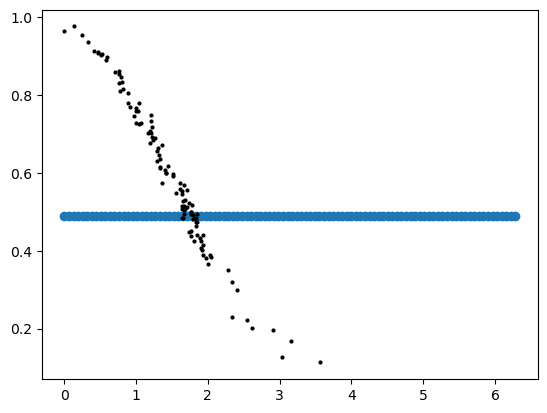

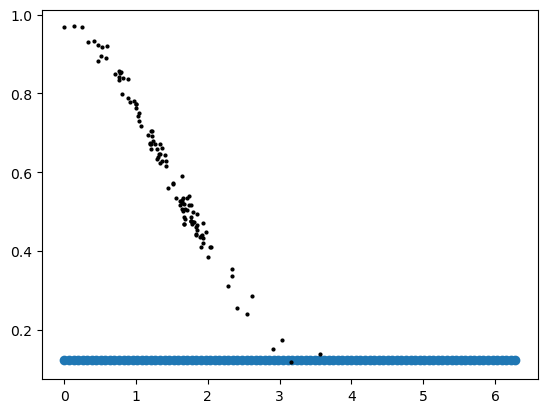

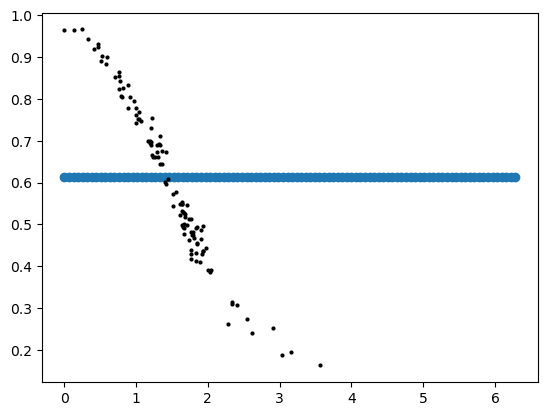

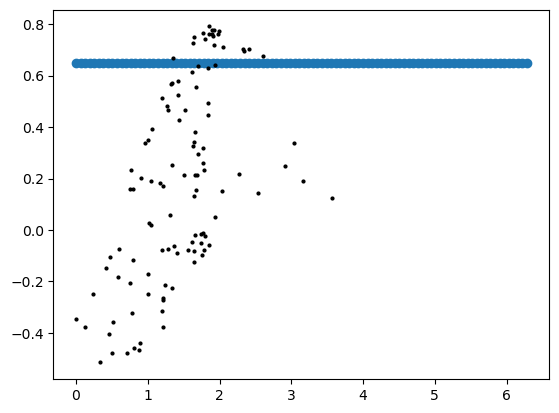

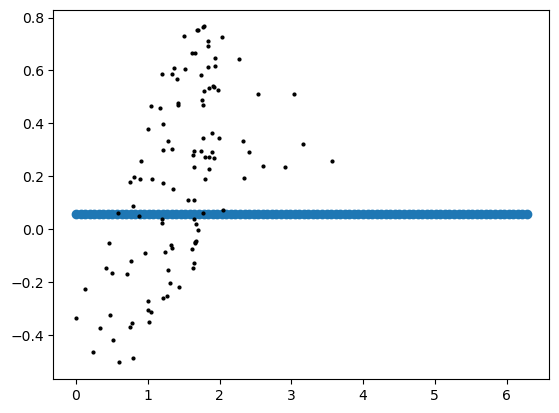

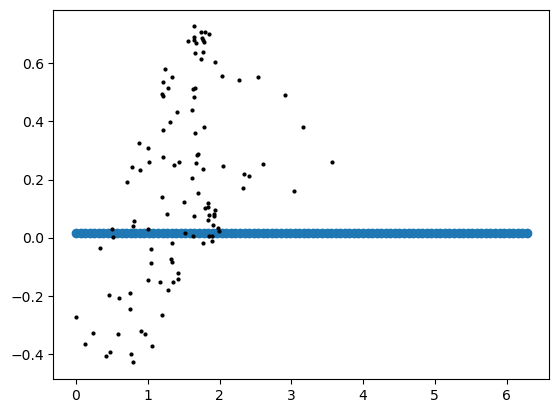

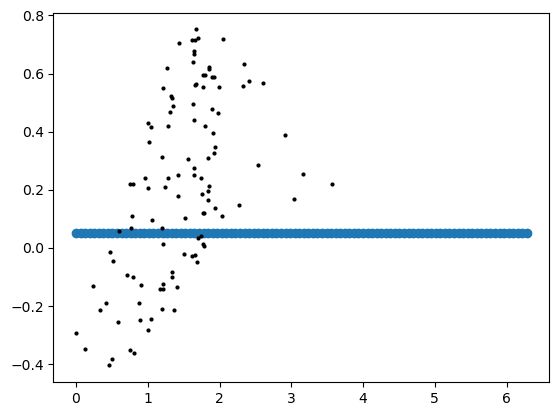

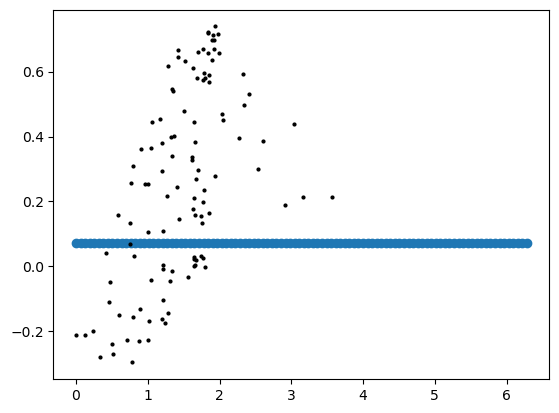

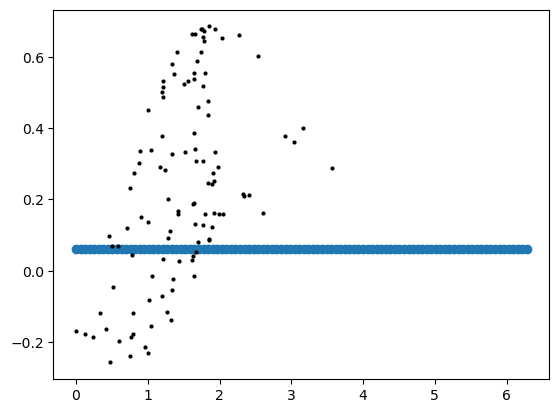

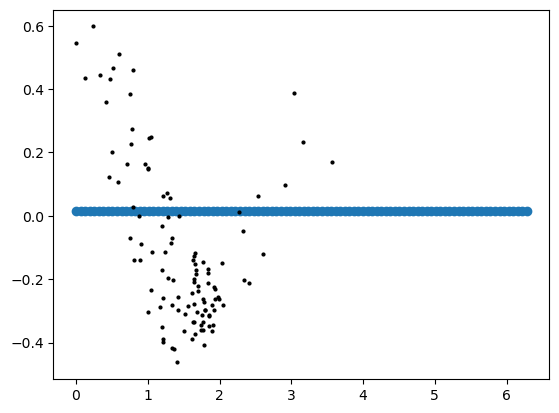

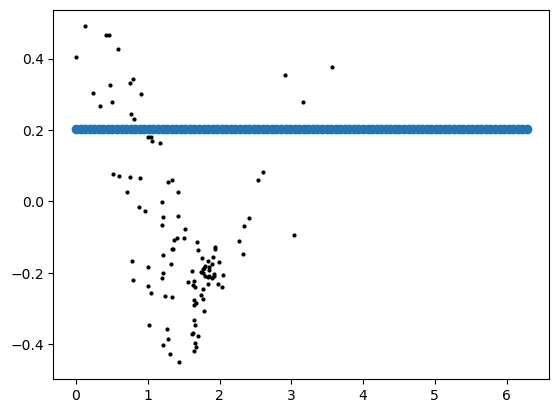

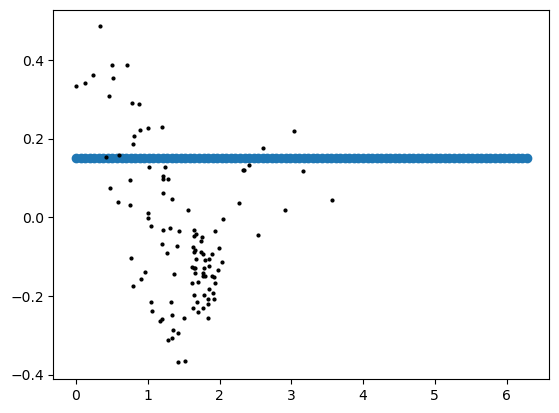

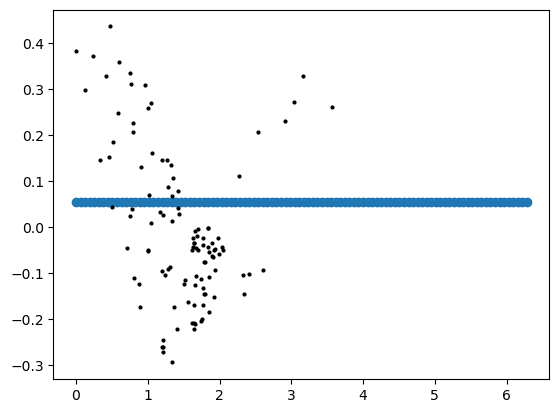

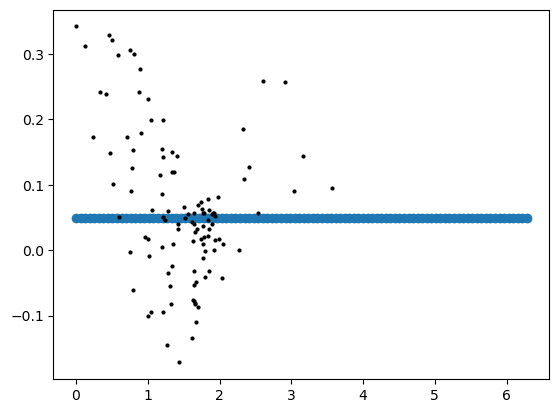

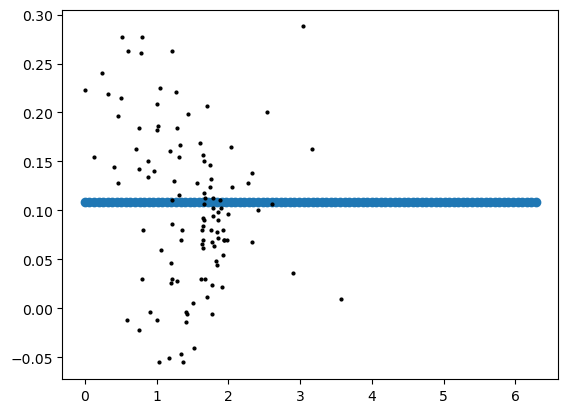

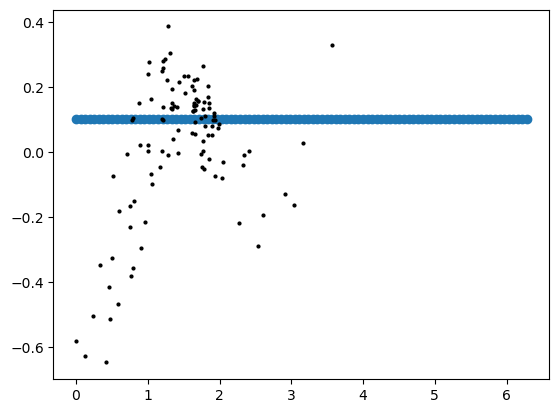

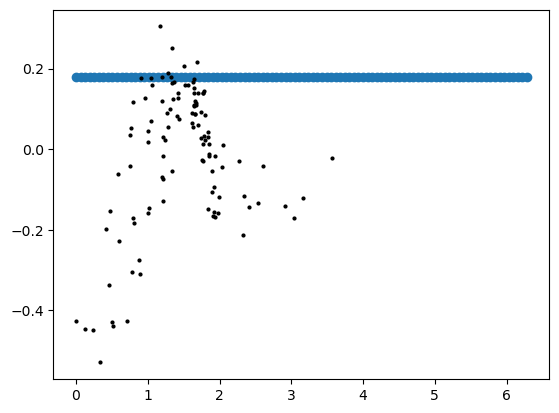

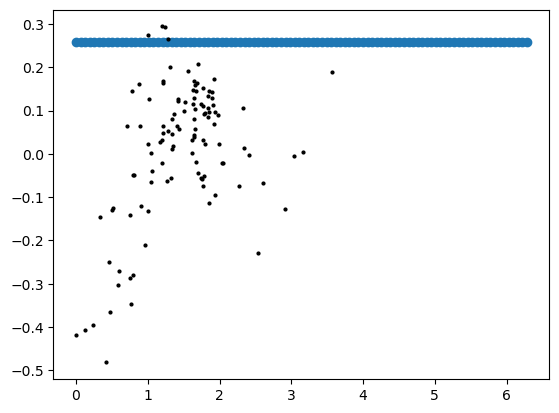

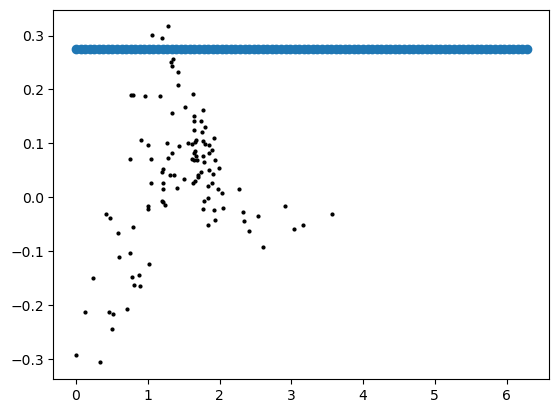

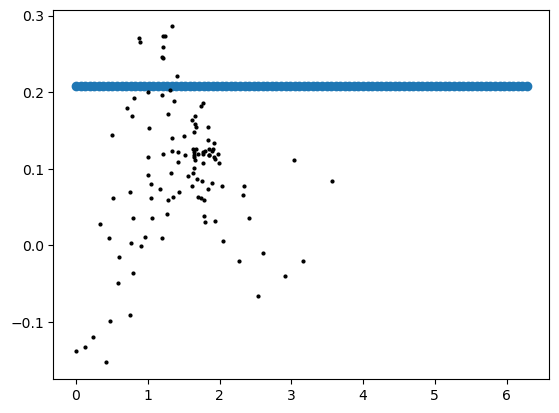

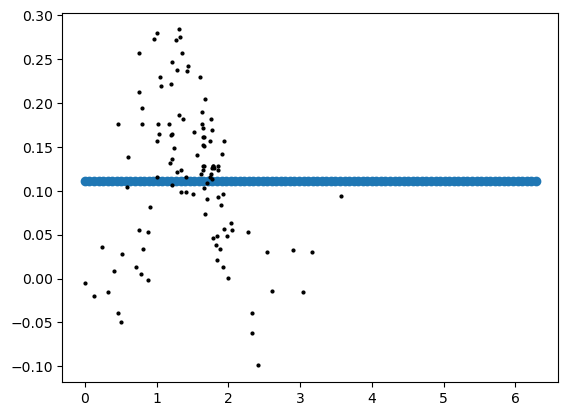

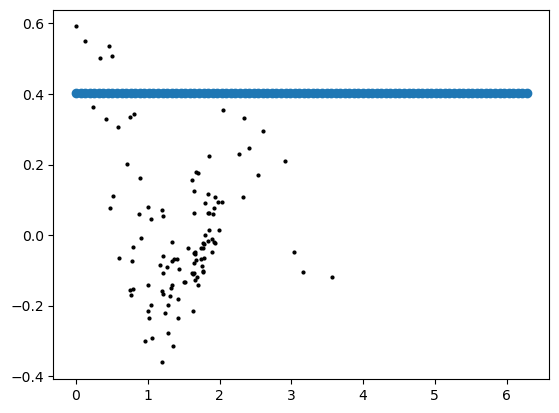

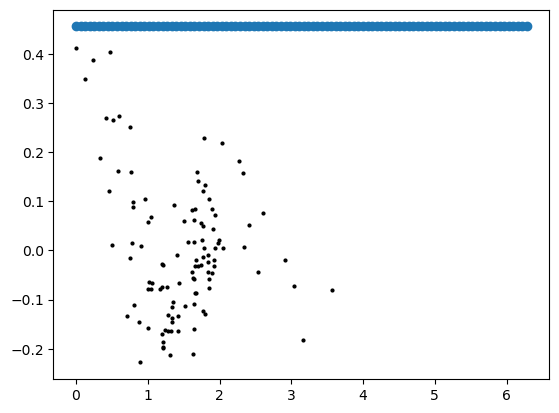

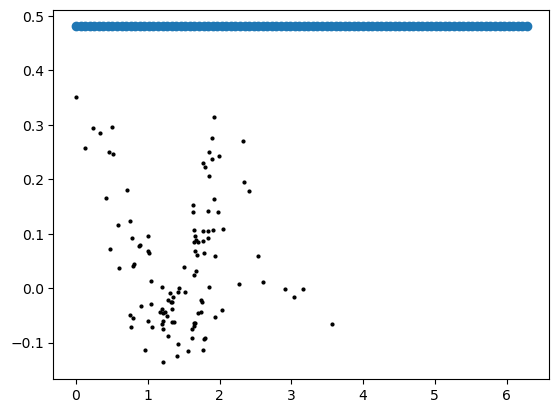

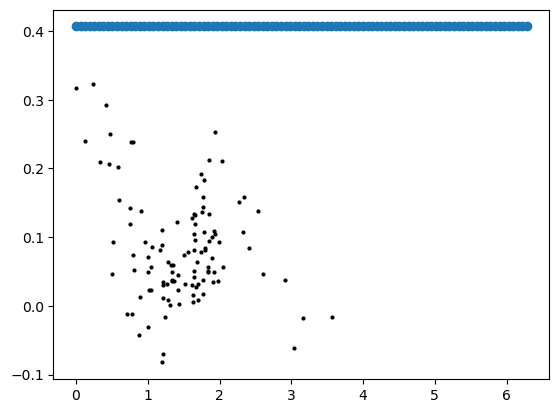

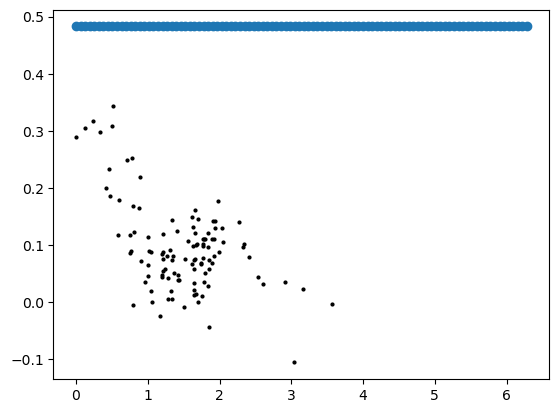

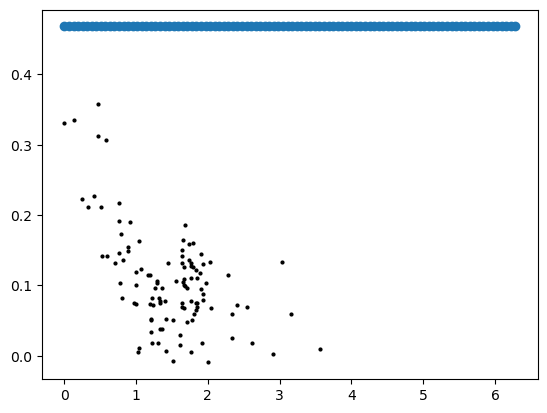

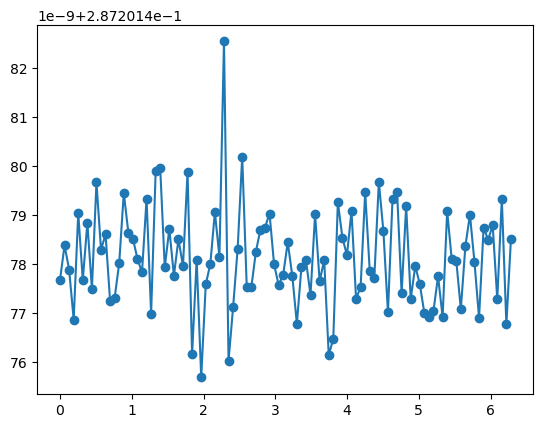

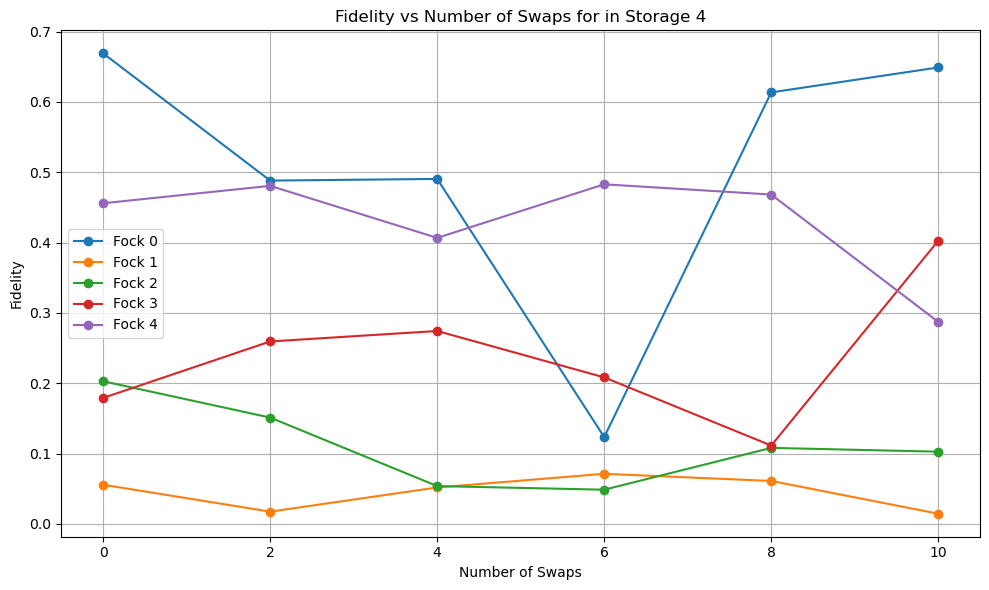

doing 0 swaps for fock 0 in storage 5
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.2551917837041946
doing 4 swaps for fock 3 in storage 5
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

KeyboardInterrupt: 

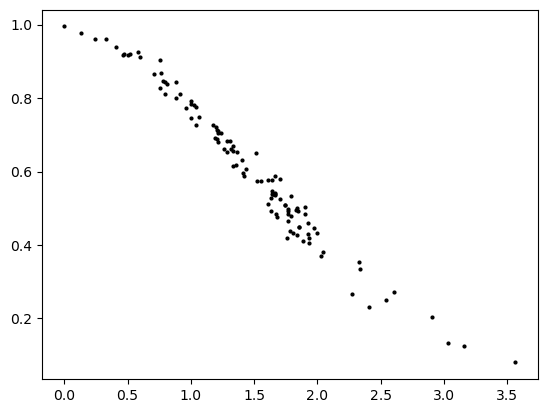

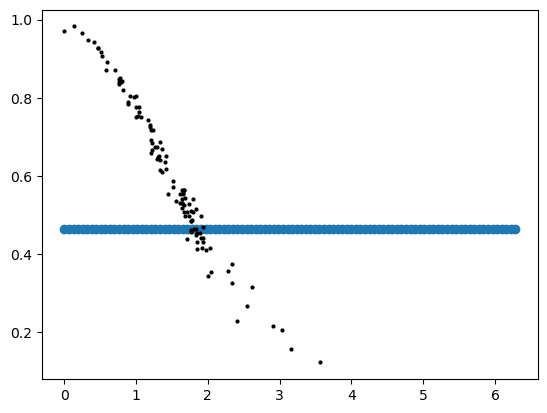

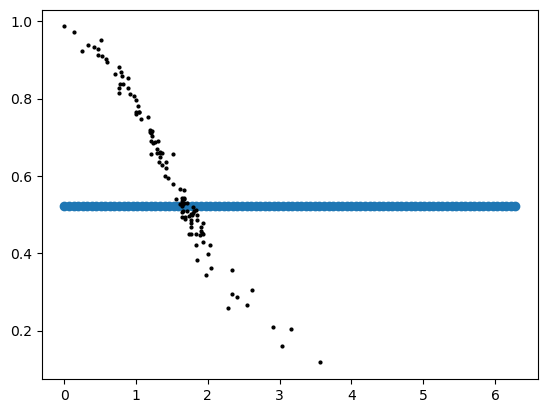

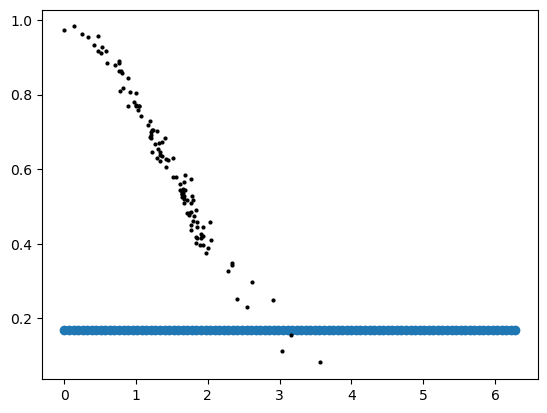

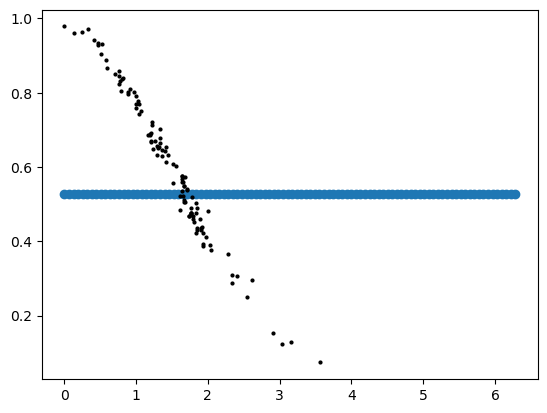

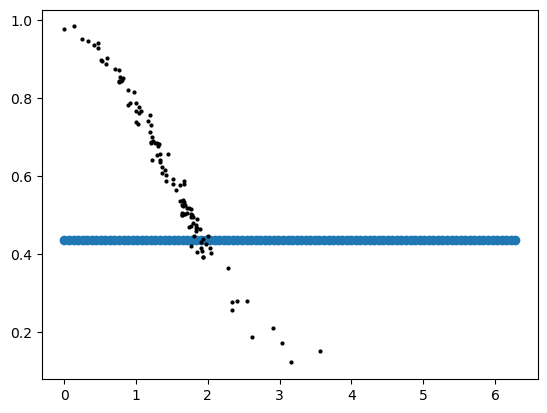

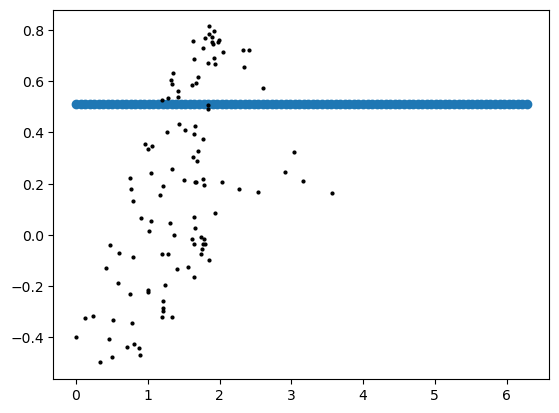

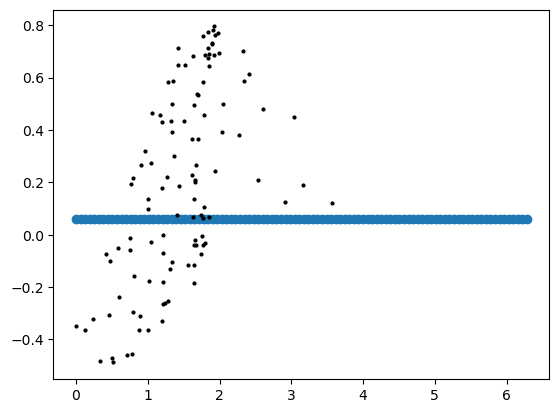

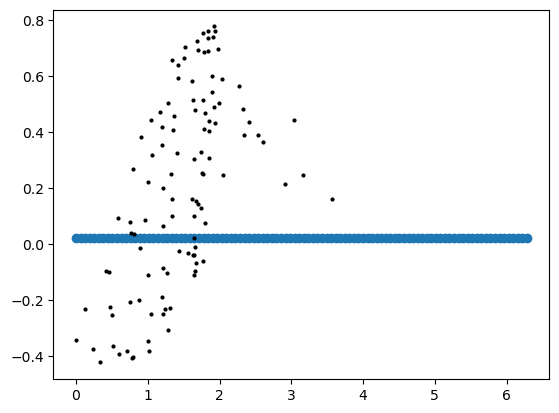

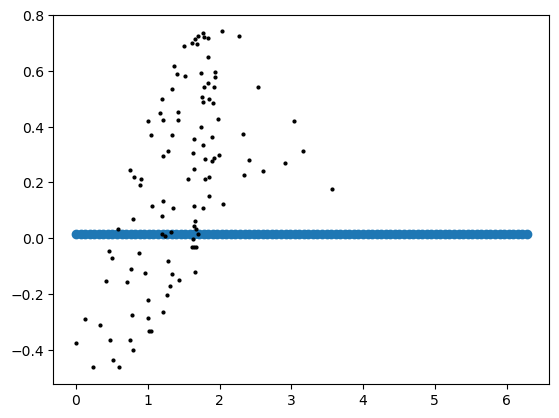

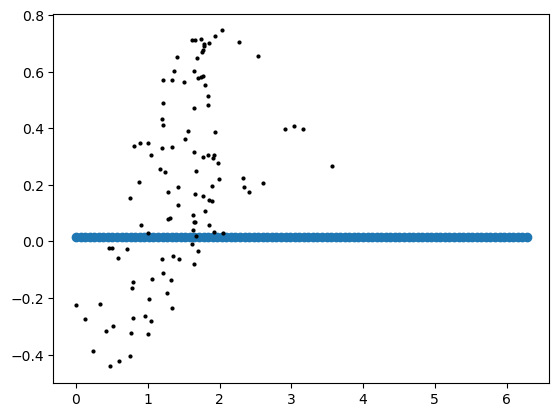

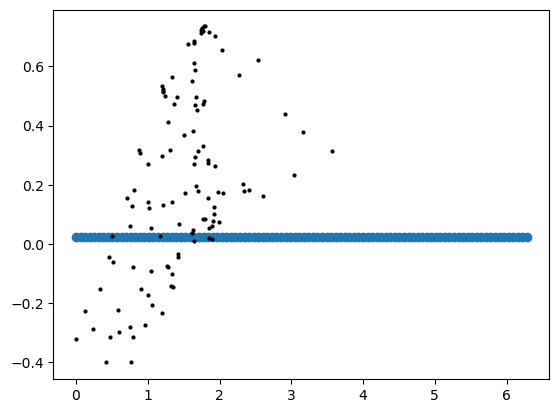

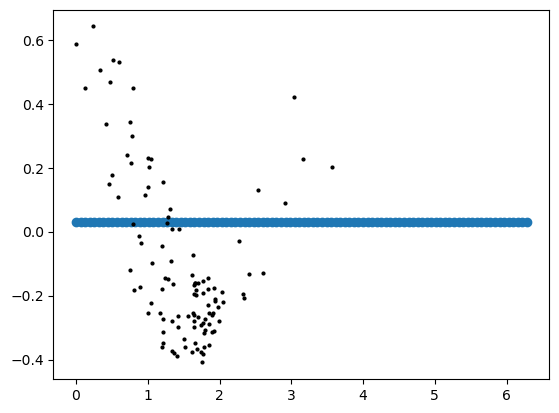

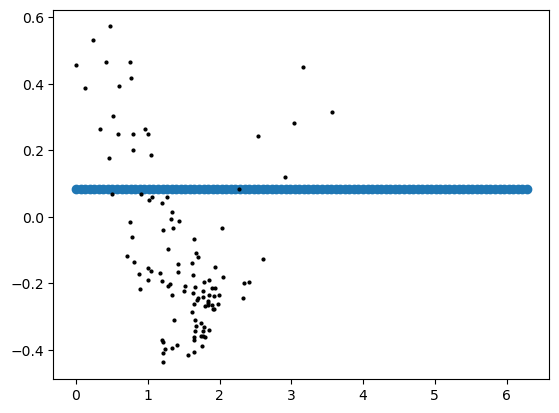

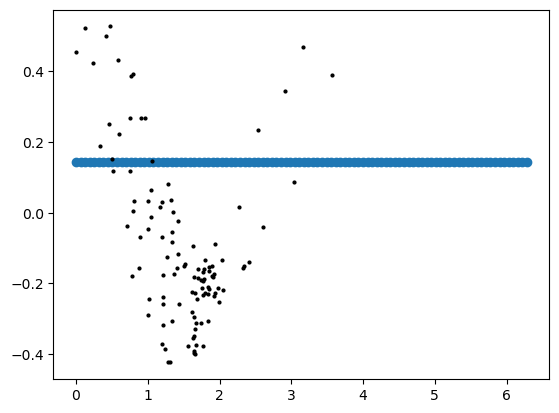

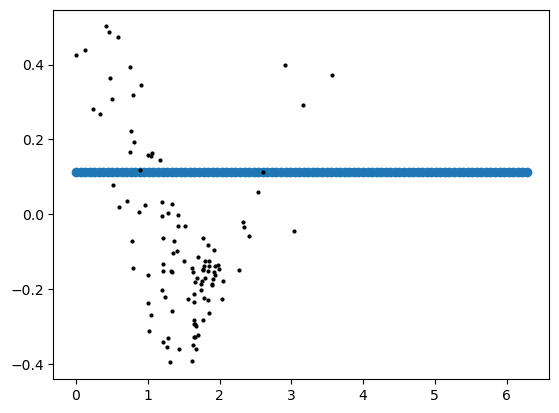

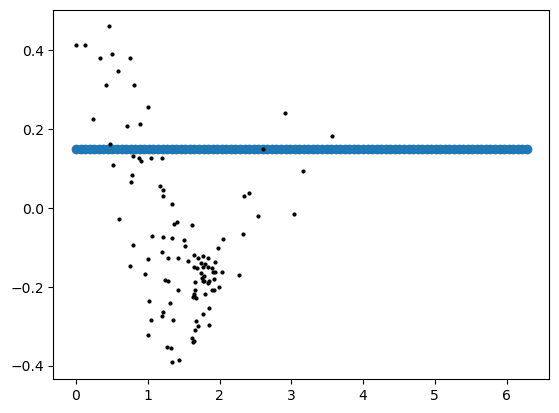

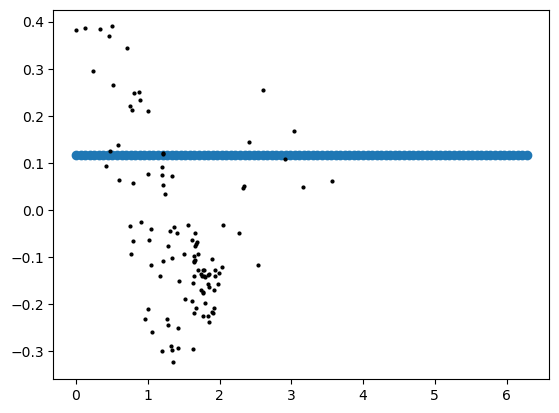

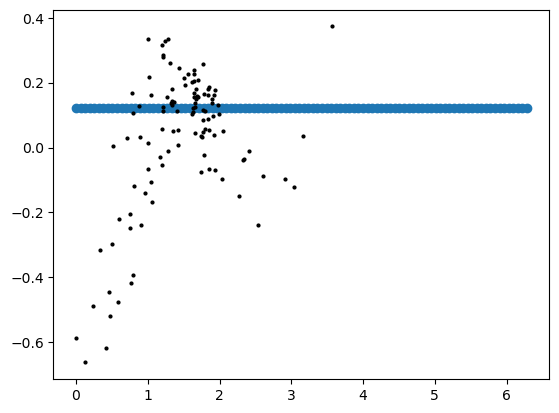

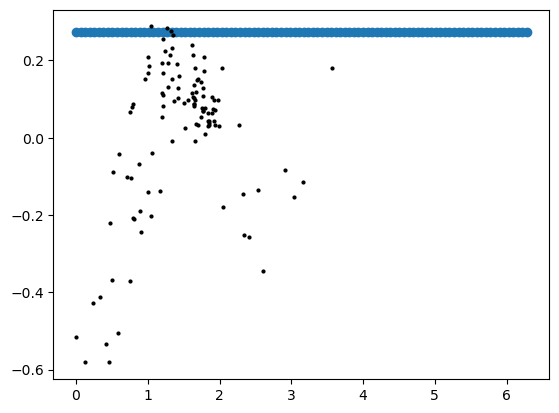

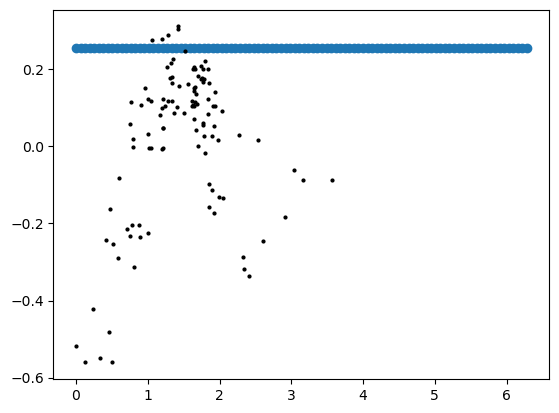

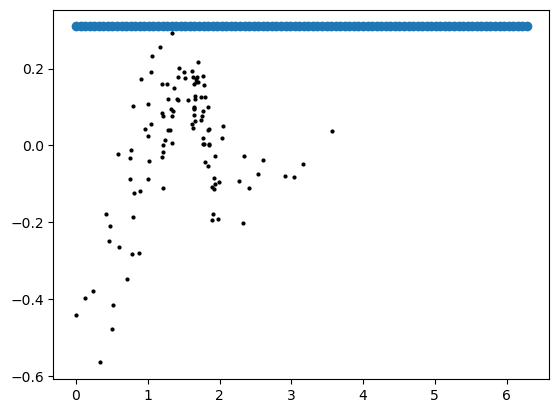

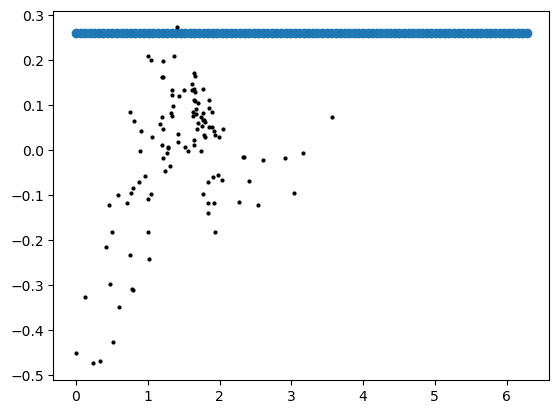

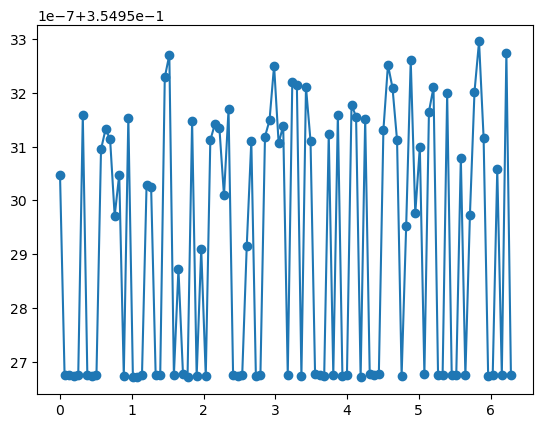

In [ ]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
import matplotlib.pyplot as plt

stor = 7 #storage number from 1
fock_n = 5 #fock numbers from 0
swap_iter = 6 #even swaps from 0
swaps_plot = [2*i for i in range(swap_iter)]

for k in range(stor): #storage number
    fock_dict = {"fock_"+str(fock_n): [] for fock_n in range(fock_n)}

    for j in range(fock_n): #fock states 0 to 4
        photon = j
        fid_results = []
        
        for i in range(swap_iter): #even no. of swaps from 0 to 10
            swaps = 2*i
            prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=photon)
            for s in range(swaps):
                prep_man_pi.append(['storage', 'M1-S'+str(k+1), 'pi', 0])  


            pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()
            print(f'doing ' + str(swaps) + ' swaps for fock ' + str(photon) + ' in storage ' + str(k+1))
            wigner = do_wigner_tomography_1mode(
                config_thisrun=expts_base_inst.config_thisrun,
                expt_path=expts_base_inst.expt_path,
                config_path=expts_base_inst.config_file,
                displace_length=0.05,
                reps = 1000,
                displacement_path=return_dict['path'],
                prepulse=True,
                pre_sweep_pulse=pulse,
                gate_based = False,
                # relax_delay=8000
                relax_delay=5000
            )

            wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg, mode_state_num=10, alphas = wigner.data['alpha'])
            initial_state = (fock(wigner_analysis.m, photon)).unit() 
            allocated_counts = wigner_analysis.bin_ss_data()
            p_e = allocated_counts # Probability of measuring the state |e
            p_g = 1 - allocated_counts  # Probability of measuring the state |g
            plt.plot(np.abs(wigner.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')
            results = wigner_analysis.wigner_analysis_results((p_g-p_e), initial_state=initial_state, rotate=True)
            print(results['fidelity'])
            fid_results += [results['fidelity']]
            

        print(f'Fidelity-swap results for fock ' +str(j) + ' in storage ' + str(k+1) + ':')
        print(fid_results)
        print(swaps_plot)
        fock_dict['fock_'+str(j)].append(fid_results)

    print(f'Storage {k+1} swap fidelity results:')
    print(fock_dict)
    plt.figure(figsize=(10, 6))    
    for l in range(fock_n):
        fock_i = fock_dict['fock_'+str(l)][0]
        plt.plot(swaps_plot, fock_i, marker='o', label='Fock ' + str(l))
    plt.xlabel('Number of Swaps')
    plt.ylabel('Fidelity')
    plt.title(f'Fidelity vs Number of Swaps for in Storage ' + str(k+1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    # filename = title.replace(' ', '_').replace(':', '') + '.png'
    # self.save_plot(fig, filename=filename)

## Wigner Tomography of |0+2>

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_02_pulse = []
prep_02_pulse.append(['qubit', 'ge', 'hpi', 0]) # g0 + e0 
prep_02_pulse.append(['qubit', 'ef', 'pi', 0]) # g0 + f0 
prep_02_pulse.append(['qubit', 'ge', 'pi', 0])# e0 + f0
prep_02_pulse.append(['multiphoton', 'f0-g1', 'pi', 0]) # e0 + g1 
prep_02_pulse.append(['multiphoton', 'g0-e0', 'pi', 0]) # g0 + e1
prep_02_pulse.append(['multiphoton', 'e1-f1', 'pi', 0]) # g0 + f1 
prep_02_pulse.append(['multiphoton', 'f1-g2', 'pi', 0]) # g0 + g2
prep_02_pulse
## convert it to low level pulse 
pulse_02 = mm_base_dummy.get_prepulse_creator(prep_02_pulse).pulse.tolist()
pulse_02

[['qubit', 'ge', 'hpi', 0],
 ['qubit', 'ef', 'pi', 0],
 ['qubit', 'ge', 'pi', 0],
 ['multiphoton', 'f0-g1', 'pi', 0],
 ['multiphoton', 'g0-e0', 'pi', 0],
 ['multiphoton', 'e1-f1', 'pi', 0],
 ['multiphoton', 'f1-g2', 'pi', 0]]

## Wigner Tomography of |0> + |1>

### Debugging

##### Histogram Prepulse

In [700]:
def do_histogram_prepulse_experiment(
    reps=10000,
    qubits=[0],
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    preloaded_pulses=False,
    use_arb_waveform=False,
    expts_base_inst=None,
    expt_path=None,
    config_path=None,
    config_thisrun=None,
    relax_delay=2500
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubits': qubits,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'preloaded_pulses': preloaded_pulses,
        'use_arb_waveform': use_arb_waveform
    }
    histogram_exp = expts_base_inst.meas.single_qubit.single_shot_prepulse.HistogramPrepulseExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='HistogramPrepulseExperiment', config_file=config_path
    )
    histogram_exp.cfg = AttrDict(deepcopy(config_thisrun))
    histogram_exp.cfg.expt = expt_cfg
    histogram_exp.go(analyze=False, display=False, progress=True, save=True)
    return histogram_exp


In [703]:
historgam_exp = do_histogram_prepulse_experiment(
    reps=10000,
    qubits=[0],
    expts_base_inst=expts_base_inst,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    config_thisrun=expts_base_inst.config_thisrun,
    prepulse=True,
    gate_based=True,
    pre_sweep_pulse=[['qubit', 'ge', 'hpi', 0]],  # Use the prepulse pulse created above
)

[[3567.346809921427]
 [4852]
 [0.0]
 [0]
 [2]
 ['gauss']
 [0.035]]


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00003_HistogramPrepulseExperiment.h5


In [704]:
historgam_exp.data['I'].shape

(10000,)

Proportion of points below threshold -314: 0.529 (5295/10000)


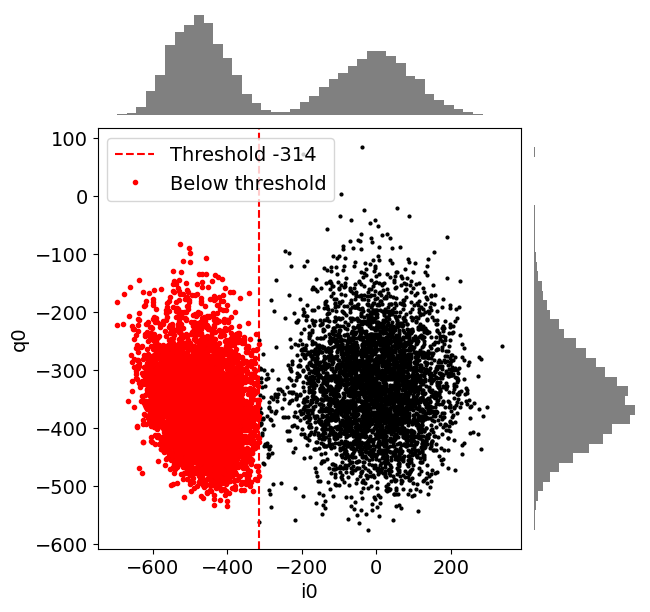

In [705]:
from matplotlib import gridspec


# i, q
# plt.plot(wigner_exp_01.data['i0'][0][0], wigner_exp_01.data['q0'][0][0], 'o', markersize=2, color='black')
# Plot histograms along x and y axes

# Get data
x = historgam_exp.data['I']
y = historgam_exp.data['Q']



# Create a figure with gridspec for scatter and histograms
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot
ax_scatter.plot(x, y, 'o', markersize=2, color='black')
ax_scatter.set_xlabel('i0')
ax_scatter.set_ylabel('q0')

# X histogram
ax_histx.hist(x, bins=40, color='gray')
ax_histx.axis('off')

# Y histogram
ax_histy.hist(y, bins=40, orientation='horizontal', color='gray')
ax_histy.axis('off')

threshold = -314
below_threshold = x < threshold
proportion_below = np.sum(below_threshold) / len(x)
print(f"Proportion of points below threshold {threshold}: {proportion_below:.3f} ({np.sum(below_threshold)}/{len(x)})")

# Plot threshold line and highlight points below threshold
ax_scatter.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
ax_scatter.plot(x[below_threshold], y[below_threshold], 'ro', markersize=3, label='Below threshold')
ax_scatter.legend()

plt.show()

In [645]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

[[3567.346809921427, 3423.9866806417763, 2005.9],
 [4636, 8221, 15000],
 [0.0, 0.0, 1.082052142],
 [0, 0, 0],
 [2, 2, 0],
 ['g', 'g', 'flat_top'],
 [0.035, 0.035, 0.005]]

In [652]:
# choose alphas along 3 axes 
alpha_list = np.linspace(0, 1, 10) 
phase_across_three_axes = np.array([0, 90, 180])  # in degrees
alphas = []
for phase in phase_across_three_axes:
    alphas.append(alpha_list * np.exp(1j * np.deg2rad(phase)))
alpha_list_full = np.concatenate(alphas)
alpha_list_full
f_path = expts_base_inst.expt_path + '\\alphas.npy'
np.save(f_path, alpha_list_full)


In [653]:
alpha_list_full

array([ 0.00000000e+00+0.00000000e+00j,  1.11111111e-01+0.00000000e+00j,
        2.22222222e-01+0.00000000e+00j,  3.33333333e-01+0.00000000e+00j,
        4.44444444e-01+0.00000000e+00j,  5.55555556e-01+0.00000000e+00j,
        6.66666667e-01+0.00000000e+00j,  7.77777778e-01+0.00000000e+00j,
        8.88888889e-01+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  6.80359333e-18+1.11111111e-01j,
        1.36071867e-17+2.22222222e-01j,  2.04107800e-17+3.33333333e-01j,
        2.72143733e-17+4.44444444e-01j,  3.40179666e-17+5.55555556e-01j,
        4.08215600e-17+6.66666667e-01j,  4.76251533e-17+7.77777778e-01j,
        5.44287466e-17+8.88888889e-01j,  6.12323400e-17+1.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j, -1.11111111e-01+1.36071867e-17j,
       -2.22222222e-01+2.72143733e-17j, -3.33333333e-01+4.08215600e-17j,
       -4.44444444e-01+5.44287466e-17j, -5.55555556e-01+6.80359333e-17j,
       -6.66666667e-01+8.16431199e-17j, -7.77777778

In [668]:
# Now doing wigner tomography at these 3 points of 0 + 1
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 5000,
    displacement_path=f_path,
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False,
    relax_delay=2500
)

man mode no: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00025_WignerTomography1ModeExperiment.h5


In [669]:
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=10, alphas = wigner_exp_01.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g
wigner_expec = 2/np.pi * (p_g - p_e)  # Wigner expectation value

(5000, 30)


In [670]:
wigner_expec

array([0.08557926, 0.1117689 , 0.17499438, 0.20515214, 0.22314098,
       0.27287484, 0.261235  , 0.24377524, 0.2257864 , 0.16070913,
       0.10250994, 0.11917607, 0.15912188, 0.18531151, 0.17896251,
       0.25462145, 0.22076011, 0.23345811, 0.17869797, 0.17393621,
       0.11203344, 0.09430914, 0.12367328, 0.13372587, 0.15621192,
       0.20726848, 0.20859119, 0.20356489, 0.16361909, 0.15224379])

slice(0, 10, None)
slice(10, 20, None)
slice(20, 30, None)


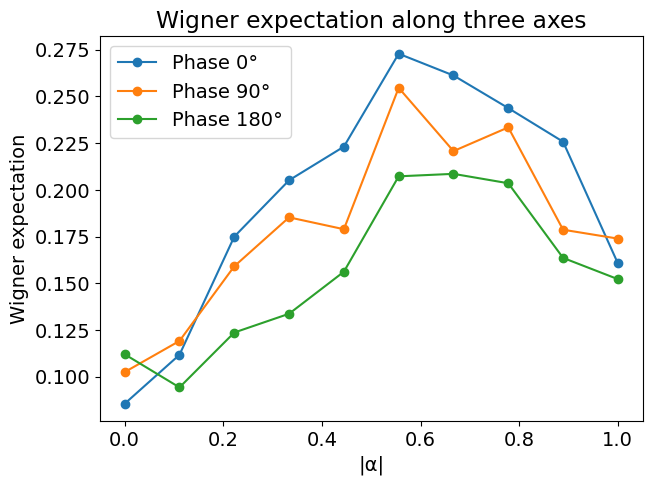

In [671]:
import numpy as np

wigner_exp_01.data['alpha']
# the array above contains alphas along the three axes, for each axes plot the corresponding wigner exppec
# I expec 3 traces on a single plot, one for each angle 
import matplotlib.pyplot as plt

alphas = wigner_exp_01.data['alpha']
wigner_expec = 2/np.pi * (p_g - p_e)

# There are 3 axes, so split the data accordingly
num_axes = 3
N = len(alphas) // num_axes

plt.figure(figsize=(7, 5))
for i, phase in enumerate(phase_across_three_axes):
    idx = slice(i*N, (i+1)*N)
    print(idx)
    plt.plot(np.abs(alphas[idx]), wigner_expec[idx], 'o-', label=f'Phase {phase}°')
plt.xlabel('|α|')
plt.ylabel('Wigner expectation')
plt.title('Wigner expectation along three axes')
plt.legend()
plt.show()

In [661]:
np.shape(wigner_exp_01.data['i0'])

(30, 1, 1000)

Proportion of points below threshold -300: 0.575 (575/1000)


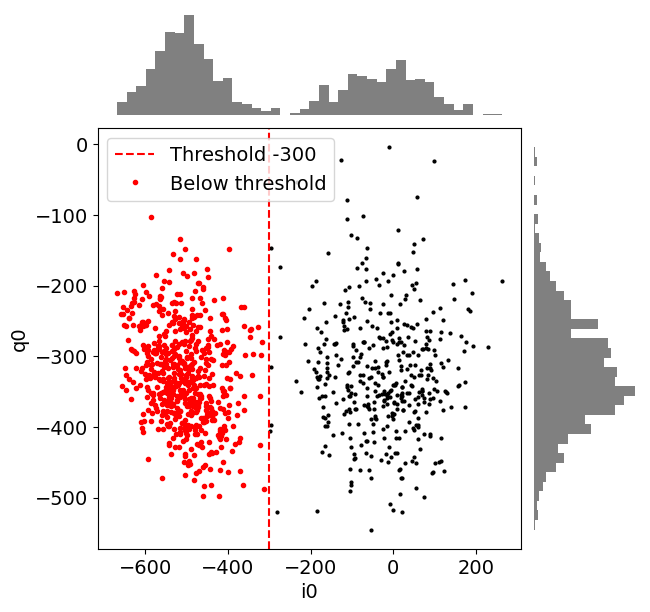

In [667]:
from matplotlib import gridspec


# i, q
# plt.plot(wigner_exp_01.data['i0'][0][0], wigner_exp_01.data['q0'][0][0], 'o', markersize=2, color='black')
# Plot histograms along x and y axes

# Get data
x = wigner_exp_01.data['i0'][0][0]
y = wigner_exp_01.data['q0'][0][0]



# Create a figure with gridspec for scatter and histograms
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot
ax_scatter.plot(x, y, 'o', markersize=2, color='black')
ax_scatter.set_xlabel('i0')
ax_scatter.set_ylabel('q0')

# X histogram
ax_histx.hist(x, bins=40, color='gray')
ax_histx.axis('off')

# Y histogram
ax_histy.hist(y, bins=40, orientation='horizontal', color='gray')
ax_histy.axis('off')

threshold = -300
below_threshold = x < threshold
proportion_below = np.sum(below_threshold) / len(x)
print(f"Proportion of points below threshold {threshold}: {proportion_below:.3f} ({np.sum(below_threshold)}/{len(x)})")

# Plot threshold line and highlight points below threshold
ax_scatter.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
ax_scatter.plot(x[below_threshold], y[below_threshold], 'ro', markersize=3, label='Below threshold')
ax_scatter.legend()

plt.show()

In [ ]:
# 

In [663]:
wigner_exp_01.cfg.device.readout

{'trig_offset': [450],
 'frequency': [748.8],
 'gain': [800],
 'phase': [29.79028008324773],
 'threshold': [-301.7609374000881],
 'threshold_list': [[-301.7609374000881]],
 'man1_drive_list': [0.0],
 'man2_drive_list': [0.0],
 'readout_length': [1.5],
 'relax_delay': [2500],
 'confusion_matrix_with_reset': [0.9964530022802125,
  0.0035469977197875036,
  0.013768302080657598,
  0.9862316979193424],
 'confusion_matrix_without_reset': [0.9886,
  0.011399999999999966,
  0.026,
  0.974],
 'Ie': [-11.637201631964007],
 'Ig': [-501.760937400088]}

### Normal

In [24]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ef', 'pi', 0] to channel qubit
Adding pulse ['f0-g1', 'pi', 0] to channel multiphoton


[[3567.3506008394015, 3423.990931159239, 2005.8600000000006],
 [5003, 9161, 15000],
 [0.0, 0.0, 1.0955314021401903],
 [0, 0, 0],
 [2, 2, 0],
 ['g', 'g', 'flat_top'],
 [0.035, 0.035, 0.005]]

In [25]:
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 1000,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False
)

man mode no: 1
gain2alpha: 0.0002753329059097354
displace_sigma: 0.05


  0%|          | 0/93 [00:00<?, ?it/s]

multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['ge', 'hpi', 180] to channel qubit
multiphoton_cfg 3567.3608840739785
Adding pulse ['g0-e0', 'hpi', 0] to channel multiphoton
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['g0-e0', 'hpi', 180] to channel multiphoton
multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['ge', 'hpi', 180] to channel qubit
multiphoton_cfg 3567.3608840739785
Adding pulse ['g0-e0', 'hpi', 0] to channel multiphoton
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['g0-e0', 'hpi', 180] to channel multiphoton
multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['ge', 'hpi', 180] to channel qubit
multiphoton_cfg 3567.3608840739785
Adding pu

In [26]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=2, alphas = wigner_exp_01.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(1000, 93)


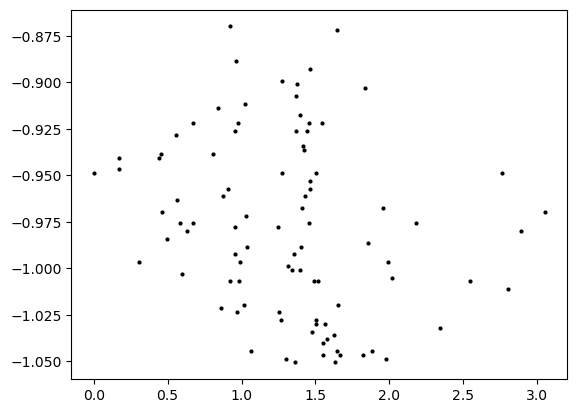

In [27]:
plt.plot(np.abs(wigner_exp_01.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

MLE Fidelity:  0.669569174120082
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.6696')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-01_18-15-51_0+1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-01.md


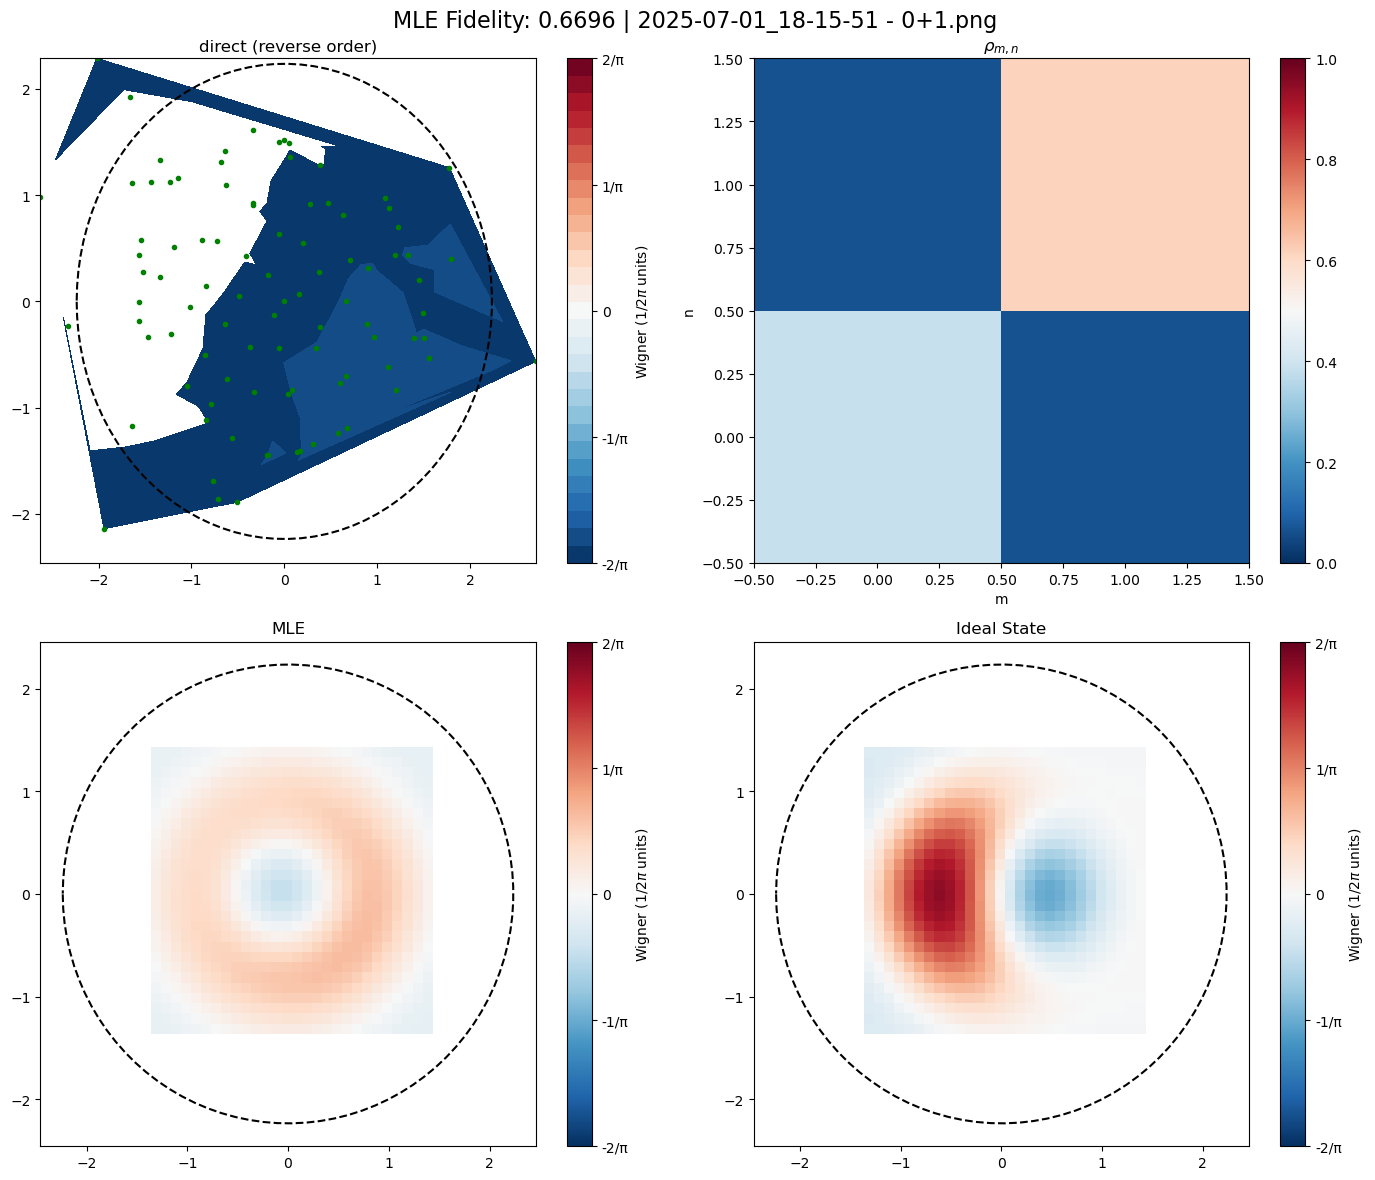

In [28]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '0+1')

In [431]:
wigner_exp_02 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_02,
    gate_based = False
)

man mode no: 1


  0%|          | 0/261 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00009_WignerTomography1ModeExperiment.h5


In [469]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_02.data, config=wigner_exp_02.cfg, mode_state_num=10, alphas = wigner_exp.data['alpha'])
initial_state = (fock(wigner_analysis.m, 2)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(200, 261)


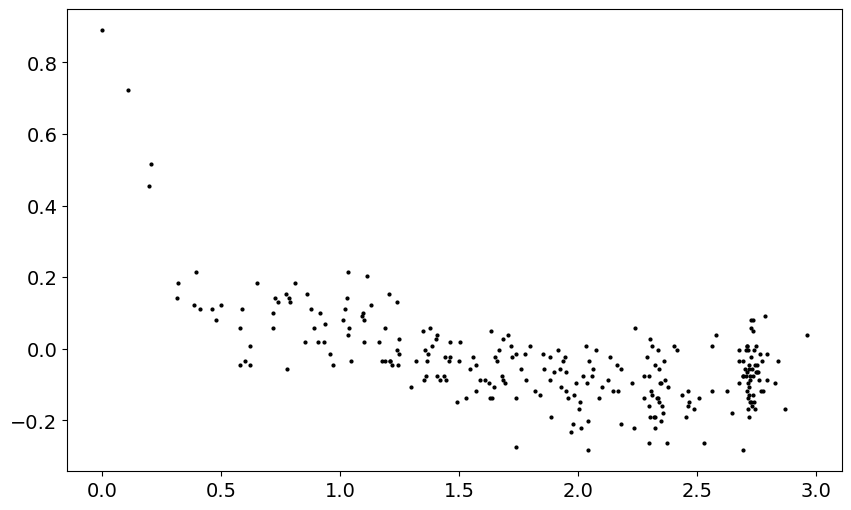

In [433]:
plt.plot(np.abs(wigner_exp_02.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

MLE Fidelity:  0.5187873609386402
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.5188')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_17-37-35_0+2.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md


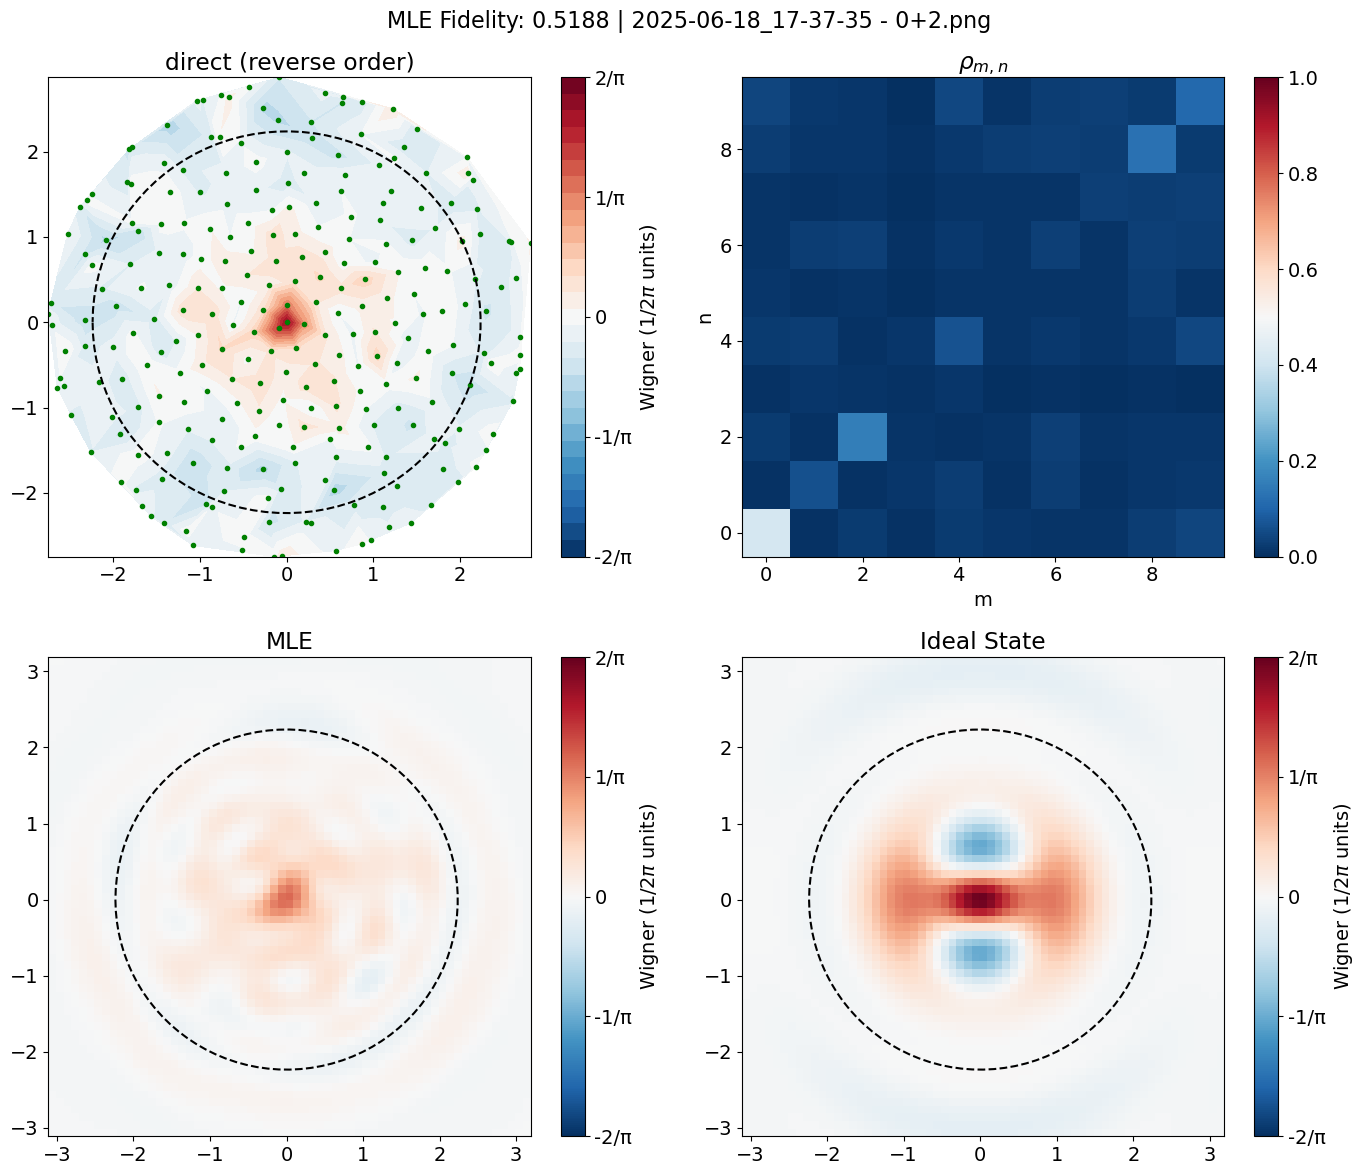

In [470]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '0+2')

In [415]:
expts_base_inst.soc.deg2reg(180, 0)

2147483648

In [413]:
expts_base_inst.soc.deg2reg(180)

2147483648

In [ ]:
from qutip import wigner, fock, displace
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt




# Define parameters
N = 15  # Hilbert space dimension
n = 2 # Fock state |n>
xvec = np.linspace(-3, 3, 200)
yvec = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(xvec, yvec)
alpha = X + 1j * Y

# Create Fock state
psi = fock(N, n)

# Compute Wigner function
W = wigner(psi, xvec, yvec)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
c = ax.pcolormesh(X, Y, W, cmap='RdBu_r', shading='auto', vmin=-2/np.pi, vmax=2/np.pi)
ax.set_xlabel('Re(α)')
ax.set_ylabel('Im(α)')
ax.set_title(f'Wigner function for Fock state |{n}>')
cb = fig.colorbar(c, ax=ax)
cb.set_label('Wigner function')
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
plt.show()

# Save Config

In [863]:
expts_base_inst.config_thisrun

{'device': {'qubit': {'T1': [351.64566547320703],
   'f_ge': [3571.672429380876],
   'f_ef': [3428.4217571066574],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3.0],
   'pulses': {'pi_ge': {'gain': [3454],
     'sigma': [0.035],
     'length': [0.0],
     'type': ['gauss']},
    'hpi_ge': {'gain': [1686],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'pi_ef': {'gain': [2770],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}},
   'T1_ef': [144.16571854782674]},
  'readout': {'trig_offset': [450],
   'frequency': [749.1194783440185],
   'gain': [800],
   'phase': [157.65078401562099],
   'threshold': [-110.98917671452716],
   'threshold_list': [[-110.98917671452716]],
   'man1_drive_list': [0.0],
   'man2_drive_list': [0.0],
   'readout_length': [1.5],
   'relax_delay': [2500],
   'confusion_matrix_with_reset': [0.9964530022802125,
    0.0035469977197875036,
    0.01376

In [864]:
expts_base_inst.recursive_compare(expts_base_inst.yaml_cfg, expts_base_inst.config_thisrun)

Key 'device.readout.phase' differs:
  Old value (config1): 167.22384448659207
  New value (config2): 157.65078401562099
Key 'device.readout.threshold' differs:
  Old value (config1): -121.30623669882084
  New value (config2): -110.98917671452716
Key 'device.readout.threshold_list' differs:
  Old value (config1): [-121.30623669882084]
  New value (config2): [-110.98917671452716]
Key 'device.readout.confusion_matrix_without_reset' differs:
  Old value (config1): [0.9584000000000001, 0.04159999999999986, 0.043000000000000003, 0.957]
  New value (config2): [0.972, 0.028000000000000025, 0.043199999999999995, 0.9568]
Key 'device.readout.Ie' differs:
  Old value (config1): -55.840880866940815


IndexError: invalid index to scalar variable.

In [300]:
expts_base_inst.config_thisrun

{'device': {'qubit': {'T1': [486.46448644846816],
   'f_ge': [3571.6994214615424],
   'f_ef': [3428.4457610447353],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3.0],
   'pulses': {'pi_ge': {'gain': [3429],
     'sigma': [0.035],
     'length': [0.0],
     'type': ['gauss']},
    'hpi_ge': {'gain': [1655],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'pi_ef': {'gain': [2770],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']},
    'slow_pi_ge': {'gain': [15],
     'sigma': [0.1],
     'length': [10],
     'type': ['flat_top']}},
   'T1_ef': [144.16571854782674]},
  'readout': {'trig_offset': [450],
   'frequency': [749.0683556354792],
   'gain': [800],
   'phase': [81.5440056320215],
   'threshold': [-60.045762209856775],
   'threshold_list': [[-60.045762209856775]],
   'man1_drive_list': [0.0],
   'man2_drive_list': [0.0],
   'readout_length': [1.5],
   'relax_delay':

In [301]:
expts_base_inst.handle_config_update(updateConfig_bool=True)

Comparing configurations:
Key 'device.readout.phase' differs:
  Old value (config1): 41.349334101852335
  New value (config2): 81.5440056320215
Key 'device.readout.threshold' differs:
  Old value (config1): -37.636569831482234
  New value (config2): -60.045762209856775
Key 'device.readout.threshold_list' differs:
  Old value (config1): [-37.636569831482234]
  New value (config2): [-60.045762209856775]
Key 'device.readout.confusion_matrix_without_reset' differs:
  Old value (config1): [0.9550000000000011, 0.04499999999999893, 0.06981396279255848, 0.9301860372074415]
  New value (config2): [0.9535999999999999, 0.04640000000000011, 0.0442, 0.9558]
Key 'device.readout.Ie' differs:
  Old value (config1): 15.732211174404819


IndexError: invalid index to scalar variable.